In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
DAY=int(os.environ["THE_DAY"])

In [3]:
print "the day", DAY

the day 3


In [4]:
dim=(54, 4100, 1704)
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b
def get_series2(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==(4100, 54, 1704)
    return b  
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 and lag<n
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(np.nan)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba    

In [5]:
cat_lag_features={
 "city_0",
  "class_0",
  "cluster_0",
  "family_0",
  "state_0",
  "type_0",

 'city_mv36',
 'class_mv36',
 'cluster_mv36',
 'family_mv36',
 'state_mv36',
 'type_mv36',    
 
 'item_mean_0',
 'store_mean_0',
 }
cat_features={
 'holiday_0',
 #'onpromotion_0',
 'wage_0',
 'd900'
 }
oil_features={'oil_0', 'oil_d1', 'oil_d10', 'oil_d15', 'oil_d3', 'oil_d5'}
sales_ma_features={'sales_ma_112',
 'sales_ma_14',
 'sales_ma_224',
 'sales_ma_28',
 'sales_ma_3',
 'sales_ma_56',
 'sales_ma_7'}
sales_season_ma_features={'sales_week_season_ma_p13',
 'sales_week_season_ma_p2',
 'sales_week_season_ma_p3',
 'sales_week_season_ma_p4',
 'sales_week_season_ma_p7'}

#move x, fix y
def _get_feature(name,lag=0,offset=0):
    if name in cat_lag_features :
        assert lag == 0
        if name in ['item_mean_0','class_mv36','family_mv36','class_0','family_0']:
            s=get_series2(name)
        else:
            s=get_series(name)
        return s_lag(s,offset)
    if name in cat_features or name in oil_features:
        assert offset==0 and lag==0
        s= get_series(name)
        if name =='holiday_0': s[np.isnan(s)]=0
        return s
    if name =="y_0" or name in sales_ma_features or name in sales_season_ma_features:
        #assert  lag == 0
        s=get_series(name)
        if offset==0 and lag==0: return s
        return s_lag(s,lag=offset+lag)
def get_feature(name,lag=0,offset=0):
    s=_get_feature(name=name,lag=lag,offset=offset)
    if s.shape == ( 4100,54, 1704):
        s=np.rollaxis(s,1,0)
    assert s.shape==(54, 4100, 1704), s.shape
    return s
def get_all_features(offset=1):
    assert offset>0
    all_features=[]
    for name in cat_lag_features:
        all_features.append({"name":name,"lag":0,"offset":offset})
    for name in cat_features:
        all_features.append({"name":name,"lag":0,"offset":0})   
#     for name in oil_features:
#         all_features.append({"name":name,"lag":0,"offset":0})  
    for i in range(0,7):
        all_features.append({"name":"y_0","lag":i ,"offset":offset})  
    for name in sales_ma_features:
        all_features.append({"name":name,"lag":0,"offset":offset})  
    for name in sales_season_ma_features:
        all_features.append({"name":name,"lag":(700-offset)%7,"offset":offset})
#     for i in range(1,8):
#         all_features.append({"name":"oil_0","lag":i,"offset":offset})              
    return all_features    
def calc_feature(feat):
    return get_feature(**feat)
def col_name(feat):
    return "{}-lag{}-offset{}".format(feat['name'],feat['lag'],feat['offset'])
def get_train_test(day):
    assert(day>0)
    cols=[]
    train_lst=[]
    
    for feat in get_all_features(day):
        col=col_name(feat)
        print col,
        arr=calc_feature(feat).astype(np.float16)
        train_lst.append(arr)
        cols.append(col)
        gc.collect()
        #break
    return cols,  np.array(train_lst)

In [6]:
def read_data(day):
    print "read data for day", day
    dirname='../input/d'+str(day)+"/"
    y=get_series('y_0')
    cols,train_test=get_train_test(day)
    cols=np.array(cols)    
    train_test=np.rollaxis(train_test,0,4)
    print "loaded", y.shape,train_test.shape 
    return cols,train_test,y.astype(np.float16)

In [7]:
%time cols,train_test,y=read_data(DAY)
rawy=y.copy()
y[np.isnan(y)]=0

read data for day 3


store_mean_0-lag0-offset3

 family_0-lag0-offset3

 city_0-lag0-offset3

 cluster_mv36-lag0-offset3

 cluster_0-lag0-offset3

 city_mv36-lag0-offset3

 item_mean_0-lag0-offset3

 class_0-lag0-offset3

 type_0-lag0-offset3

 type_mv36-lag0-offset3

 state_mv36-lag0-offset3

 class_mv36-lag0-offset3

 state_0-lag0-offset3

 family_mv36-lag0-offset3

 holiday_0-lag0-offset0

 d900-lag0-offset0

 wage_0-lag0-offset0

 y_0-lag0-offset3

 y_0-lag1-offset3

 y_0-lag2-offset3

 y_0-lag3-offset3

 y_0-lag4-offset3

 y_0-lag5-offset3

 y_0-lag6-offset3

 sales_ma_224-lag0-offset3

 sales_ma_14-lag0-offset3

 sales_ma_28-lag0-offset3

 sales_ma_112-lag0-offset3

 sales_ma_7-lag0-offset3

 sales_ma_3-lag0-offset3

 sales_ma_56-lag0-offset3

 sales_week_season_ma_p7-lag4-offset3

 sales_week_season_ma_p4-lag4-offset3

 sales_week_season_ma_p13-lag4-offset3

 sales_week_season_ma_p2-lag4-offset3

 sales_week_season_ma_p3-lag4-offset3

 loaded (54, 4100, 1704) (54, 4100, 1704, 36)


CPU times: user 2min 42s, sys: 25.9 s, total: 3min 8s
Wall time: 3min 8s


In [8]:
print "types", [u.dtype for u in (cols, train_test, y)]
print "shapes", [u.shape for u in (cols, train_test, y)]
print "mem(gb)",np.round(train_test.nbytes/1024.**3,2), np.round(y.nbytes/1024.**3,2)

types [dtype('S37'), dtype('float16'), dtype('float16')]
shapes [(36,), (54, 4100, 1704, 36), (54, 4100, 1704)]
mem(gb) 25.3 0.7


In [9]:
gc.collect()

0

In [10]:
def show_data(store,item,date,filters=None):
    thisy=y[store,item,date-5:date+2]
    a=train_test[store,item,date-5:date+2,:]
    a=np.squeeze(a)
    print a.shape
    columns=cols
    if filters is not None: 
        columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(a,columns=cols,index=range(date-5,date+2))[columns]
    df['target']=thisy
    with pd.option_context('display.max_columns', None):
        display(df)

In [11]:
show_data(0,1000,1688, None)#lambda u: 'y_0' in u)

(7, 36)


store_mean_0-lag0-offset3  family_0-lag0-offset3  city_0-lag0-offset3  \
1683                   1.560547               1.639648             1.785156   
1684                   1.617188               1.627930             1.789062   
1685                   1.546875               1.627930             1.714844   
1686                   1.312500               1.722656             1.834961   
1687                   1.383789               1.694336             1.823242   
1688                   1.216797               1.751953             1.890625   
1689                   1.533203               1.664062             1.812500   

      cluster_mv36-lag0-offset3  cluster_0-lag0-offset3  \
1683                   1.641602                1.563477   
1684                   1.641602                1.624023   
1685                   1.636719                1.526367   
1686                   1.636719                1.576172   
1687                   1.634766                1.574219   
1688                   1.631836                1.590820   
1689                   1.626953                1.574219   

      city_mv36-lag0-offset3  item_mean_0-lag0-offset3  class_0-lag0-offset3  \
1683                1.872070                  1.707031              1.577148   
1684                1.869141                  1.795898              1.632812   
1685                1.864258                  2.003906              1.706055   
1686                1.866211                  2.191406              1.846680   
1687                1.865234                  2.173828              1.803711   
1688                1.862305                  1.844727              1.630859   
1689                1.856445                  1.675781              1.546875   

      type_0-lag0-offset3  type_mv36-lag0-offset3  state_mv36-lag0-offset3  \
1683             1.561523                1.654297                 1.871094   
1684             1.632812                1.654297                 1.868164   
1685             1.553711                1.650391                 1.863281   
1686             1.637695                1.652344                 1.865234   
1687             1.593750                1.650391                 1.864258   
1688             1.621094                1.648438                 1.861328   
1689             1.607422                1.644531                 1.854492   

      class_mv36-lag0-offset3  state_0-lag0-offset3  family_mv36-lag0-offset3  \
1683                 1.669922              1.791016                  1.719727   
1684                 1.669922              1.790039                  1.716797   
1685                 1.671875              1.719727                  1.715820   
1686                 1.678711              1.834961                  1.717773   
1687                 1.679688              1.820312                  1.717773   
1688                 1.674805              1.885742                  1.715820   
1689                 1.670898              1.813477                  1.709961   

      holiday_0-lag0-offset0  d900-lag0-offset0  wage_0-lag0-offset0  \
1683                     1.0                1.0             0.733398   
1684                     0.0                1.0             0.799805   
1685                     0.0                1.0             0.866699   
1686                     0.0                1.0             0.933105   
1687                     0.0                1.0             0.000000   
1688                     0.0                1.0             0.066650   
1689                     0.0                1.0             0.133301   

      y_0-lag0-offset3  y_0-lag1-offset3  y_0-lag2-offset3  y_0-lag3-offset3  \
1683          2.302734          2.484375          1.098633          2.080078   
1684          2.080078          2.302734          2.484375          1.098633   
1685          2.773438          2.080078          2.302734          2.484375   
1686          2.638672          2.773438          2.080078          2.302734   
1687    

In [12]:
def show_data2():
    lst=[]
    days=range(1685,1691)
    for i in range(train_test.shape[-1]):
        lsta=[cols[i]]
        for d in days:
            u=train_test[:,:,d,i]
            lsta.append(np.round(np.isnan(u).mean(),4))
        lst.append(lsta)
            #print '{:>40s} {:.4f} {:.4f} {:.4f} {:.4f}' .format(cols[i],
         #                  np.isnan(u).mean(), np.isnan(v).mean(), np.isnan(w).mean(), np.isnan(ww).mean())
    df=pd.DataFrame(np.array(lst) ,columns=['col']+days)
    return df

In [13]:
show_data2()

col    1685    1686    1687    1688  \
0               store_mean_0-lag0-offset3     0.0     0.0     0.0     0.0   
1                   family_0-lag0-offset3  0.0002  0.0002  0.0002     0.0   
2                     city_0-lag0-offset3     0.0     0.0     0.0     0.0   
3               cluster_mv36-lag0-offset3     0.0     0.0     0.0     0.0   
4                  cluster_0-lag0-offset3     0.0     0.0     0.0     0.0   
5                  city_mv36-lag0-offset3     0.0     0.0     0.0     0.0   
6                item_mean_0-lag0-offset3  0.0849   0.078  0.0827  0.0798   
7                    class_0-lag0-offset3  0.0093  0.0066  0.0071  0.0068   
8                     type_0-lag0-offset3     0.0     0.0     0.0     0.0   
9                  type_mv36-lag0-offset3     0.0     0.0     0.0     0.0   
10                state_mv36-lag0-offset3     0.0     0.0     0.0     0.0   
11                class_mv36-lag0-offset3  0.0083  0.0083  0.0083  0.0083   
12                   state_0-lag0-offset3     0.0     0.0     0.0     0.0   
13               family_mv36-lag0-offset3     0.0     0.0     0.0     0.0   
14                 holiday_0-lag0-offset0     0.0     0.0     0.0     0.0   
15                      d900-lag0-offset0     0.0     0.0     0.0     0.0   
16                    wage_0-lag0-offset0     0.0     0.0     0.0     0.0   
17                       y_0-lag0-offset3  0.5549  0.5276  0.5249  0.5208   
18                       y_0-lag1-offset3  0.5438  0.5549  0.5276  0.5249   
19                       y_0-lag2-offset3  0.5431  0.5438  0.5549  0.5276   
20                       y_0-lag3-offset3  0.5308  0.5431  0.5438  0.5549   
21                       y_0-lag4-offset3  0.4994  0.5308  0.5431  0.5438   
22                       y_0-lag5-offset3  0.4992  0.4994  0.5308  0.5431   
23                       y_0-lag6-offset3  0.5295  0.4992  0.4994  0.5308   
24              sales_ma_224-lag0-offset3  0.5013  0.5006  0.5002  0.4986   
25               sales_ma_14-lag0-offset3   0.508  0.5072  0.5092  0.5118   
26               sales_ma_28-lag0-offset3  0.5026  0.5017  0.5029  0.5039   
27              sales_ma_112-lag0-offset3  0.4897  0.4897  0.4898  0.4901   
28                sales_ma_7-lag0-offset3  0.5043  0.5043  0.5092  0.5128   
29                sales_ma_3-lag0-offset3  0.5347   0.529  0.5213  0.5104   
30               sales_ma_56-lag0-offset3  0.4946  0.4945  0.4955  0.4961   
31   sales_week_season_ma_p7-lag4-offset3     0.0     0.0     0.0     0.0   
32   sales_week_season_ma_p4-lag4-offset3     0.0     0.0     0.0     0.0   
33  sales_week_season_ma_p13-lag4-offset3     0.0     0.0     0.0     0.0   
34   sales_week_season_ma_p2-lag4-offset3  0.4994  0.5308  0.5431  0.5438   
35   sales_week_season_ma_p3-lag4-offset3     0.0     0.0     0.0     0.0   

      1689    1690  
0      0.0     0.0  
1   0.0002  0.0002  
2      0.0     0.0  
3      0.0     0.0  
4      0.0     0.0  
5      0.0     0.0  
6   0.0824  0.0802  
7   0.0073  0.0073  
8      0.0     0.0  
9      0.0     0.0  
10     0.0     0.0  
11  0.0083  0.0083  
12     0.0     0.0  
13     0.0     0.0  
14     0.0     0.0  
15     0.0     0.0  
16     0.0     0.0  
17  0.5359  0.5356  
18  0.5208  0.5359  
19  0.5249  0.5208  
20  0.5276  0.5249  
21  0.5549  0.5276  
22  0.5438  0.5549  
23  0.5431  0.5438  
24  0.4985  0.4984  
25  0.5132   0.516  
26  0.5041  0.5038  
27  0.4905  0.4904  
28  0.5133  0.5118  
29  0.5127  0.5173  
30  0.4962   0.496  
31     0.0     0.0  
32     0.0     0.0  
33     0.0     0.0  
34  0.5549  0.5276  
35     0.0     0.0

# cv

In [14]:
def make_data(train_test,y,low,high):
    y_train=y[:,:,low:high]
    X_train=train_test[:,:,low:high,:]
    #ind=~np.isnan(y_train)
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape(-1)
    print a.shape,b.shape,a.dtype,b.dtype
    return a,b 

In [15]:
if 0:
    X_train,y_train=make_data(train_test,y,100,1628)
    X_valid,y_valid=make_data(train_test,y,1628,1668)
    X_test,y_test=make_data(train_test,y,1668,1688)
else:    
    X_train,y_train=make_data(train_test,y,100,1688)
    X_valid,y_valid=None,None
    X_test,y_test=None,None    

(351583200, 36) (351583200,) float16 float16


In [16]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [17]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [18]:
print K.floatx()

float32


In [19]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [20]:
input_dim=train_test.shape[-1]
input_dim

36

In [21]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,36])<tf.random_uniform([1])[0]/tf.constant(5.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [22]:
def RMSE(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [23]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [24]:
#plt.plot([step_decay(u) for u in range(5)])

In [25]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        model = Sequential()
        model.add(InputLayer(input_shape=params['input_dim']))
        model.add(TransformNALayer())
        for sz in params["hidden_layer_sizes"]:
            if params['batch_normalization']:
                model.add(BatchNormalization())
            model.add(Dense(sz,kernel_regularizer=regularizers.l2(params['l2'])))
            model.add(Dropout(params['dropout_rate']))            
            model.add(Activation(params['activation']))
        if params['loss'] == 'mean_squared_error':
            model.add(Dense(1,activation=None))
            this_loss="mean_squared_error"
            if params['metric']=="mean_squared_error":
                this_metrics=['mean_squared_error']
            else:
                raise Exception("unknown")
        else:
            raise Exception("unknown")
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
                      metrics=None)
          #metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X,y,valid_X=None,valid_y=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='day'+str(DAY)+'_adam_w0_wop.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        validation_data=None
        if valid_X is not None:
            validation_split=None
            validation_data=(X_valid,y_valid)
        self.hist=self.model.fit(X, y, batch_size=batch_size,epochs=200, 
                       validation_split=validation_split, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [26]:
param_grid={'input_dim':[(input_dim,)],
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

12

In [27]:
parameter=parameters[0]
parameter

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [28]:
def run_once(parameter):
    backend.clear_session()
    set_session(tf.Session(config=config))
    a=KerasModel(parameter)
    a._make_model()
    h=a.fit(X,y)
    return [parameter,h.history]

In [29]:
if 0:
    backend.clear_session()
    set_session(tf.Session(config=config))    
    a=KerasModel(parameter)
    a._make_model()
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [30]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'input_dim': (36,),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [31]:
a.fit(X_train,y_train,X_valid,y_valid)

Train on 316424880 samples, validate on 35158320 samples


Epoch 1/200


     1024/316424880 [..............................] - ETA: 2447:58:42 - loss: 0.5880

     8192/316424880 [..............................] - ETA: 306:33:44 - loss: 0.4201 

    15360/316424880 [..............................] - ETA: 163:47:25 - loss: 0.3618

    23552/316424880 [..............................] - ETA: 107:01:34 - loss: 0.3324

    31744/316424880 [..............................] - ETA: 79:33:10 - loss: 0.3205 

    39936/316424880 [..............................] - ETA: 63:21:01 - loss: 0.3094

    48128/316424880 [..............................] - ETA: 52:39:56 - loss: 0.2996

    56320/316424880 [..............................] - ETA: 45:05:18 - loss: 0.2920

    64512/316424880 [..............................] - ETA: 39:26:18 - loss: 0.2878

    72704/316424880 [..............................] - ETA: 35:03:29 - loss: 0.2825

    80896/316424880 [..............................] - ETA: 31:33:55 - loss: 0.2775

    89088/316424880 [..............................] - ETA: 28:42:52 - loss: 0.2745

    97280/316424880 [..............................] - ETA: 26:20:32 - loss: 0.2705

   105472/316424880 [..............................] - ETA: 24:20:21 - loss: 0.2699

   113664/316424880 [..............................] - ETA: 22:37:34 - loss: 0.2690

   121856/316424880 [..............................] - ETA: 21:08:34 - loss: 0.2672

   130048/316424880 [..............................] - ETA: 19:50:52 - loss: 0.2669

   138240/316424880 [..............................] - ETA: 18:42:23 - loss: 0.2683

   145408/316424880 [..............................] - ETA: 17:48:54 - loss: 0.2677

   153600/316424880 [..............................] - ETA: 16:53:41 - loss: 0.2676

   161792/316424880 [..............................] - ETA: 16:04:04 - loss: 0.2681

   169984/316424880 [..............................] - ETA: 15:19:16 - loss: 0.2679

   178176/316424880 [..............................] - ETA: 14:38:33 - loss: 0.2674

   186368/316424880 [..............................] - ETA: 14:01:26 - loss: 0.2668

   194560/316424880 [..............................] - ETA: 13:27:28 - loss: 0.2669

   202752/316424880 [..............................] - ETA: 12:56:13 - loss: 0.2664

   210944/316424880 [..............................] - ETA: 12:27:26 - loss: 0.2650

   219136/316424880 [..............................] - ETA: 12:00:45 - loss: 0.2643

   227328/316424880 [..............................] - ETA: 11:36:00 - loss: 0.2637

   235520/316424880 [..............................] - ETA: 11:12:59 - loss: 0.2634

   243712/316424880 [..............................] - ETA: 10:51:29 - loss: 0.2633

   251904/316424880 [..............................] - ETA: 10:31:25 - loss: 0.2632

   260096/316424880 [..............................] - ETA: 10:12:36 - loss: 0.2625

   268288/316424880 [..............................] - ETA: 9:54:55 - loss: 0.2621 

   275456/316424880 [..............................] - ETA: 9:40:23 - loss: 0.2619

   283648/316424880 [..............................] - ETA: 9:24:36 - loss: 0.2621

   291840/316424880 [..............................] - ETA: 9:09:43 - loss: 0.2613

   300032/316424880 [..............................] - ETA: 8:55:39 - loss: 0.2606

   308224/316424880 [..............................] - ETA: 8:42:19 - loss: 0.2601

   316416/316424880 [..............................] - ETA: 8:29:41 - loss: 0.2595

   324608/316424880 [..............................] - ETA: 8:17:43 - loss: 0.2589

   332800/316424880 [..............................] - ETA: 8:06:20 - loss: 0.2582

   340992/316424880 [..............................] - ETA: 7:55:26 - loss: 0.2575

   349184/316424880 [..............................] - ETA: 7:45:05 - loss: 0.2568

   357376/316424880 [..............................] - ETA: 7:35:12 - loss: 0.2564

   365568/316424880 [..............................] - ETA: 7:25:46 - loss: 0.2560

   373760/316424880 [..............................] - ETA: 7:16:45 - loss: 0.2560

   381952/316424880 [..............................] - ETA: 7:08:07 - loss: 0.2560

   390144/316424880 [..............................] - ETA: 6:59:49 - loss: 0.2561

   398336/316424880 [..............................] - ETA: 6:51:51 - loss: 0.2557

   406528/316424880 [..............................] - ETA: 6:44:15 - loss: 0.2555

   414720/316424880 [..............................] - ETA: 6:36:56 - loss: 0.2555

   422912/316424880 [..............................] - ETA: 6:29:54 - loss: 0.2553

   430080/316424880 [..............................] - ETA: 6:24:01 - loss: 0.2550

   437248/316424880 [..............................] - ETA: 6:18:19 - loss: 0.2546

   445440/316424880 [..............................] - ETA: 6:11:58 - loss: 0.2542

   453632/316424880 [..............................] - ETA: 6:05:52 - loss: 0.2541

   460800/316424880 [..............................] - ETA: 6:00:45 - loss: 0.2542

   468992/316424880 [..............................] - ETA: 5:55:03 - loss: 0.2542

   477184/316424880 [..............................] - ETA: 5:49:33 - loss: 0.2542

   485376/316424880 [..............................] - ETA: 5:44:13 - loss: 0.2540

   493568/316424880 [..............................] - ETA: 5:39:05 - loss: 0.2538

   500736/316424880 [..............................] - ETA: 5:34:45 - loss: 0.2533

   508928/316424880 [..............................] - ETA: 5:29:56 - loss: 0.2532

   517120/316424880 [..............................] - ETA: 5:25:15 - loss: 0.2530

   525312/316424880 [..............................] - ETA: 5:20:42 - loss: 0.2527

   533504/316424880 [..............................] - ETA: 5:16:19 - loss: 0.2525

   541696/316424880 [..............................] - ETA: 5:12:04 - loss: 0.2523

   549888/316424880 [..............................] - ETA: 5:07:54 - loss: 0.2520

   558080/316424880 [..............................] - ETA: 5:03:53 - loss: 0.2522

   566272/316424880 [..............................] - ETA: 5:00:00 - loss: 0.2521

   574464/316424880 [..............................] - ETA: 4:56:12 - loss: 0.2518

   582656/316424880 [..............................] - ETA: 4:52:31 - loss: 0.2519

   590848/316424880 [..............................] - ETA: 4:48:56 - loss: 0.2517

   599040/316424880 [..............................] - ETA: 4:45:27 - loss: 0.2513

   607232/316424880 [..............................] - ETA: 4:42:05 - loss: 0.2513

   615424/316424880 [..............................] - ETA: 4:38:47 - loss: 0.2510

   623616/316424880 [..............................] - ETA: 4:35:34 - loss: 0.2508

   631808/316424880 [..............................] - ETA: 4:32:27 - loss: 0.2505

   640000/316424880 [..............................] - ETA: 4:29:23 - loss: 0.2504

   648192/316424880 [..............................] - ETA: 4:26:25 - loss: 0.2502

   656384/316424880 [..............................] - ETA: 4:23:31 - loss: 0.2502

   664576/316424880 [..............................] - ETA: 4:20:41 - loss: 0.2499

   672768/316424880 [..............................] - ETA: 4:17:55 - loss: 0.2498

   680960/316424880 [..............................] - ETA: 4:15:14 - loss: 0.2497

   689152/316424880 [..............................] - ETA: 4:12:37 - loss: 0.2495

   697344/316424880 [..............................] - ETA: 4:10:03 - loss: 0.2495

   705536/316424880 [..............................] - ETA: 4:07:32 - loss: 0.2496

   713728/316424880 [..............................] - ETA: 4:05:06 - loss: 0.2494

   721920/316424880 [..............................] - ETA: 4:02:42 - loss: 0.2492

   730112/316424880 [..............................] - ETA: 4:00:22 - loss: 0.2490

   738304/316424880 [..............................] - ETA: 3:58:05 - loss: 0.2488

   745472/316424880 [..............................] - ETA: 3:56:08 - loss: 0.2487

   753664/316424880 [..............................] - ETA: 3:53:56 - loss: 0.2486

   761856/316424880 [..............................] - ETA: 3:51:47 - loss: 0.2485

   770048/316424880 [..............................] - ETA: 3:49:40 - loss: 0.2484

   778240/316424880 [..............................] - ETA: 3:47:37 - loss: 0.2485

   786432/316424880 [..............................] - ETA: 3:45:35 - loss: 0.2484

   794624/316424880 [..............................] - ETA: 3:43:36 - loss: 0.2482

   802816/316424880 [..............................] - ETA: 3:41:40 - loss: 0.2481

   811008/316424880 [..............................] - ETA: 3:39:46 - loss: 0.2479

   819200/316424880 [..............................] - ETA: 3:37:55 - loss: 0.2477

   827392/316424880 [..............................] - ETA: 3:36:05 - loss: 0.2475

   835584/316424880 [..............................] - ETA: 3:34:18 - loss: 0.2473

   843776/316424880 [..............................] - ETA: 3:32:33 - loss: 0.2472

   851968/316424880 [..............................] - ETA: 3:30:50 - loss: 0.2472

   860160/316424880 [..............................] - ETA: 3:29:09 - loss: 0.2470

   868352/316424880 [..............................] - ETA: 3:27:29 - loss: 0.2468

   876544/316424880 [..............................] - ETA: 3:25:52 - loss: 0.2467

   884736/316424880 [..............................] - ETA: 3:24:15 - loss: 0.2465

   892928/316424880 [..............................] - ETA: 3:22:41 - loss: 0.2465

   901120/316424880 [..............................] - ETA: 3:21:09 - loss: 0.2462

   909312/316424880 [..............................] - ETA: 3:19:38 - loss: 0.2460

   917504/316424880 [..............................] - ETA: 3:18:08 - loss: 0.2460

   925696/316424880 [..............................] - ETA: 3:16:40 - loss: 0.2461

   933888/316424880 [..............................] - ETA: 3:15:14 - loss: 0.2462

   942080/316424880 [..............................] - ETA: 3:13:50 - loss: 0.2460

   950272/316424880 [..............................] - ETA: 3:12:27 - loss: 0.2459

   958464/316424880 [..............................] - ETA: 3:11:06 - loss: 0.2457

   966656/316424880 [..............................] - ETA: 3:09:45 - loss: 0.2456

   974848/316424880 [..............................] - ETA: 3:08:26 - loss: 0.2454

   983040/316424880 [..............................] - ETA: 3:07:10 - loss: 0.2453

   991232/316424880 [..............................] - ETA: 3:05:54 - loss: 0.2452

   999424/316424880 [..............................] - ETA: 3:04:39 - loss: 0.2451

  1007616/316424880 [..............................] - ETA: 3:03:26 - loss: 0.2451

  1015808/316424880 [..............................] - ETA: 3:02:14 - loss: 0.2449

  1024000/316424880 [..............................] - ETA: 3:01:03 - loss: 0.2448

  1032192/316424880 [..............................] - ETA: 2:59:53 - loss: 0.2446

  1040384/316424880 [..............................] - ETA: 2:58:43 - loss: 0.2445

  1047552/316424880 [..............................] - ETA: 2:57:45 - loss: 0.2444

  1055744/316424880 [..............................] - ETA: 2:56:39 - loss: 0.2444

  1063936/316424880 [..............................] - ETA: 2:55:33 - loss: 0.2442

  1072128/316424880 [..............................] - ETA: 2:54:28 - loss: 0.2443

  1080320/316424880 [..............................] - ETA: 2:53:24 - loss: 0.2442

  1088512/316424880 [..............................] - ETA: 2:52:21 - loss: 0.2440

  1096704/316424880 [..............................] - ETA: 2:51:19 - loss: 0.2440

  1104896/316424880 [..............................] - ETA: 2:50:18 - loss: 0.2440

  1113088/316424880 [..............................] - ETA: 2:49:18 - loss: 0.2439

  1121280/316424880 [..............................] - ETA: 2:48:18 - loss: 0.2438

  1129472/316424880 [..............................] - ETA: 2:47:19 - loss: 0.2437

  1137664/316424880 [..............................] - ETA: 2:46:22 - loss: 0.2435

  1145856/316424880 [..............................] - ETA: 2:45:24 - loss: 0.2437

  1154048/316424880 [..............................] - ETA: 2:44:28 - loss: 0.2435

  1161216/316424880 [..............................] - ETA: 2:43:41 - loss: 0.2435

  1169408/316424880 [..............................] - ETA: 2:42:47 - loss: 0.2435

  1177600/316424880 [..............................] - ETA: 2:41:53 - loss: 0.2433

  1184768/316424880 [..............................] - ETA: 2:41:07 - loss: 0.2433

  1192960/316424880 [..............................] - ETA: 2:40:15 - loss: 0.2433

  1201152/316424880 [..............................] - ETA: 2:39:23 - loss: 0.2433

  1209344/316424880 [..............................] - ETA: 2:38:32 - loss: 0.2433

  1217536/316424880 [..............................] - ETA: 2:37:42 - loss: 0.2433

  1225728/316424880 [..............................] - ETA: 2:36:52 - loss: 0.2432

  1233920/316424880 [..............................] - ETA: 2:36:02 - loss: 0.2431

  1242112/316424880 [..............................] - ETA: 2:35:13 - loss: 0.2430

  1250304/316424880 [..............................] - ETA: 2:34:26 - loss: 0.2430

  1258496/316424880 [..............................] - ETA: 2:33:38 - loss: 0.2428

  1266688/316424880 [..............................] - ETA: 2:32:52 - loss: 0.2428

  1274880/316424880 [..............................] - ETA: 2:32:06 - loss: 0.2428

  1283072/316424880 [..............................] - ETA: 2:31:20 - loss: 0.2427

  1291264/316424880 [..............................] - ETA: 2:30:35 - loss: 0.2427

  1299456/316424880 [..............................] - ETA: 2:29:51 - loss: 0.2426

  1307648/316424880 [..............................] - ETA: 2:29:07 - loss: 0.2425

  1315840/316424880 [..............................] - ETA: 2:28:24 - loss: 0.2426

  1324032/316424880 [..............................] - ETA: 2:27:42 - loss: 0.2425

  1332224/316424880 [..............................] - ETA: 2:27:00 - loss: 0.2425

  1340416/316424880 [..............................] - ETA: 2:26:18 - loss: 0.2424

  1348608/316424880 [..............................] - ETA: 2:25:37 - loss: 0.2424

  1356800/316424880 [..............................] - ETA: 2:24:57 - loss: 0.2422

  1364992/316424880 [..............................] - ETA: 2:24:17 - loss: 0.2422

  1373184/316424880 [..............................] - ETA: 2:23:37 - loss: 0.2421

  1381376/316424880 [..............................] - ETA: 2:22:59 - loss: 0.2421

  1389568/316424880 [..............................] - ETA: 2:22:20 - loss: 0.2421

  1397760/316424880 [..............................] - ETA: 2:21:42 - loss: 0.2420

  1405952/316424880 [..............................] - ETA: 2:21:04 - loss: 0.2420

  1414144/316424880 [..............................] - ETA: 2:20:28 - loss: 0.2419

  1422336/316424880 [..............................] - ETA: 2:19:51 - loss: 0.2418

  1430528/316424880 [..............................] - ETA: 2:19:14 - loss: 0.2418

  1438720/316424880 [..............................] - ETA: 2:18:38 - loss: 0.2417

  1446912/316424880 [..............................] - ETA: 2:18:03 - loss: 0.2416

  1455104/316424880 [..............................] - ETA: 2:17:27 - loss: 0.2416

  1463296/316424880 [..............................] - ETA: 2:16:52 - loss: 0.2415

  1471488/316424880 [..............................] - ETA: 2:16:18 - loss: 0.2415

  1479680/316424880 [..............................] - ETA: 2:15:44 - loss: 0.2417

  1487872/316424880 [..............................] - ETA: 2:15:10 - loss: 0.2417

  1496064/316424880 [..............................] - ETA: 2:14:37 - loss: 0.2417

  1504256/316424880 [..............................] - ETA: 2:14:05 - loss: 0.2416

  1512448/316424880 [..............................] - ETA: 2:13:32 - loss: 0.2416

  1520640/316424880 [..............................] - ETA: 2:13:00 - loss: 0.2415

  1528832/316424880 [..............................] - ETA: 2:12:28 - loss: 0.2413

  1537024/316424880 [..............................] - ETA: 2:11:57 - loss: 0.2413

  1545216/316424880 [..............................] - ETA: 2:11:25 - loss: 0.2413

  1553408/316424880 [..............................] - ETA: 2:10:55 - loss: 0.2413

  1561600/316424880 [..............................] - ETA: 2:10:24 - loss: 0.2412

  1569792/316424880 [..............................] - ETA: 2:09:53 - loss: 0.2412

  1577984/316424880 [..............................] - ETA: 2:09:23 - loss: 0.2411

  1586176/316424880 [..............................] - ETA: 2:08:54 - loss: 0.2411

  1594368/316424880 [..............................] - ETA: 2:08:25 - loss: 0.2412

  1602560/316424880 [..............................] - ETA: 2:07:55 - loss: 0.2411

  1610752/316424880 [..............................] - ETA: 2:07:26 - loss: 0.2409

  1618944/316424880 [..............................] - ETA: 2:06:58 - loss: 0.2408

  1627136/316424880 [..............................] - ETA: 2:06:29 - loss: 0.2407

  1635328/316424880 [..............................] - ETA: 2:06:02 - loss: 0.2406

  1643520/316424880 [..............................] - ETA: 2:05:34 - loss: 0.2405

  1651712/316424880 [..............................] - ETA: 2:05:07 - loss: 0.2405

  1659904/316424880 [..............................] - ETA: 2:04:40 - loss: 0.2405

  1668096/316424880 [..............................] - ETA: 2:04:13 - loss: 0.2405

  1676288/316424880 [..............................] - ETA: 2:03:47 - loss: 0.2405

  1684480/316424880 [..............................] - ETA: 2:03:20 - loss: 0.2405

  1692672/316424880 [..............................] - ETA: 2:02:54 - loss: 0.2405

  1700864/316424880 [..............................] - ETA: 2:02:28 - loss: 0.2405

  1709056/316424880 [..............................] - ETA: 2:02:02 - loss: 0.2406

  1717248/316424880 [..............................] - ETA: 2:01:37 - loss: 0.2407

  1725440/316424880 [..............................] - ETA: 2:01:12 - loss: 0.2407

  1733632/316424880 [..............................] - ETA: 2:00:47 - loss: 0.2407

  1741824/316424880 [..............................] - ETA: 2:00:23 - loss: 0.2406

  1750016/316424880 [..............................] - ETA: 1:59:58 - loss: 0.2407

  1757184/316424880 [..............................] - ETA: 1:59:38 - loss: 0.2407

  1765376/316424880 [..............................] - ETA: 1:59:14 - loss: 0.2407

  1773568/316424880 [..............................] - ETA: 1:58:50 - loss: 0.2408

  1781760/316424880 [..............................] - ETA: 1:58:26 - loss: 0.2407

  1789952/316424880 [..............................] - ETA: 1:58:03 - loss: 0.2406

  1798144/316424880 [..............................] - ETA: 1:57:40 - loss: 0.2406

  1806336/316424880 [..............................] - ETA: 1:57:18 - loss: 0.2405

  1814528/316424880 [..............................] - ETA: 1:56:55 - loss: 0.2405

  1822720/316424880 [..............................] - ETA: 1:56:33 - loss: 0.2405

  1830912/316424880 [..............................] - ETA: 1:56:10 - loss: 0.2404

  1839104/316424880 [..............................] - ETA: 1:55:48 - loss: 0.2404

  1847296/316424880 [..............................] - ETA: 1:55:26 - loss: 0.2404

  1855488/316424880 [..............................] - ETA: 1:55:04 - loss: 0.2403

  1863680/316424880 [..............................] - ETA: 1:54:43 - loss: 0.2403

  1871872/316424880 [..............................] - ETA: 1:54:21 - loss: 0.2402

  1880064/316424880 [..............................] - ETA: 1:54:00 - loss: 0.2402

  1888256/316424880 [..............................] - ETA: 1:53:39 - loss: 0.2402

  1896448/316424880 [..............................] - ETA: 1:53:18 - loss: 0.2402

  1904640/316424880 [..............................] - ETA: 1:52:58 - loss: 0.2401

  1912832/316424880 [..............................] - ETA: 1:52:38 - loss: 0.2401

  1921024/316424880 [..............................] - ETA: 1:52:18 - loss: 0.2401

  1929216/316424880 [..............................] - ETA: 1:51:58 - loss: 0.2401

  1937408/316424880 [..............................] - ETA: 1:51:38 - loss: 0.2400

  1945600/316424880 [..............................] - ETA: 1:51:18 - loss: 0.2400

  1953792/316424880 [..............................] - ETA: 1:50:59 - loss: 0.2399

  1961984/316424880 [..............................] - ETA: 1:50:39 - loss: 0.2399

  1970176/316424880 [..............................] - ETA: 1:50:20 - loss: 0.2399

  1978368/316424880 [..............................] - ETA: 1:50:01 - loss: 0.2399

  1986560/316424880 [..............................] - ETA: 1:49:42 - loss: 0.2399

  1994752/316424880 [..............................] - ETA: 1:49:23 - loss: 0.2399

  2002944/316424880 [..............................] - ETA: 1:49:04 - loss: 0.2399

  2011136/316424880 [..............................] - ETA: 1:48:46 - loss: 0.2399

  2019328/316424880 [..............................] - ETA: 1:48:27 - loss: 0.2397

  2027520/316424880 [..............................] - ETA: 1:48:08 - loss: 0.2397

  2035712/316424880 [..............................] - ETA: 1:47:51 - loss: 0.2396

  2043904/316424880 [..............................] - ETA: 1:47:33 - loss: 0.2396

  2052096/316424880 [..............................] - ETA: 1:47:16 - loss: 0.2396

  2060288/316424880 [..............................] - ETA: 1:46:58 - loss: 0.2396

  2068480/316424880 [..............................] - ETA: 1:46:41 - loss: 0.2395

  2076672/316424880 [..............................] - ETA: 1:46:24 - loss: 0.2395

  2084864/316424880 [..............................] - ETA: 1:46:07 - loss: 0.2395

  2093056/316424880 [..............................] - ETA: 1:45:50 - loss: 0.2394

  2101248/316424880 [..............................] - ETA: 1:45:33 - loss: 0.2394

  2109440/316424880 [..............................] - ETA: 1:45:16 - loss: 0.2393

  2117632/316424880 [..............................] - ETA: 1:45:00 - loss: 0.2393

  2125824/316424880 [..............................] - ETA: 1:44:44 - loss: 0.2393

  2134016/316424880 [..............................] - ETA: 1:44:28 - loss: 0.2393

  2142208/316424880 [..............................] - ETA: 1:44:12 - loss: 0.2393

  2150400/316424880 [..............................] - ETA: 1:43:56 - loss: 0.2393

  2158592/316424880 [..............................] - ETA: 1:43:39 - loss: 0.2393

  2166784/316424880 [..............................] - ETA: 1:43:23 - loss: 0.2392

  2174976/316424880 [..............................] - ETA: 1:43:08 - loss: 0.2392

  2183168/316424880 [..............................] - ETA: 1:42:52 - loss: 0.2392

  2191360/316424880 [..............................] - ETA: 1:42:37 - loss: 0.2391

  2199552/316424880 [..............................] - ETA: 1:42:22 - loss: 0.2391

  2207744/316424880 [..............................] - ETA: 1:42:07 - loss: 0.2391

  2215936/316424880 [..............................] - ETA: 1:41:52 - loss: 0.2390

  2224128/316424880 [..............................] - ETA: 1:41:37 - loss: 0.2390

  2232320/316424880 [..............................] - ETA: 1:41:22 - loss: 0.2389

  2240512/316424880 [..............................] - ETA: 1:41:07 - loss: 0.2389

  2248704/316424880 [..............................] - ETA: 1:40:53 - loss: 0.2389

  2256896/316424880 [..............................] - ETA: 1:40:38 - loss: 0.2388

  2265088/316424880 [..............................] - ETA: 1:40:23 - loss: 0.2388

  2273280/316424880 [..............................] - ETA: 1:40:09 - loss: 0.2388

  2281472/316424880 [..............................] - ETA: 1:39:55 - loss: 0.2388

  2289664/316424880 [..............................] - ETA: 1:39:41 - loss: 0.2387

  2297856/316424880 [..............................] - ETA: 1:39:27 - loss: 0.2387

  2306048/316424880 [..............................] - ETA: 1:39:13 - loss: 0.2386

  2314240/316424880 [..............................] - ETA: 1:39:00 - loss: 0.2386

  2322432/316424880 [..............................] - ETA: 1:38:46 - loss: 0.2386

  2330624/316424880 [..............................] - ETA: 1:38:33 - loss: 0.2386

  2338816/316424880 [..............................] - ETA: 1:38:19 - loss: 0.2386

  2347008/316424880 [..............................] - ETA: 1:38:06 - loss: 0.2386

  2355200/316424880 [..............................] - ETA: 1:37:52 - loss: 0.2386

  2363392/316424880 [..............................] - ETA: 1:37:39 - loss: 0.2386

  2371584/316424880 [..............................] - ETA: 1:37:25 - loss: 0.2386

  2379776/316424880 [..............................] - ETA: 1:37:12 - loss: 0.2386

  2387968/316424880 [..............................] - ETA: 1:36:59 - loss: 0.2385

  2396160/316424880 [..............................] - ETA: 1:36:46 - loss: 0.2386

  2404352/316424880 [..............................] - ETA: 1:36:34 - loss: 0.2385

  2411520/316424880 [..............................] - ETA: 1:36:23 - loss: 0.2385

  2419712/316424880 [..............................] - ETA: 1:36:10 - loss: 0.2385

  2427904/316424880 [..............................] - ETA: 1:35:58 - loss: 0.2385

  2436096/316424880 [..............................] - ETA: 1:35:45 - loss: 0.2384

  2444288/316424880 [..............................] - ETA: 1:35:33 - loss: 0.2384

  2452480/316424880 [..............................] - ETA: 1:35:20 - loss: 0.2384

  2460672/316424880 [..............................] - ETA: 1:35:08 - loss: 0.2384

  2467840/316424880 [..............................] - ETA: 1:34:58 - loss: 0.2384

  2476032/316424880 [..............................] - ETA: 1:34:46 - loss: 0.2384

  2484224/316424880 [..............................] - ETA: 1:34:33 - loss: 0.2384

  2492416/316424880 [..............................] - ETA: 1:34:21 - loss: 0.2384

  2500608/316424880 [..............................] - ETA: 1:34:09 - loss: 0.2383

  2508800/316424880 [..............................] - ETA: 1:33:57 - loss: 0.2383

  2516992/316424880 [..............................] - ETA: 1:33:46 - loss: 0.2383

  2525184/316424880 [..............................] - ETA: 1:33:34 - loss: 0.2383

  2533376/316424880 [..............................] - ETA: 1:33:22 - loss: 0.2383

  2541568/316424880 [..............................] - ETA: 1:33:11 - loss: 0.2383

  2549760/316424880 [..............................] - ETA: 1:32:59 - loss: 0.2382

  2557952/316424880 [..............................] - ETA: 1:32:48 - loss: 0.2382

  2565120/316424880 [..............................] - ETA: 1:32:39 - loss: 0.2382

  2573312/316424880 [..............................] - ETA: 1:32:28 - loss: 0.2382

  2581504/316424880 [..............................] - ETA: 1:32:17 - loss: 0.2382

  2589696/316424880 [..............................] - ETA: 1:32:05 - loss: 0.2382

  2597888/316424880 [..............................] - ETA: 1:31:54 - loss: 0.2382

  2606080/316424880 [..............................] - ETA: 1:31:43 - loss: 0.2381

  2614272/316424880 [..............................] - ETA: 1:31:32 - loss: 0.2381

  2622464/316424880 [..............................] - ETA: 1:31:22 - loss: 0.2381

  2630656/316424880 [..............................] - ETA: 1:31:11 - loss: 0.2380

  2637824/316424880 [..............................] - ETA: 1:31:02 - loss: 0.2380

  2646016/316424880 [..............................] - ETA: 1:30:51 - loss: 0.2380

  2653184/316424880 [..............................] - ETA: 1:30:42 - loss: 0.2380

  2661376/316424880 [..............................] - ETA: 1:30:31 - loss: 0.2379

  2669568/316424880 [..............................] - ETA: 1:30:21 - loss: 0.2379

  2677760/316424880 [..............................] - ETA: 1:30:10 - loss: 0.2379

  2685952/316424880 [..............................] - ETA: 1:30:00 - loss: 0.2379

  2694144/316424880 [..............................] - ETA: 1:29:50 - loss: 0.2379

  2702336/316424880 [..............................] - ETA: 1:29:40 - loss: 0.2379

  2709504/316424880 [..............................] - ETA: 1:29:32 - loss: 0.2379

  2717696/316424880 [..............................] - ETA: 1:29:22 - loss: 0.2378

  2725888/316424880 [..............................] - ETA: 1:29:12 - loss: 0.2378

  2734080/316424880 [..............................] - ETA: 1:29:02 - loss: 0.2378

  2741248/316424880 [..............................] - ETA: 1:28:54 - loss: 0.2378

  2748416/316424880 [..............................] - ETA: 1:28:45 - loss: 0.2377

  2756608/316424880 [..............................] - ETA: 1:28:36 - loss: 0.2377

  2764800/316424880 [..............................] - ETA: 1:28:26 - loss: 0.2376

  2772992/316424880 [..............................] - ETA: 1:28:16 - loss: 0.2376

  2781184/316424880 [..............................] - ETA: 1:28:06 - loss: 0.2376

  2789376/316424880 [..............................] - ETA: 1:27:57 - loss: 0.2376

  2797568/316424880 [..............................] - ETA: 1:27:47 - loss: 0.2377

  2805760/316424880 [..............................] - ETA: 1:27:38 - loss: 0.2376

  2813952/316424880 [..............................] - ETA: 1:27:29 - loss: 0.2376

  2822144/316424880 [..............................] - ETA: 1:27:19 - loss: 0.2376

  2830336/316424880 [..............................] - ETA: 1:27:10 - loss: 0.2376

  2837504/316424880 [..............................] - ETA: 1:27:02 - loss: 0.2375

  2845696/316424880 [..............................] - ETA: 1:26:52 - loss: 0.2375

  2853888/316424880 [..............................] - ETA: 1:26:43 - loss: 0.2375

  2862080/316424880 [..............................] - ETA: 1:26:34 - loss: 0.2375

  2870272/316424880 [..............................] - ETA: 1:26:25 - loss: 0.2374

  2878464/316424880 [..............................] - ETA: 1:26:16 - loss: 0.2374

  2886656/316424880 [..............................] - ETA: 1:26:07 - loss: 0.2374

  2894848/316424880 [..............................] - ETA: 1:25:58 - loss: 0.2374

  2903040/316424880 [..............................] - ETA: 1:25:49 - loss: 0.2373

  2911232/316424880 [..............................] - ETA: 1:25:40 - loss: 0.2373

  2919424/316424880 [..............................] - ETA: 1:25:31 - loss: 0.2373

  2927616/316424880 [..............................] - ETA: 1:25:22 - loss: 0.2373

  2935808/316424880 [..............................] - ETA: 1:25:14 - loss: 0.2373

  2944000/316424880 [..............................] - ETA: 1:25:05 - loss: 0.2373

  2952192/316424880 [..............................] - ETA: 1:24:57 - loss: 0.2373

  2960384/316424880 [..............................] - ETA: 1:24:49 - loss: 0.2373

  2968576/316424880 [..............................] - ETA: 1:24:40 - loss: 0.2372

  2976768/316424880 [..............................] - ETA: 1:24:32 - loss: 0.2372

  2984960/316424880 [..............................] - ETA: 1:24:23 - loss: 0.2372

  2993152/316424880 [..............................] - ETA: 1:24:15 - loss: 0.2373

  3001344/316424880 [..............................] - ETA: 1:24:07 - loss: 0.2373

  3008512/316424880 [..............................] - ETA: 1:24:00 - loss: 0.2373

  3016704/316424880 [..............................] - ETA: 1:23:51 - loss: 0.2373

  3024896/316424880 [..............................] - ETA: 1:23:43 - loss: 0.2372

  3033088/316424880 [..............................] - ETA: 1:23:35 - loss: 0.2372

  3041280/316424880 [..............................] - ETA: 1:23:27 - loss: 0.2372

  3049472/316424880 [..............................] - ETA: 1:23:19 - loss: 0.2371

  3057664/316424880 [..............................] - ETA: 1:23:11 - loss: 0.2371

  3065856/316424880 [..............................] - ETA: 1:23:03 - loss: 0.2371

  3074048/316424880 [..............................] - ETA: 1:22:55 - loss: 0.2370

  3082240/316424880 [..............................] - ETA: 1:22:47 - loss: 0.2370

  3090432/316424880 [..............................] - ETA: 1:22:39 - loss: 0.2370

  3098624/316424880 [..............................] - ETA: 1:22:31 - loss: 0.2370

  3106816/316424880 [..............................] - ETA: 1:22:23 - loss: 0.2370

  3115008/316424880 [..............................] - ETA: 1:22:15 - loss: 0.2370

  3123200/316424880 [..............................] - ETA: 1:22:07 - loss: 0.2369

  3131392/316424880 [..............................] - ETA: 1:22:00 - loss: 0.2369

  3139584/316424880 [..............................] - ETA: 1:21:52 - loss: 0.2369

  3147776/316424880 [..............................] - ETA: 1:21:45 - loss: 0.2369

  3155968/316424880 [..............................] - ETA: 1:21:37 - loss: 0.2369

  3164160/316424880 [..............................] - ETA: 1:21:30 - loss: 0.2369

  3172352/316424880 [..............................] - ETA: 1:21:22 - loss: 0.2369

  3180544/316424880 [..............................] - ETA: 1:21:15 - loss: 0.2369

  3188736/316424880 [..............................] - ETA: 1:21:07 - loss: 0.2369

  3195904/316424880 [..............................] - ETA: 1:21:01 - loss: 0.2369

  3204096/316424880 [..............................] - ETA: 1:20:54 - loss: 0.2369

  3212288/316424880 [..............................] - ETA: 1:20:47 - loss: 0.2369

  3220480/316424880 [..............................] - ETA: 1:20:39 - loss: 0.2368

  3228672/316424880 [..............................] - ETA: 1:20:32 - loss: 0.2368

  3236864/316424880 [..............................] - ETA: 1:20:25 - loss: 0.2368

  3245056/316424880 [..............................] - ETA: 1:20:18 - loss: 0.2367

  3253248/316424880 [..............................] - ETA: 1:20:11 - loss: 0.2367

  3261440/316424880 [..............................] - ETA: 1:20:04 - loss: 0.2367

  3269632/316424880 [..............................] - ETA: 1:19:57 - loss: 0.2368

  3277824/316424880 [..............................] - ETA: 1:19:50 - loss: 0.2368

  3286016/316424880 [..............................] - ETA: 1:19:43 - loss: 0.2368

  3294208/316424880 [..............................] - ETA: 1:19:36 - loss: 0.2368

  3302400/316424880 [..............................] - ETA: 1:19:29 - loss: 0.2368

  3310592/316424880 [..............................] - ETA: 1:19:22 - loss: 0.2368

  3318784/316424880 [..............................] - ETA: 1:19:15 - loss: 0.2368

  3326976/316424880 [..............................] - ETA: 1:19:09 - loss: 0.2368

  3335168/316424880 [..............................] - ETA: 1:19:02 - loss: 0.2368

  3343360/316424880 [..............................] - ETA: 1:18:55 - loss: 0.2368

  3351552/316424880 [..............................] - ETA: 1:18:49 - loss: 0.2368

  3359744/316424880 [..............................] - ETA: 1:18:42 - loss: 0.2368

  3367936/316424880 [..............................] - ETA: 1:18:36 - loss: 0.2368

  3376128/316424880 [..............................] - ETA: 1:18:29 - loss: 0.2368

  3384320/316424880 [..............................] - ETA: 1:18:23 - loss: 0.2367

  3392512/316424880 [..............................] - ETA: 1:18:16 - loss: 0.2367

  3400704/316424880 [..............................] - ETA: 1:18:10 - loss: 0.2367

  3408896/316424880 [..............................] - ETA: 1:18:03 - loss: 0.2367

  3417088/316424880 [..............................] - ETA: 1:17:57 - loss: 0.2367

  3425280/316424880 [..............................] - ETA: 1:17:50 - loss: 0.2367

  3433472/316424880 [..............................] - ETA: 1:17:44 - loss: 0.2367

  3441664/316424880 [..............................] - ETA: 1:17:38 - loss: 0.2367

  3449856/316424880 [..............................] - ETA: 1:17:32 - loss: 0.2367

  3458048/316424880 [..............................] - ETA: 1:17:25 - loss: 0.2366

  3466240/316424880 [..............................] - ETA: 1:17:19 - loss: 0.2366

  3474432/316424880 [..............................] - ETA: 1:17:13 - loss: 0.2367

  3482624/316424880 [..............................] - ETA: 1:17:06 - loss: 0.2366

  3490816/316424880 [..............................] - ETA: 1:17:00 - loss: 0.2366

  3499008/316424880 [..............................] - ETA: 1:16:54 - loss: 0.2366

  3507200/316424880 [..............................] - ETA: 1:16:48 - loss: 0.2366

  3515392/316424880 [..............................] - ETA: 1:16:42 - loss: 0.2366

  3523584/316424880 [..............................] - ETA: 1:16:36 - loss: 0.2366

  3531776/316424880 [..............................] - ETA: 1:16:30 - loss: 0.2366

  3539968/316424880 [..............................] - ETA: 1:16:24 - loss: 0.2365

  3547136/316424880 [..............................] - ETA: 1:16:19 - loss: 0.2365

  3555328/316424880 [..............................] - ETA: 1:16:13 - loss: 0.2365

  3563520/316424880 [..............................] - ETA: 1:16:07 - loss: 0.2365

  3571712/316424880 [..............................] - ETA: 1:16:01 - loss: 0.2365

  3579904/316424880 [..............................] - ETA: 1:15:55 - loss: 0.2365

  3588096/316424880 [..............................] - ETA: 1:15:50 - loss: 0.2364

  3596288/316424880 [..............................] - ETA: 1:15:44 - loss: 0.2364

  3604480/316424880 [..............................] - ETA: 1:15:38 - loss: 0.2364

  3612672/316424880 [..............................] - ETA: 1:15:32 - loss: 0.2364

  3620864/316424880 [..............................] - ETA: 1:15:26 - loss: 0.2364

  3629056/316424880 [..............................] - ETA: 1:15:21 - loss: 0.2364

  3637248/316424880 [..............................] - ETA: 1:15:15 - loss: 0.2363

  3645440/316424880 [..............................] - ETA: 1:15:09 - loss: 0.2363

  3653632/316424880 [..............................] - ETA: 1:15:04 - loss: 0.2363

  3661824/316424880 [..............................] - ETA: 1:14:58 - loss: 0.2363

  3670016/316424880 [..............................] - ETA: 1:14:52 - loss: 0.2363

  3678208/316424880 [..............................] - ETA: 1:14:47 - loss: 0.2362

  3686400/316424880 [..............................] - ETA: 1:14:41 - loss: 0.2362

  3694592/316424880 [..............................] - ETA: 1:14:36 - loss: 0.2362

  3702784/316424880 [..............................] - ETA: 1:14:30 - loss: 0.2362

  3710976/316424880 [..............................] - ETA: 1:14:25 - loss: 0.2362

  3719168/316424880 [..............................] - ETA: 1:14:19 - loss: 0.2363

  3727360/316424880 [..............................] - ETA: 1:14:14 - loss: 0.2363

  3735552/316424880 [..............................] - ETA: 1:14:08 - loss: 0.2362

  3743744/316424880 [..............................] - ETA: 1:14:03 - loss: 0.2362

  3751936/316424880 [..............................] - ETA: 1:13:57 - loss: 0.2362

  3760128/316424880 [..............................] - ETA: 1:13:52 - loss: 0.2362

  3768320/316424880 [..............................] - ETA: 1:13:47 - loss: 0.2362

  3776512/316424880 [..............................] - ETA: 1:13:42 - loss: 0.2361

  3784704/316424880 [..............................] - ETA: 1:13:36 - loss: 0.2361

  3792896/316424880 [..............................] - ETA: 1:13:31 - loss: 0.2361

  3801088/316424880 [..............................] - ETA: 1:13:26 - loss: 0.2361

  3809280/316424880 [..............................] - ETA: 1:13:21 - loss: 0.2361

  3817472/316424880 [..............................] - ETA: 1:13:15 - loss: 0.2361

  3825664/316424880 [..............................] - ETA: 1:13:10 - loss: 0.2361

  3833856/316424880 [..............................] - ETA: 1:13:05 - loss: 0.2360

  3842048/316424880 [..............................] - ETA: 1:13:00 - loss: 0.2360

  3850240/316424880 [..............................] - ETA: 1:12:55 - loss: 0.2360

  3858432/316424880 [..............................] - ETA: 1:12:50 - loss: 0.2360

  3866624/316424880 [..............................] - ETA: 1:12:45 - loss: 0.2360

  3874816/316424880 [..............................] - ETA: 1:12:40 - loss: 0.2359

  3883008/316424880 [..............................] - ETA: 1:12:35 - loss: 0.2359

  3891200/316424880 [..............................] - ETA: 1:12:30 - loss: 0.2359

  3899392/316424880 [..............................] - ETA: 1:12:25 - loss: 0.2359

  3907584/316424880 [..............................] - ETA: 1:12:20 - loss: 0.2359

  3915776/316424880 [..............................] - ETA: 1:12:15 - loss: 0.2359

  3923968/316424880 [..............................] - ETA: 1:12:11 - loss: 0.2359

  3932160/316424880 [..............................] - ETA: 1:12:06 - loss: 0.2358

  3940352/316424880 [..............................] - ETA: 1:12:01 - loss: 0.2358

  3948544/316424880 [..............................] - ETA: 1:11:56 - loss: 0.2358

  3956736/316424880 [..............................] - ETA: 1:11:51 - loss: 0.2358

  3964928/316424880 [..............................] - ETA: 1:11:47 - loss: 0.2358

  3973120/316424880 [..............................] - ETA: 1:11:42 - loss: 0.2358

  3981312/316424880 [..............................] - ETA: 1:11:37 - loss: 0.2357

  3989504/316424880 [..............................] - ETA: 1:11:32 - loss: 0.2357

  3997696/316424880 [..............................] - ETA: 1:11:27 - loss: 0.2357

  4005888/316424880 [..............................] - ETA: 1:11:23 - loss: 0.2357

  4014080/316424880 [..............................] - ETA: 1:11:18 - loss: 0.2357

  4022272/316424880 [..............................] - ETA: 1:11:13 - loss: 0.2357

  4030464/316424880 [..............................] - ETA: 1:11:09 - loss: 0.2357

  4038656/316424880 [..............................] - ETA: 1:11:04 - loss: 0.2357

  4046848/316424880 [..............................] - ETA: 1:11:00 - loss: 0.2357

  4055040/316424880 [..............................] - ETA: 1:10:55 - loss: 0.2357

  4062208/316424880 [..............................] - ETA: 1:10:51 - loss: 0.2357

  4070400/316424880 [..............................] - ETA: 1:10:47 - loss: 0.2357

  4078592/316424880 [..............................] - ETA: 1:10:43 - loss: 0.2357

  4086784/316424880 [..............................] - ETA: 1:10:38 - loss: 0.2357

  4094976/316424880 [..............................] - ETA: 1:10:34 - loss: 0.2357

  4103168/316424880 [..............................] - ETA: 1:10:29 - loss: 0.2356

  4111360/316424880 [..............................] - ETA: 1:10:25 - loss: 0.2356

  4119552/316424880 [..............................] - ETA: 1:10:20 - loss: 0.2356

  4127744/316424880 [..............................] - ETA: 1:10:16 - loss: 0.2356

  4135936/316424880 [..............................] - ETA: 1:10:11 - loss: 0.2356

  4144128/316424880 [..............................] - ETA: 1:10:07 - loss: 0.2356

  4152320/316424880 [..............................] - ETA: 1:10:02 - loss: 0.2356

  4160512/316424880 [..............................] - ETA: 1:09:58 - loss: 0.2356

  4168704/316424880 [..............................] - ETA: 1:09:54 - loss: 0.2356

  4176896/316424880 [..............................] - ETA: 1:09:49 - loss: 0.2356

  4185088/316424880 [..............................] - ETA: 1:09:45 - loss: 0.2356

  4193280/316424880 [..............................] - ETA: 1:09:41 - loss: 0.2356

  4201472/316424880 [..............................] - ETA: 1:09:37 - loss: 0.2356

  4209664/316424880 [..............................] - ETA: 1:09:32 - loss: 0.2356

  4217856/316424880 [..............................] - ETA: 1:09:28 - loss: 0.2356

  4226048/316424880 [..............................] - ETA: 1:09:24 - loss: 0.2356

  4234240/316424880 [..............................] - ETA: 1:09:20 - loss: 0.2356

  4242432/316424880 [..............................] - ETA: 1:09:16 - loss: 0.2355

  4250624/316424880 [..............................] - ETA: 1:09:11 - loss: 0.2355

  4258816/316424880 [..............................] - ETA: 1:09:07 - loss: 0.2355

  4267008/316424880 [..............................] - ETA: 1:09:03 - loss: 0.2355

  4275200/316424880 [..............................] - ETA: 1:08:59 - loss: 0.2355

  4283392/316424880 [..............................] - ETA: 1:08:55 - loss: 0.2355

  4291584/316424880 [..............................] - ETA: 1:08:51 - loss: 0.2355

  4299776/316424880 [..............................] - ETA: 1:08:46 - loss: 0.2354

  4307968/316424880 [..............................] - ETA: 1:08:43 - loss: 0.2354

  4316160/316424880 [..............................] - ETA: 1:08:38 - loss: 0.2354

  4324352/316424880 [..............................] - ETA: 1:08:34 - loss: 0.2354

  4332544/316424880 [..............................] - ETA: 1:08:30 - loss: 0.2354

  4340736/316424880 [..............................] - ETA: 1:08:26 - loss: 0.2353

  4348928/316424880 [..............................] - ETA: 1:08:22 - loss: 0.2353

  4357120/316424880 [..............................] - ETA: 1:08:18 - loss: 0.2353

  4365312/316424880 [..............................] - ETA: 1:08:14 - loss: 0.2353

  4373504/316424880 [..............................] - ETA: 1:08:10 - loss: 0.2353

  4381696/316424880 [..............................] - ETA: 1:08:06 - loss: 0.2353

  4389888/316424880 [..............................] - ETA: 1:08:02 - loss: 0.2353

  4398080/316424880 [..............................] - ETA: 1:07:58 - loss: 0.2352

  4406272/316424880 [..............................] - ETA: 1:07:54 - loss: 0.2353

  4414464/316424880 [..............................] - ETA: 1:07:51 - loss: 0.2353

  4422656/316424880 [..............................] - ETA: 1:07:47 - loss: 0.2352

  4430848/316424880 [..............................] - ETA: 1:07:43 - loss: 0.2352

  4438016/316424880 [..............................] - ETA: 1:07:40 - loss: 0.2352

  4446208/316424880 [..............................] - ETA: 1:07:36 - loss: 0.2352

  4454400/316424880 [..............................] - ETA: 1:07:32 - loss: 0.2352

  4462592/316424880 [..............................] - ETA: 1:07:28 - loss: 0.2351

  4470784/316424880 [..............................] - ETA: 1:07:24 - loss: 0.2351

  4478976/316424880 [..............................] - ETA: 1:07:20 - loss: 0.2351

  4487168/316424880 [..............................] - ETA: 1:07:17 - loss: 0.2351

  4495360/316424880 [..............................] - ETA: 1:07:13 - loss: 0.2351

  4503552/316424880 [..............................] - ETA: 1:07:09 - loss: 0.2351

  4511744/316424880 [..............................] - ETA: 1:07:06 - loss: 0.2351

  4518912/316424880 [..............................] - ETA: 1:07:03 - loss: 0.2351

  4527104/316424880 [..............................] - ETA: 1:06:59 - loss: 0.2351

  4535296/316424880 [..............................] - ETA: 1:06:55 - loss: 0.2351

  4543488/316424880 [..............................] - ETA: 1:06:52 - loss: 0.2351

  4551680/316424880 [..............................] - ETA: 1:06:48 - loss: 0.2350

  4559872/316424880 [..............................] - ETA: 1:06:44 - loss: 0.2350

  4568064/316424880 [..............................] - ETA: 1:06:41 - loss: 0.2350

  4576256/316424880 [..............................] - ETA: 1:06:37 - loss: 0.2350

  4584448/316424880 [..............................] - ETA: 1:06:34 - loss: 0.2350

  4592640/316424880 [..............................] - ETA: 1:06:30 - loss: 0.2350

  4600832/316424880 [..............................] - ETA: 1:06:27 - loss: 0.2350

  4609024/316424880 [..............................] - ETA: 1:06:23 - loss: 0.2349

  4617216/316424880 [..............................] - ETA: 1:06:19 - loss: 0.2349

  4625408/316424880 [..............................] - ETA: 1:06:16 - loss: 0.2349

  4633600/316424880 [..............................] - ETA: 1:06:13 - loss: 0.2349

  4641792/316424880 [..............................] - ETA: 1:06:09 - loss: 0.2349

  4649984/316424880 [..............................] - ETA: 1:06:05 - loss: 0.2349

  4658176/316424880 [..............................] - ETA: 1:06:02 - loss: 0.2348

  4666368/316424880 [..............................] - ETA: 1:05:58 - loss: 0.2348

  4674560/316424880 [..............................] - ETA: 1:05:55 - loss: 0.2349

  4682752/316424880 [..............................] - ETA: 1:05:52 - loss: 0.2348

  4690944/316424880 [..............................] - ETA: 1:05:48 - loss: 0.2348

  4699136/316424880 [..............................] - ETA: 1:05:45 - loss: 0.2348

  4707328/316424880 [..............................] - ETA: 1:05:41 - loss: 0.2348

  4715520/316424880 [..............................] - ETA: 1:05:38 - loss: 0.2348

  4723712/316424880 [..............................] - ETA: 1:05:34 - loss: 0.2348

  4731904/316424880 [..............................] - ETA: 1:05:31 - loss: 0.2348

  4740096/316424880 [..............................] - ETA: 1:05:28 - loss: 0.2348

  4748288/316424880 [..............................] - ETA: 1:05:24 - loss: 0.2348

  4756480/316424880 [..............................] - ETA: 1:05:21 - loss: 0.2348

  4764672/316424880 [..............................] - ETA: 1:05:18 - loss: 0.2348

  4772864/316424880 [..............................] - ETA: 1:05:14 - loss: 0.2348

  4781056/316424880 [..............................] - ETA: 1:05:11 - loss: 0.2347

  4789248/316424880 [..............................] - ETA: 1:05:08 - loss: 0.2348

  4796416/316424880 [..............................] - ETA: 1:05:05 - loss: 0.2347

  4804608/316424880 [..............................] - ETA: 1:05:02 - loss: 0.2347

  4812800/316424880 [..............................] - ETA: 1:04:59 - loss: 0.2347

  4820992/316424880 [..............................] - ETA: 1:04:56 - loss: 0.2347

  4829184/316424880 [..............................] - ETA: 1:04:52 - loss: 0.2347

  4837376/316424880 [..............................] - ETA: 1:04:49 - loss: 0.2347

  4844544/316424880 [..............................] - ETA: 1:04:47 - loss: 0.2347

  4852736/316424880 [..............................] - ETA: 1:04:44 - loss: 0.2347

  4860928/316424880 [..............................] - ETA: 1:04:41 - loss: 0.2347

  4868096/316424880 [..............................] - ETA: 1:04:38 - loss: 0.2347

  4876288/316424880 [..............................] - ETA: 1:04:35 - loss: 0.2347

  4884480/316424880 [..............................] - ETA: 1:04:32 - loss: 0.2347

  4892672/316424880 [..............................] - ETA: 1:04:28 - loss: 0.2347

  4900864/316424880 [..............................] - ETA: 1:04:25 - loss: 0.2347

  4909056/316424880 [..............................] - ETA: 1:04:22 - loss: 0.2346

  4917248/316424880 [..............................] - ETA: 1:04:19 - loss: 0.2346

  4925440/316424880 [..............................] - ETA: 1:04:16 - loss: 0.2346

  4933632/316424880 [..............................] - ETA: 1:04:13 - loss: 0.2346

  4941824/316424880 [..............................] - ETA: 1:04:10 - loss: 0.2346

  4950016/316424880 [..............................] - ETA: 1:04:06 - loss: 0.2346

  4958208/316424880 [..............................] - ETA: 1:04:03 - loss: 0.2346

  4966400/316424880 [..............................] - ETA: 1:04:00 - loss: 0.2346

  4974592/316424880 [..............................] - ETA: 1:03:57 - loss: 0.2346

  4982784/316424880 [..............................] - ETA: 1:03:54 - loss: 0.2345

  4990976/316424880 [..............................] - ETA: 1:03:51 - loss: 0.2345

  4998144/316424880 [..............................] - ETA: 1:03:49 - loss: 0.2345

  5006336/316424880 [..............................] - ETA: 1:03:46 - loss: 0.2345

  5014528/316424880 [..............................] - ETA: 1:03:43 - loss: 0.2345

  5022720/316424880 [..............................] - ETA: 1:03:40 - loss: 0.2345

  5030912/316424880 [..............................] - ETA: 1:03:37 - loss: 0.2345

  5039104/316424880 [..............................] - ETA: 1:03:34 - loss: 0.2345

  5047296/316424880 [..............................] - ETA: 1:03:31 - loss: 0.2344

  5054464/316424880 [..............................] - ETA: 1:03:28 - loss: 0.2344

  5062656/316424880 [..............................] - ETA: 1:03:25 - loss: 0.2344

  5070848/316424880 [..............................] - ETA: 1:03:22 - loss: 0.2344

  5079040/316424880 [..............................] - ETA: 1:03:19 - loss: 0.2344

  5087232/316424880 [..............................] - ETA: 1:03:17 - loss: 0.2344

  5095424/316424880 [..............................] - ETA: 1:03:14 - loss: 0.2343

  5103616/316424880 [..............................] - ETA: 1:03:11 - loss: 0.2343

  5111808/316424880 [..............................] - ETA: 1:03:08 - loss: 0.2343

  5120000/316424880 [..............................] - ETA: 1:03:05 - loss: 0.2343

  5128192/316424880 [..............................] - ETA: 1:03:02 - loss: 0.2343

  5136384/316424880 [..............................] - ETA: 1:02:59 - loss: 0.2343

  5144576/316424880 [..............................] - ETA: 1:02:56 - loss: 0.2343

  5152768/316424880 [..............................] - ETA: 1:02:54 - loss: 0.2343

  5160960/316424880 [..............................] - ETA: 1:02:51 - loss: 0.2343

  5169152/316424880 [..............................] - ETA: 1:02:48 - loss: 0.2343

  5177344/316424880 [..............................] - ETA: 1:02:45 - loss: 0.2343

  5185536/316424880 [..............................] - ETA: 1:02:42 - loss: 0.2343

  5193728/316424880 [..............................] - ETA: 1:02:40 - loss: 0.2343

  5201920/316424880 [..............................] - ETA: 1:02:37 - loss: 0.2343

  5210112/316424880 [..............................] - ETA: 1:02:34 - loss: 0.2343

  5218304/316424880 [..............................] - ETA: 1:02:31 - loss: 0.2343

  5226496/316424880 [..............................] - ETA: 1:02:28 - loss: 0.2343

  5234688/316424880 [..............................] - ETA: 1:02:26 - loss: 0.2343

  5242880/316424880 [..............................] - ETA: 1:02:23 - loss: 0.2342

  5251072/316424880 [..............................] - ETA: 1:02:20 - loss: 0.2342

  5259264/316424880 [..............................] - ETA: 1:02:17 - loss: 0.2342

  5267456/316424880 [..............................] - ETA: 1:02:15 - loss: 0.2342

  5275648/316424880 [..............................] - ETA: 1:02:12 - loss: 0.2342

  5283840/316424880 [..............................] - ETA: 1:02:09 - loss: 0.2342

  5292032/316424880 [..............................] - ETA: 1:02:07 - loss: 0.2342

  5299200/316424880 [..............................] - ETA: 1:02:05 - loss: 0.2342

  5307392/316424880 [..............................] - ETA: 1:02:02 - loss: 0.2342

  5315584/316424880 [..............................] - ETA: 1:01:59 - loss: 0.2342

  5323776/316424880 [..............................] - ETA: 1:01:57 - loss: 0.2342

  5331968/316424880 [..............................] - ETA: 1:01:54 - loss: 0.2342

  5340160/316424880 [..............................] - ETA: 1:01:51 - loss: 0.2342

  5348352/316424880 [..............................] - ETA: 1:01:49 - loss: 0.2342

  5356544/316424880 [..............................] - ETA: 1:01:46 - loss: 0.2342

  5364736/316424880 [..............................] - ETA: 1:01:43 - loss: 0.2342

  5372928/316424880 [..............................] - ETA: 1:01:41 - loss: 0.2342

  5381120/316424880 [..............................] - ETA: 1:01:38 - loss: 0.2342

  5389312/316424880 [..............................] - ETA: 1:01:36 - loss: 0.2342

  5397504/316424880 [..............................] - ETA: 1:01:33 - loss: 0.2343

  5405696/316424880 [..............................] - ETA: 1:01:30 - loss: 0.2343

  5413888/316424880 [..............................] - ETA: 1:01:28 - loss: 0.2343

  5422080/316424880 [..............................] - ETA: 1:01:25 - loss: 0.2342

  5430272/316424880 [..............................] - ETA: 1:01:23 - loss: 0.2342

  5438464/316424880 [..............................] - ETA: 1:01:20 - loss: 0.2343

  5446656/316424880 [..............................] - ETA: 1:01:18 - loss: 0.2343

  5454848/316424880 [..............................] - ETA: 1:01:15 - loss: 0.2343

  5463040/316424880 [..............................] - ETA: 1:01:12 - loss: 0.2343

  5471232/316424880 [..............................] - ETA: 1:01:10 - loss: 0.2343

  5479424/316424880 [..............................] - ETA: 1:01:08 - loss: 0.2343

  5487616/316424880 [..............................] - ETA: 1:01:05 - loss: 0.2343

  5495808/316424880 [..............................] - ETA: 1:01:02 - loss: 0.2343

  5504000/316424880 [..............................] - ETA: 1:01:00 - loss: 0.2343

  5512192/316424880 [..............................] - ETA: 1:00:57 - loss: 0.2343

  5520384/316424880 [..............................] - ETA: 1:00:55 - loss: 0.2343

  5528576/316424880 [..............................] - ETA: 1:00:52 - loss: 0.2343

  5536768/316424880 [..............................] - ETA: 1:00:50 - loss: 0.2342

  5544960/316424880 [..............................] - ETA: 1:00:48 - loss: 0.2342

  5553152/316424880 [..............................] - ETA: 1:00:45 - loss: 0.2342

  5561344/316424880 [..............................] - ETA: 1:00:43 - loss: 0.2342

  5569536/316424880 [..............................] - ETA: 1:00:40 - loss: 0.2342

  5577728/316424880 [..............................] - ETA: 1:00:38 - loss: 0.2342

  5585920/316424880 [..............................] - ETA: 1:00:36 - loss: 0.2342

  5594112/316424880 [..............................] - ETA: 1:00:33 - loss: 0.2342

  5602304/316424880 [..............................] - ETA: 1:00:31 - loss: 0.2342

  5610496/316424880 [..............................] - ETA: 1:00:28 - loss: 0.2341

  5618688/316424880 [..............................] - ETA: 1:00:26 - loss: 0.2342

  5626880/316424880 [..............................] - ETA: 1:00:24 - loss: 0.2341

  5634048/316424880 [..............................] - ETA: 1:00:22 - loss: 0.2341

  5642240/316424880 [..............................] - ETA: 1:00:19 - loss: 0.2341

  5650432/316424880 [..............................] - ETA: 1:00:17 - loss: 0.2341

  5658624/316424880 [..............................] - ETA: 1:00:14 - loss: 0.2341

  5666816/316424880 [..............................] - ETA: 1:00:12 - loss: 0.2341

  5675008/316424880 [..............................] - ETA: 1:00:10 - loss: 0.2340

  5683200/316424880 [..............................] - ETA: 1:00:07 - loss: 0.2340

  5691392/316424880 [..............................] - ETA: 1:00:05 - loss: 0.2340

  5699584/316424880 [..............................] - ETA: 1:00:03 - loss: 0.2340

  5707776/316424880 [..............................] - ETA: 1:00:00 - loss: 0.2340

  5715968/316424880 [..............................] - ETA: 59:58 - loss: 0.2339  

  5724160/316424880 [..............................] - ETA: 59:56 - loss: 0.2339

  5732352/316424880 [..............................] - ETA: 59:53 - loss: 0.2339

  5740544/316424880 [..............................] - ETA: 59:51 - loss: 0.2339

  5748736/316424880 [..............................] - ETA: 59:49 - loss: 0.2339

  5756928/316424880 [..............................] - ETA: 59:46 - loss: 0.2339

  5765120/316424880 [..............................] - ETA: 59:44 - loss: 0.2339

  5773312/316424880 [..............................] - ETA: 59:42 - loss: 0.2339

  5780480/316424880 [..............................] - ETA: 59:40 - loss: 0.2339

  5788672/316424880 [..............................] - ETA: 59:38 - loss: 0.2339

  5796864/316424880 [..............................] - ETA: 59:36 - loss: 0.2339

  5805056/316424880 [..............................] - ETA: 59:33 - loss: 0.2339

  5813248/316424880 [..............................] - ETA: 59:31 - loss: 0.2338

  5821440/316424880 [..............................] - ETA: 59:29 - loss: 0.2338

  5828608/316424880 [..............................] - ETA: 59:27 - loss: 0.2338

  5836800/316424880 [..............................] - ETA: 59:25 - loss: 0.2339

  5844992/316424880 [..............................] - ETA: 59:23 - loss: 0.2339

  5853184/316424880 [..............................] - ETA: 59:21 - loss: 0.2339

  5861376/316424880 [..............................] - ETA: 59:18 - loss: 0.2339

  5869568/316424880 [..............................] - ETA: 59:16 - loss: 0.2339

  5877760/316424880 [..............................] - ETA: 59:14 - loss: 0.2339

  5885952/316424880 [..............................] - ETA: 59:12 - loss: 0.2339

  5894144/316424880 [..............................] - ETA: 59:10 - loss: 0.2339

  5901312/316424880 [..............................] - ETA: 59:08 - loss: 0.2338

  5909504/316424880 [..............................] - ETA: 59:06 - loss: 0.2338

  5917696/316424880 [..............................] - ETA: 59:04 - loss: 0.2338

  5925888/316424880 [..............................] - ETA: 59:02 - loss: 0.2338

  5933056/316424880 [..............................] - ETA: 59:00 - loss: 0.2338

  5941248/316424880 [..............................] - ETA: 58:58 - loss: 0.2338

  5949440/316424880 [..............................] - ETA: 58:56 - loss: 0.2338

  5957632/316424880 [..............................] - ETA: 58:54 - loss: 0.2338

  5964800/316424880 [..............................] - ETA: 58:52 - loss: 0.2338

  5972992/316424880 [..............................] - ETA: 58:50 - loss: 0.2338

  5981184/316424880 [..............................] - ETA: 58:48 - loss: 0.2338

  5989376/316424880 [..............................] - ETA: 58:46 - loss: 0.2338

  5997568/316424880 [..............................] - ETA: 58:43 - loss: 0.2338

  6005760/316424880 [..............................] - ETA: 58:41 - loss: 0.2338

  6013952/316424880 [..............................] - ETA: 58:39 - loss: 0.2338

  6022144/316424880 [..............................] - ETA: 58:37 - loss: 0.2337

  6030336/316424880 [..............................] - ETA: 58:35 - loss: 0.2337

  6038528/316424880 [..............................] - ETA: 58:33 - loss: 0.2337

  6046720/316424880 [..............................] - ETA: 58:31 - loss: 0.2337

  6054912/316424880 [..............................] - ETA: 58:29 - loss: 0.2337

  6063104/316424880 [..............................] - ETA: 58:27 - loss: 0.2337

  6071296/316424880 [..............................] - ETA: 58:25 - loss: 0.2337

  6079488/316424880 [..............................] - ETA: 58:23 - loss: 0.2337

  6087680/316424880 [..............................] - ETA: 58:21 - loss: 0.2337

  6095872/316424880 [..............................] - ETA: 58:18 - loss: 0.2337

  6103040/316424880 [..............................] - ETA: 58:17 - loss: 0.2337

  6111232/316424880 [..............................] - ETA: 58:15 - loss: 0.2337

  6119424/316424880 [..............................] - ETA: 58:13 - loss: 0.2337

  6127616/316424880 [..............................] - ETA: 58:11 - loss: 0.2337

  6135808/316424880 [..............................] - ETA: 58:09 - loss: 0.2336

  6144000/316424880 [..............................] - ETA: 58:06 - loss: 0.2336

  6152192/316424880 [..............................] - ETA: 58:04 - loss: 0.2336

  6160384/316424880 [..............................] - ETA: 58:02 - loss: 0.2336

  6168576/316424880 [..............................] - ETA: 58:00 - loss: 0.2336

  6176768/316424880 [..............................] - ETA: 57:59 - loss: 0.2336

  6184960/316424880 [..............................] - ETA: 57:56 - loss: 0.2336

  6193152/316424880 [..............................] - ETA: 57:54 - loss: 0.2337

  6201344/316424880 [..............................] - ETA: 57:53 - loss: 0.2337

  6209536/316424880 [..............................] - ETA: 57:51 - loss: 0.2336

  6216704/316424880 [..............................] - ETA: 57:49 - loss: 0.2336

  6224896/316424880 [..............................] - ETA: 57:47 - loss: 0.2336

  6233088/316424880 [..............................] - ETA: 57:45 - loss: 0.2336

  6241280/316424880 [..............................] - ETA: 57:43 - loss: 0.2336

  6249472/316424880 [..............................] - ETA: 57:41 - loss: 0.2336

  6257664/316424880 [..............................] - ETA: 57:39 - loss: 0.2337

  6265856/316424880 [..............................] - ETA: 57:37 - loss: 0.2337

  6274048/316424880 [..............................] - ETA: 57:35 - loss: 0.2337

  6282240/316424880 [..............................] - ETA: 57:33 - loss: 0.2337

  6290432/316424880 [..............................] - ETA: 57:31 - loss: 0.2337

  6298624/316424880 [..............................] - ETA: 57:29 - loss: 0.2337

  6306816/316424880 [..............................] - ETA: 57:27 - loss: 0.2337

  6315008/316424880 [..............................] - ETA: 57:26 - loss: 0.2337

  6322176/316424880 [..............................] - ETA: 57:24 - loss: 0.2337

  6330368/316424880 [..............................] - ETA: 57:22 - loss: 0.2337

  6337536/316424880 [..............................] - ETA: 57:21 - loss: 0.2337

  6345728/316424880 [..............................] - ETA: 57:19 - loss: 0.2337

  6352896/316424880 [..............................] - ETA: 57:17 - loss: 0.2337

  6360064/316424880 [..............................] - ETA: 57:16 - loss: 0.2337

  6368256/316424880 [..............................] - ETA: 57:14 - loss: 0.2337

  6376448/316424880 [..............................] - ETA: 57:12 - loss: 0.2336

  6384640/316424880 [..............................] - ETA: 57:10 - loss: 0.2337

  6392832/316424880 [..............................] - ETA: 57:09 - loss: 0.2337

  6401024/316424880 [..............................] - ETA: 57:07 - loss: 0.2337

  6409216/316424880 [..............................] - ETA: 57:05 - loss: 0.2336

  6417408/316424880 [..............................] - ETA: 57:03 - loss: 0.2337

  6425600/316424880 [..............................] - ETA: 57:01 - loss: 0.2336

  6433792/316424880 [..............................] - ETA: 56:59 - loss: 0.2336

  6441984/316424880 [..............................] - ETA: 56:57 - loss: 0.2336

  6450176/316424880 [..............................] - ETA: 56:55 - loss: 0.2336

  6458368/316424880 [..............................] - ETA: 56:54 - loss: 0.2336

  6466560/316424880 [..............................] - ETA: 56:52 - loss: 0.2336

  6474752/316424880 [..............................] - ETA: 56:50 - loss: 0.2336

  6482944/316424880 [..............................] - ETA: 56:49 - loss: 0.2336

  6491136/316424880 [..............................] - ETA: 56:47 - loss: 0.2336

  6499328/316424880 [..............................] - ETA: 56:45 - loss: 0.2336

  6507520/316424880 [..............................] - ETA: 56:43 - loss: 0.2336

  6515712/316424880 [..............................] - ETA: 56:41 - loss: 0.2336

  6523904/316424880 [..............................] - ETA: 56:40 - loss: 0.2336

  6532096/316424880 [..............................] - ETA: 56:38 - loss: 0.2335

  6540288/316424880 [..............................] - ETA: 56:36 - loss: 0.2335

  6548480/316424880 [..............................] - ETA: 56:34 - loss: 0.2335

  6556672/316424880 [..............................] - ETA: 56:33 - loss: 0.2335

  6564864/316424880 [..............................] - ETA: 56:31 - loss: 0.2335

  6573056/316424880 [..............................] - ETA: 56:29 - loss: 0.2335

  6581248/316424880 [..............................] - ETA: 56:27 - loss: 0.2335

  6589440/316424880 [..............................] - ETA: 56:25 - loss: 0.2335

  6597632/316424880 [..............................] - ETA: 56:24 - loss: 0.2335

  6605824/316424880 [..............................] - ETA: 56:22 - loss: 0.2335

  6614016/316424880 [..............................] - ETA: 56:20 - loss: 0.2335

  6622208/316424880 [..............................] - ETA: 56:18 - loss: 0.2335

  6630400/316424880 [..............................] - ETA: 56:17 - loss: 0.2335

  6638592/316424880 [..............................] - ETA: 56:15 - loss: 0.2335

  6646784/316424880 [..............................] - ETA: 56:13 - loss: 0.2335

  6654976/316424880 [..............................] - ETA: 56:11 - loss: 0.2335

  6663168/316424880 [..............................] - ETA: 56:10 - loss: 0.2335

  6671360/316424880 [..............................] - ETA: 56:08 - loss: 0.2334

  6679552/316424880 [..............................] - ETA: 56:06 - loss: 0.2334

  6687744/316424880 [..............................] - ETA: 56:04 - loss: 0.2334

  6695936/316424880 [..............................] - ETA: 56:03 - loss: 0.2334

  6704128/316424880 [..............................] - ETA: 56:01 - loss: 0.2335

  6712320/316424880 [..............................] - ETA: 55:59 - loss: 0.2334

  6720512/316424880 [..............................] - ETA: 55:58 - loss: 0.2334

  6728704/316424880 [..............................] - ETA: 55:56 - loss: 0.2334

  6736896/316424880 [..............................] - ETA: 55:54 - loss: 0.2334

  6745088/316424880 [..............................] - ETA: 55:53 - loss: 0.2334

  6753280/316424880 [..............................] - ETA: 55:51 - loss: 0.2334

  6761472/316424880 [..............................] - ETA: 55:49 - loss: 0.2334

  6769664/316424880 [..............................] - ETA: 55:48 - loss: 0.2333

  6777856/316424880 [..............................] - ETA: 55:46 - loss: 0.2333

  6786048/316424880 [..............................] - ETA: 55:44 - loss: 0.2333

  6794240/316424880 [..............................] - ETA: 55:43 - loss: 0.2333

  6802432/316424880 [..............................] - ETA: 55:41 - loss: 0.2333

  6810624/316424880 [..............................] - ETA: 55:39 - loss: 0.2333

  6818816/316424880 [..............................] - ETA: 55:38 - loss: 0.2333

  6827008/316424880 [..............................] - ETA: 55:36 - loss: 0.2333

  6835200/316424880 [..............................] - ETA: 55:34 - loss: 0.2333

  6843392/316424880 [..............................] - ETA: 55:33 - loss: 0.2333

  6851584/316424880 [..............................] - ETA: 55:31 - loss: 0.2333

  6859776/316424880 [..............................] - ETA: 55:30 - loss: 0.2333

  6867968/316424880 [..............................] - ETA: 55:28 - loss: 0.2333

  6876160/316424880 [..............................] - ETA: 55:26 - loss: 0.2333

  6884352/316424880 [..............................] - ETA: 55:25 - loss: 0.2332

  6892544/316424880 [..............................] - ETA: 55:23 - loss: 0.2332

  6900736/316424880 [..............................] - ETA: 55:21 - loss: 0.2332

  6908928/316424880 [..............................] - ETA: 55:20 - loss: 0.2332

  6917120/316424880 [..............................] - ETA: 55:18 - loss: 0.2332

  6925312/316424880 [..............................] - ETA: 55:16 - loss: 0.2332

  6933504/316424880 [..............................] - ETA: 55:15 - loss: 0.2332

  6941696/316424880 [..............................] - ETA: 55:13 - loss: 0.2332

  6949888/316424880 [..............................] - ETA: 55:12 - loss: 0.2331

  6958080/316424880 [..............................] - ETA: 55:10 - loss: 0.2331

  6966272/316424880 [..............................] - ETA: 55:08 - loss: 0.2331

  6974464/316424880 [..............................] - ETA: 55:07 - loss: 0.2331

  6982656/316424880 [..............................] - ETA: 55:05 - loss: 0.2331

  6990848/316424880 [..............................] - ETA: 55:03 - loss: 0.2331

  6999040/316424880 [..............................] - ETA: 55:02 - loss: 0.2331

  7007232/316424880 [..............................] - ETA: 55:00 - loss: 0.2331

  7015424/316424880 [..............................] - ETA: 54:59 - loss: 0.2331

  7023616/316424880 [..............................] - ETA: 54:57 - loss: 0.2331

  7031808/316424880 [..............................] - ETA: 54:55 - loss: 0.2331

  7040000/316424880 [..............................] - ETA: 54:54 - loss: 0.2331

  7048192/316424880 [..............................] - ETA: 54:52 - loss: 0.2331

  7056384/316424880 [..............................] - ETA: 54:51 - loss: 0.2331

  7064576/316424880 [..............................] - ETA: 54:49 - loss: 0.2331

  7072768/316424880 [..............................] - ETA: 54:48 - loss: 0.2331

  7080960/316424880 [..............................] - ETA: 54:46 - loss: 0.2331

  7089152/316424880 [..............................] - ETA: 54:45 - loss: 0.2331

  7097344/316424880 [..............................] - ETA: 54:43 - loss: 0.2331

  7105536/316424880 [..............................] - ETA: 54:41 - loss: 0.2331

  7113728/316424880 [..............................] - ETA: 54:40 - loss: 0.2331

  7120896/316424880 [..............................] - ETA: 54:39 - loss: 0.2331

  7129088/316424880 [..............................] - ETA: 54:37 - loss: 0.2331

  7137280/316424880 [..............................] - ETA: 54:36 - loss: 0.2331

  7145472/316424880 [..............................] - ETA: 54:34 - loss: 0.2330

  7153664/316424880 [..............................] - ETA: 54:33 - loss: 0.2330

  7161856/316424880 [..............................] - ETA: 54:31 - loss: 0.2330

  7170048/316424880 [..............................] - ETA: 54:30 - loss: 0.2330

  7178240/316424880 [..............................] - ETA: 54:28 - loss: 0.2330

  7186432/316424880 [..............................] - ETA: 54:27 - loss: 0.2330

  7194624/316424880 [..............................] - ETA: 54:25 - loss: 0.2330

  7202816/316424880 [..............................] - ETA: 54:24 - loss: 0.2330

  7211008/316424880 [..............................] - ETA: 54:22 - loss: 0.2331

  7219200/316424880 [..............................] - ETA: 54:21 - loss: 0.2330

  7227392/316424880 [..............................] - ETA: 54:19 - loss: 0.2331

  7235584/316424880 [..............................] - ETA: 54:18 - loss: 0.2330

  7243776/316424880 [..............................] - ETA: 54:16 - loss: 0.2330

  7251968/316424880 [..............................] - ETA: 54:15 - loss: 0.2330

  7260160/316424880 [..............................] - ETA: 54:13 - loss: 0.2330

  7268352/316424880 [..............................] - ETA: 54:12 - loss: 0.2330

  7276544/316424880 [..............................] - ETA: 54:10 - loss: 0.2330

  7284736/316424880 [..............................] - ETA: 54:09 - loss: 0.2330

  7292928/316424880 [..............................] - ETA: 54:07 - loss: 0.2330

  7301120/316424880 [..............................] - ETA: 54:06 - loss: 0.2330

  7308288/316424880 [..............................] - ETA: 54:05 - loss: 0.2330

  7316480/316424880 [..............................] - ETA: 54:03 - loss: 0.2330

  7324672/316424880 [..............................] - ETA: 54:02 - loss: 0.2330

  7332864/316424880 [..............................] - ETA: 54:01 - loss: 0.2330

  7341056/316424880 [..............................] - ETA: 53:59 - loss: 0.2330

  7349248/316424880 [..............................] - ETA: 53:58 - loss: 0.2330

  7357440/316424880 [..............................] - ETA: 53:56 - loss: 0.2330

  7365632/316424880 [..............................] - ETA: 53:55 - loss: 0.2330

  7373824/316424880 [..............................] - ETA: 53:53 - loss: 0.2330

  7382016/316424880 [..............................] - ETA: 53:52 - loss: 0.2330

  7390208/316424880 [..............................] - ETA: 53:50 - loss: 0.2330

  7398400/316424880 [..............................] - ETA: 53:49 - loss: 0.2330

  7406592/316424880 [..............................] - ETA: 53:48 - loss: 0.2330

  7414784/316424880 [..............................] - ETA: 53:46 - loss: 0.2330

  7422976/316424880 [..............................] - ETA: 53:45 - loss: 0.2330

  7431168/316424880 [..............................] - ETA: 53:43 - loss: 0.2330

  7439360/316424880 [..............................] - ETA: 53:42 - loss: 0.2330

  7447552/316424880 [..............................] - ETA: 53:41 - loss: 0.2329

  7455744/316424880 [..............................] - ETA: 53:39 - loss: 0.2329

  7463936/316424880 [..............................] - ETA: 53:38 - loss: 0.2329

  7472128/316424880 [..............................] - ETA: 53:36 - loss: 0.2329

  7480320/316424880 [..............................] - ETA: 53:35 - loss: 0.2329

  7487488/316424880 [..............................] - ETA: 53:34 - loss: 0.2329

  7495680/316424880 [..............................] - ETA: 53:33 - loss: 0.2329

  7503872/316424880 [..............................] - ETA: 53:31 - loss: 0.2329

  7512064/316424880 [..............................] - ETA: 53:30 - loss: 0.2329

  7520256/316424880 [..............................] - ETA: 53:28 - loss: 0.2329

  7528448/316424880 [..............................] - ETA: 53:27 - loss: 0.2329

  7536640/316424880 [..............................] - ETA: 53:26 - loss: 0.2329

  7544832/316424880 [..............................] - ETA: 53:24 - loss: 0.2329

  7553024/316424880 [..............................] - ETA: 53:23 - loss: 0.2329

  7561216/316424880 [..............................] - ETA: 53:21 - loss: 0.2329

  7569408/316424880 [..............................] - ETA: 53:20 - loss: 0.2329

  7577600/316424880 [..............................] - ETA: 53:19 - loss: 0.2329

  7585792/316424880 [..............................] - ETA: 53:17 - loss: 0.2329

  7593984/316424880 [..............................] - ETA: 53:16 - loss: 0.2329

  7602176/316424880 [..............................] - ETA: 53:15 - loss: 0.2329

  7610368/316424880 [..............................] - ETA: 53:13 - loss: 0.2329

  7618560/316424880 [..............................] - ETA: 53:12 - loss: 0.2329

  7626752/316424880 [..............................] - ETA: 53:11 - loss: 0.2329

  7634944/316424880 [..............................] - ETA: 53:09 - loss: 0.2329

  7643136/316424880 [..............................] - ETA: 53:08 - loss: 0.2329

  7651328/316424880 [..............................] - ETA: 53:06 - loss: 0.2329

  7659520/316424880 [..............................] - ETA: 53:05 - loss: 0.2329

  7667712/316424880 [..............................] - ETA: 53:04 - loss: 0.2329

  7675904/316424880 [..............................] - ETA: 53:02 - loss: 0.2329

  7684096/316424880 [..............................] - ETA: 53:01 - loss: 0.2329

  7692288/316424880 [..............................] - ETA: 53:00 - loss: 0.2328

  7700480/316424880 [..............................] - ETA: 52:58 - loss: 0.2328

  7708672/316424880 [..............................] - ETA: 52:57 - loss: 0.2328

  7716864/316424880 [..............................] - ETA: 52:56 - loss: 0.2328

  7725056/316424880 [..............................] - ETA: 52:54 - loss: 0.2328

  7733248/316424880 [..............................] - ETA: 52:53 - loss: 0.2328

  7741440/316424880 [..............................] - ETA: 52:52 - loss: 0.2328

  7749632/316424880 [..............................] - ETA: 52:50 - loss: 0.2328

  7757824/316424880 [..............................] - ETA: 52:49 - loss: 0.2328

  7766016/316424880 [..............................] - ETA: 52:48 - loss: 0.2328

  7774208/316424880 [..............................] - ETA: 52:47 - loss: 0.2328

  7782400/316424880 [..............................] - ETA: 52:46 - loss: 0.2328

  7790592/316424880 [..............................] - ETA: 52:44 - loss: 0.2328

  7798784/316424880 [..............................] - ETA: 52:43 - loss: 0.2328

  7806976/316424880 [..............................] - ETA: 52:41 - loss: 0.2328

  7815168/316424880 [..............................] - ETA: 52:40 - loss: 0.2328

  7823360/316424880 [..............................] - ETA: 52:39 - loss: 0.2328

  7831552/316424880 [..............................] - ETA: 52:38 - loss: 0.2328

  7839744/316424880 [..............................] - ETA: 52:36 - loss: 0.2328

  7847936/316424880 [..............................] - ETA: 52:35 - loss: 0.2328

  7856128/316424880 [..............................] - ETA: 52:34 - loss: 0.2328

  7864320/316424880 [..............................] - ETA: 52:32 - loss: 0.2328

  7872512/316424880 [..............................] - ETA: 52:31 - loss: 0.2328

  7880704/316424880 [..............................] - ETA: 52:30 - loss: 0.2328

  7888896/316424880 [..............................] - ETA: 52:29 - loss: 0.2328

  7897088/316424880 [..............................] - ETA: 52:28 - loss: 0.2327

  7905280/316424880 [..............................] - ETA: 52:26 - loss: 0.2327

  7913472/316424880 [..............................] - ETA: 52:25 - loss: 0.2327

  7921664/316424880 [..............................] - ETA: 52:24 - loss: 0.2327

  7929856/316424880 [..............................] - ETA: 52:23 - loss: 0.2327

  7938048/316424880 [..............................] - ETA: 52:21 - loss: 0.2327

  7946240/316424880 [..............................] - ETA: 52:20 - loss: 0.2327

  7954432/316424880 [..............................] - ETA: 52:19 - loss: 0.2327

  7963648/316424880 [..............................] - ETA: 52:17 - loss: 0.2327

  7971840/316424880 [..............................] - ETA: 52:16 - loss: 0.2327

  7980032/316424880 [..............................] - ETA: 52:15 - loss: 0.2327

  7988224/316424880 [..............................] - ETA: 52:14 - loss: 0.2327

  7996416/316424880 [..............................] - ETA: 52:12 - loss: 0.2327

  8004608/316424880 [..............................] - ETA: 52:11 - loss: 0.2327

  8012800/316424880 [..............................] - ETA: 52:10 - loss: 0.2327

  8020992/316424880 [..............................] - ETA: 52:09 - loss: 0.2327

  8029184/316424880 [..............................] - ETA: 52:07 - loss: 0.2327

  8037376/316424880 [..............................] - ETA: 52:06 - loss: 0.2327

  8045568/316424880 [..............................] - ETA: 52:05 - loss: 0.2327

  8053760/316424880 [..............................] - ETA: 52:04 - loss: 0.2327

  8061952/316424880 [..............................] - ETA: 52:02 - loss: 0.2327

  8070144/316424880 [..............................] - ETA: 52:01 - loss: 0.2327

  8078336/316424880 [..............................] - ETA: 52:00 - loss: 0.2327

  8086528/316424880 [..............................] - ETA: 51:59 - loss: 0.2327

  8094720/316424880 [..............................] - ETA: 51:57 - loss: 0.2327

  8102912/316424880 [..............................] - ETA: 51:56 - loss: 0.2327

  8111104/316424880 [..............................] - ETA: 51:55 - loss: 0.2327

  8119296/316424880 [..............................] - ETA: 51:54 - loss: 0.2327

  8127488/316424880 [..............................] - ETA: 51:53 - loss: 0.2327

  8135680/316424880 [..............................] - ETA: 51:51 - loss: 0.2327

  8143872/316424880 [..............................] - ETA: 51:50 - loss: 0.2327

  8152064/316424880 [..............................] - ETA: 51:49 - loss: 0.2327

  8160256/316424880 [..............................] - ETA: 51:48 - loss: 0.2327

  8168448/316424880 [..............................] - ETA: 51:47 - loss: 0.2327

  8176640/316424880 [..............................] - ETA: 51:45 - loss: 0.2327

  8184832/316424880 [..............................] - ETA: 51:44 - loss: 0.2327

  8192000/316424880 [..............................] - ETA: 51:43 - loss: 0.2327

  8200192/316424880 [..............................] - ETA: 51:42 - loss: 0.2327

  8208384/316424880 [..............................] - ETA: 51:41 - loss: 0.2326

  8216576/316424880 [..............................] - ETA: 51:40 - loss: 0.2327

  8224768/316424880 [..............................] - ETA: 51:39 - loss: 0.2327

  8232960/316424880 [..............................] - ETA: 51:38 - loss: 0.2326

  8241152/316424880 [..............................] - ETA: 51:37 - loss: 0.2326

  8249344/316424880 [..............................] - ETA: 51:35 - loss: 0.2326

  8257536/316424880 [..............................] - ETA: 51:34 - loss: 0.2326

  8265728/316424880 [..............................] - ETA: 51:33 - loss: 0.2326

  8273920/316424880 [..............................] - ETA: 51:32 - loss: 0.2326

  8282112/316424880 [..............................] - ETA: 51:31 - loss: 0.2326

  8290304/316424880 [..............................] - ETA: 51:30 - loss: 0.2326

  8297472/316424880 [..............................] - ETA: 51:29 - loss: 0.2326

  8305664/316424880 [..............................] - ETA: 51:28 - loss: 0.2326

  8312832/316424880 [..............................] - ETA: 51:27 - loss: 0.2326

  8321024/316424880 [..............................] - ETA: 51:26 - loss: 0.2326

  8329216/316424880 [..............................] - ETA: 51:25 - loss: 0.2326

  8337408/316424880 [..............................] - ETA: 51:24 - loss: 0.2326

  8345600/316424880 [..............................] - ETA: 51:22 - loss: 0.2326

  8353792/316424880 [..............................] - ETA: 51:21 - loss: 0.2326

  8361984/316424880 [..............................] - ETA: 51:20 - loss: 0.2326

  8370176/316424880 [..............................] - ETA: 51:19 - loss: 0.2326

  8378368/316424880 [..............................] - ETA: 51:18 - loss: 0.2326

  8386560/316424880 [..............................] - ETA: 51:17 - loss: 0.2326

  8394752/316424880 [..............................] - ETA: 51:16 - loss: 0.2325

  8402944/316424880 [..............................] - ETA: 51:15 - loss: 0.2325

  8411136/316424880 [..............................] - ETA: 51:13 - loss: 0.2325

  8419328/316424880 [..............................] - ETA: 51:12 - loss: 0.2325

  8427520/316424880 [..............................] - ETA: 51:11 - loss: 0.2325

  8435712/316424880 [..............................] - ETA: 51:10 - loss: 0.2325

  8443904/316424880 [..............................] - ETA: 51:09 - loss: 0.2325

  8452096/316424880 [..............................] - ETA: 51:08 - loss: 0.2325

  8460288/316424880 [..............................] - ETA: 51:07 - loss: 0.2325

  8468480/316424880 [..............................] - ETA: 51:05 - loss: 0.2324

  8476672/316424880 [..............................] - ETA: 51:04 - loss: 0.2324

  8483840/316424880 [..............................] - ETA: 51:03 - loss: 0.2324

  8492032/316424880 [..............................] - ETA: 51:02 - loss: 0.2324

  8500224/316424880 [..............................] - ETA: 51:01 - loss: 0.2324

  8508416/316424880 [..............................] - ETA: 51:00 - loss: 0.2324

  8516608/316424880 [..............................] - ETA: 50:59 - loss: 0.2324

  8524800/316424880 [..............................] - ETA: 50:58 - loss: 0.2324

  8532992/316424880 [..............................] - ETA: 50:57 - loss: 0.2324

  8540160/316424880 [..............................] - ETA: 50:56 - loss: 0.2324

  8548352/316424880 [..............................] - ETA: 50:55 - loss: 0.2324

  8556544/316424880 [..............................] - ETA: 50:54 - loss: 0.2324

  8564736/316424880 [..............................] - ETA: 50:53 - loss: 0.2324

  8572928/316424880 [..............................] - ETA: 50:51 - loss: 0.2324

  8581120/316424880 [..............................] - ETA: 50:50 - loss: 0.2324

  8589312/316424880 [..............................] - ETA: 50:49 - loss: 0.2324

  8597504/316424880 [..............................] - ETA: 50:48 - loss: 0.2324

  8605696/316424880 [..............................] - ETA: 50:47 - loss: 0.2323

  8613888/316424880 [..............................] - ETA: 50:46 - loss: 0.2323

  8622080/316424880 [..............................] - ETA: 50:45 - loss: 0.2323

  8630272/316424880 [..............................] - ETA: 50:44 - loss: 0.2323

  8638464/316424880 [..............................] - ETA: 50:43 - loss: 0.2323

  8646656/316424880 [..............................] - ETA: 50:42 - loss: 0.2323

  8654848/316424880 [..............................] - ETA: 50:41 - loss: 0.2323

  8663040/316424880 [..............................] - ETA: 50:40 - loss: 0.2323

  8671232/316424880 [..............................] - ETA: 50:39 - loss: 0.2323

  8679424/316424880 [..............................] - ETA: 50:38 - loss: 0.2323

  8687616/316424880 [..............................] - ETA: 50:37 - loss: 0.2323

  8695808/316424880 [..............................] - ETA: 50:36 - loss: 0.2323

  8704000/316424880 [..............................] - ETA: 50:35 - loss: 0.2323

  8712192/316424880 [..............................] - ETA: 50:34 - loss: 0.2323

  8720384/316424880 [..............................] - ETA: 50:33 - loss: 0.2323

  8728576/316424880 [..............................] - ETA: 50:32 - loss: 0.2323

  8736768/316424880 [..............................] - ETA: 50:30 - loss: 0.2323

  8744960/316424880 [..............................] - ETA: 50:29 - loss: 0.2323

  8753152/316424880 [..............................] - ETA: 50:28 - loss: 0.2323

  8761344/316424880 [..............................] - ETA: 50:27 - loss: 0.2323

  8769536/316424880 [..............................] - ETA: 50:26 - loss: 0.2323

  8777728/316424880 [..............................] - ETA: 50:25 - loss: 0.2323

  8785920/316424880 [..............................] - ETA: 50:24 - loss: 0.2323

  8794112/316424880 [..............................] - ETA: 50:23 - loss: 0.2323

  8802304/316424880 [..............................] - ETA: 50:22 - loss: 0.2322

  8810496/316424880 [..............................] - ETA: 50:21 - loss: 0.2322

  8818688/316424880 [..............................] - ETA: 50:20 - loss: 0.2322

  8826880/316424880 [..............................] - ETA: 50:19 - loss: 0.2322

  8835072/316424880 [..............................] - ETA: 50:18 - loss: 0.2322

  8843264/316424880 [..............................] - ETA: 50:17 - loss: 0.2322

  8851456/316424880 [..............................] - ETA: 50:16 - loss: 0.2322

  8859648/316424880 [..............................] - ETA: 50:15 - loss: 0.2322

  8867840/316424880 [..............................] - ETA: 50:14 - loss: 0.2322

  8876032/316424880 [..............................] - ETA: 50:13 - loss: 0.2322

  8884224/316424880 [..............................] - ETA: 50:12 - loss: 0.2322

  8892416/316424880 [..............................] - ETA: 50:11 - loss: 0.2322

  8900608/316424880 [..............................] - ETA: 50:10 - loss: 0.2322

  8908800/316424880 [..............................] - ETA: 50:09 - loss: 0.2322

  8916992/316424880 [..............................] - ETA: 50:08 - loss: 0.2322

  8925184/316424880 [..............................] - ETA: 50:07 - loss: 0.2322

  8933376/316424880 [..............................] - ETA: 50:06 - loss: 0.2322

  8941568/316424880 [..............................] - ETA: 50:05 - loss: 0.2322

  8948736/316424880 [..............................] - ETA: 50:05 - loss: 0.2322

  8956928/316424880 [..............................] - ETA: 50:04 - loss: 0.2321

  8965120/316424880 [..............................] - ETA: 50:02 - loss: 0.2321

  8973312/316424880 [..............................] - ETA: 50:01 - loss: 0.2321

  8981504/316424880 [..............................] - ETA: 50:01 - loss: 0.2321

  8989696/316424880 [..............................] - ETA: 50:00 - loss: 0.2321

  8997888/316424880 [..............................] - ETA: 49:59 - loss: 0.2321

  9006080/316424880 [..............................] - ETA: 49:58 - loss: 0.2321

  9014272/316424880 [..............................] - ETA: 49:57 - loss: 0.2321

  9022464/316424880 [..............................] - ETA: 49:56 - loss: 0.2321

  9031680/316424880 [..............................] - ETA: 49:54 - loss: 0.2321

  9039872/316424880 [..............................] - ETA: 49:53 - loss: 0.2321

  9048064/316424880 [..............................] - ETA: 49:52 - loss: 0.2320

  9056256/316424880 [..............................] - ETA: 49:52 - loss: 0.2320

  9064448/316424880 [..............................] - ETA: 49:51 - loss: 0.2320

  9072640/316424880 [..............................] - ETA: 49:50 - loss: 0.2320

  9080832/316424880 [..............................] - ETA: 49:49 - loss: 0.2320

  9089024/316424880 [..............................] - ETA: 49:48 - loss: 0.2320

  9097216/316424880 [..............................] - ETA: 49:47 - loss: 0.2320

  9105408/316424880 [..............................] - ETA: 49:46 - loss: 0.2320

  9113600/316424880 [..............................] - ETA: 49:45 - loss: 0.2320

  9121792/316424880 [..............................] - ETA: 49:44 - loss: 0.2320

  9129984/316424880 [..............................] - ETA: 49:43 - loss: 0.2320

  9138176/316424880 [..............................] - ETA: 49:42 - loss: 0.2320

  9146368/316424880 [..............................] - ETA: 49:41 - loss: 0.2320

  9154560/316424880 [..............................] - ETA: 49:40 - loss: 0.2320

  9162752/316424880 [..............................] - ETA: 49:39 - loss: 0.2320

  9170944/316424880 [..............................] - ETA: 49:38 - loss: 0.2319

  9179136/316424880 [..............................] - ETA: 49:37 - loss: 0.2320

  9187328/316424880 [..............................] - ETA: 49:36 - loss: 0.2320

  9195520/316424880 [..............................] - ETA: 49:35 - loss: 0.2319

  9203712/316424880 [..............................] - ETA: 49:34 - loss: 0.2319

  9211904/316424880 [..............................] - ETA: 49:33 - loss: 0.2319

  9220096/316424880 [..............................] - ETA: 49:32 - loss: 0.2319

  9228288/316424880 [..............................] - ETA: 49:31 - loss: 0.2319

  9236480/316424880 [..............................] - ETA: 49:30 - loss: 0.2319

  9244672/316424880 [..............................] - ETA: 49:29 - loss: 0.2319

  9252864/316424880 [..............................] - ETA: 49:28 - loss: 0.2319

  9261056/316424880 [..............................] - ETA: 49:27 - loss: 0.2319

  9269248/316424880 [..............................] - ETA: 49:26 - loss: 0.2319

  9277440/316424880 [..............................] - ETA: 49:25 - loss: 0.2319

  9285632/316424880 [..............................] - ETA: 49:24 - loss: 0.2318

  9293824/316424880 [..............................] - ETA: 49:23 - loss: 0.2318

  9302016/316424880 [..............................] - ETA: 49:22 - loss: 0.2318

  9310208/316424880 [..............................] - ETA: 49:21 - loss: 0.2318

  9318400/316424880 [..............................] - ETA: 49:21 - loss: 0.2318

  9326592/316424880 [..............................] - ETA: 49:20 - loss: 0.2318

  9334784/316424880 [..............................] - ETA: 49:19 - loss: 0.2319

  9342976/316424880 [..............................] - ETA: 49:18 - loss: 0.2319

  9351168/316424880 [..............................] - ETA: 49:17 - loss: 0.2318

  9359360/316424880 [..............................] - ETA: 49:16 - loss: 0.2318

  9367552/316424880 [..............................] - ETA: 49:15 - loss: 0.2318

  9375744/316424880 [..............................] - ETA: 49:14 - loss: 0.2318

  9383936/316424880 [..............................] - ETA: 49:13 - loss: 0.2318

  9391104/316424880 [..............................] - ETA: 49:12 - loss: 0.2318

  9399296/316424880 [..............................] - ETA: 49:11 - loss: 0.2318

  9407488/316424880 [..............................] - ETA: 49:10 - loss: 0.2318

  9415680/316424880 [..............................] - ETA: 49:10 - loss: 0.2318

  9423872/316424880 [..............................] - ETA: 49:09 - loss: 0.2318

  9432064/316424880 [..............................] - ETA: 49:08 - loss: 0.2318

  9440256/316424880 [..............................] - ETA: 49:07 - loss: 0.2318

  9448448/316424880 [..............................] - ETA: 49:06 - loss: 0.2318

  9456640/316424880 [..............................] - ETA: 49:05 - loss: 0.2318

  9464832/316424880 [..............................] - ETA: 49:04 - loss: 0.2318

  9473024/316424880 [..............................] - ETA: 49:03 - loss: 0.2318

  9481216/316424880 [..............................] - ETA: 49:02 - loss: 0.2318

  9489408/316424880 [..............................] - ETA: 49:02 - loss: 0.2318

  9497600/316424880 [..............................] - ETA: 49:01 - loss: 0.2318

  9505792/316424880 [..............................] - ETA: 49:00 - loss: 0.2318

  9513984/316424880 [..............................] - ETA: 48:59 - loss: 0.2318

  9522176/316424880 [..............................] - ETA: 48:58 - loss: 0.2318

  9530368/316424880 [..............................] - ETA: 48:57 - loss: 0.2318

  9537536/316424880 [..............................] - ETA: 48:56 - loss: 0.2318

  9545728/316424880 [..............................] - ETA: 48:56 - loss: 0.2318

  9553920/316424880 [..............................] - ETA: 48:55 - loss: 0.2318

  9562112/316424880 [..............................] - ETA: 48:54 - loss: 0.2318

  9570304/316424880 [..............................] - ETA: 48:53 - loss: 0.2318

  9578496/316424880 [..............................] - ETA: 48:52 - loss: 0.2318

  9586688/316424880 [..............................] - ETA: 48:51 - loss: 0.2318

  9594880/316424880 [..............................] - ETA: 48:50 - loss: 0.2318

  9603072/316424880 [..............................] - ETA: 48:50 - loss: 0.2318

  9611264/316424880 [..............................] - ETA: 48:49 - loss: 0.2318

  9619456/316424880 [..............................] - ETA: 48:48 - loss: 0.2318

  9627648/316424880 [..............................] - ETA: 48:47 - loss: 0.2318

  9635840/316424880 [..............................] - ETA: 48:46 - loss: 0.2318

  9644032/316424880 [..............................] - ETA: 48:45 - loss: 0.2318

  9653248/316424880 [..............................] - ETA: 48:44 - loss: 0.2318

  9661440/316424880 [..............................] - ETA: 48:43 - loss: 0.2318

  9669632/316424880 [..............................] - ETA: 48:42 - loss: 0.2318

  9677824/316424880 [..............................] - ETA: 48:41 - loss: 0.2318

  9686016/316424880 [..............................] - ETA: 48:41 - loss: 0.2318

  9694208/316424880 [..............................] - ETA: 48:40 - loss: 0.2318

  9702400/316424880 [..............................] - ETA: 48:39 - loss: 0.2318

  9710592/316424880 [..............................] - ETA: 48:38 - loss: 0.2318

  9718784/316424880 [..............................] - ETA: 48:37 - loss: 0.2318

  9725952/316424880 [..............................] - ETA: 48:37 - loss: 0.2318

  9734144/316424880 [..............................] - ETA: 48:36 - loss: 0.2318

  9741312/316424880 [..............................] - ETA: 48:35 - loss: 0.2318

  9749504/316424880 [..............................] - ETA: 48:34 - loss: 0.2318

  9757696/316424880 [..............................] - ETA: 48:34 - loss: 0.2318

  9765888/316424880 [..............................] - ETA: 48:33 - loss: 0.2317

  9774080/316424880 [..............................] - ETA: 48:32 - loss: 0.2317

  9782272/316424880 [..............................] - ETA: 48:31 - loss: 0.2317

  9790464/316424880 [..............................] - ETA: 48:30 - loss: 0.2317

  9798656/316424880 [..............................] - ETA: 48:29 - loss: 0.2317

  9806848/316424880 [..............................] - ETA: 48:28 - loss: 0.2317

  9815040/316424880 [..............................] - ETA: 48:27 - loss: 0.2317

  9823232/316424880 [..............................] - ETA: 48:26 - loss: 0.2317

  9831424/316424880 [..............................] - ETA: 48:26 - loss: 0.2317

  9839616/316424880 [..............................] - ETA: 48:25 - loss: 0.2317

  9847808/316424880 [..............................] - ETA: 48:24 - loss: 0.2317

  9856000/316424880 [..............................] - ETA: 48:23 - loss: 0.2317

  9864192/316424880 [..............................] - ETA: 48:22 - loss: 0.2317

  9872384/316424880 [..............................] - ETA: 48:21 - loss: 0.2317

  9880576/316424880 [..............................] - ETA: 48:20 - loss: 0.2317

  9888768/316424880 [..............................] - ETA: 48:20 - loss: 0.2317

  9896960/316424880 [..............................] - ETA: 48:19 - loss: 0.2317

  9905152/316424880 [..............................] - ETA: 48:18 - loss: 0.2317

  9913344/316424880 [..............................] - ETA: 48:17 - loss: 0.2317

  9921536/316424880 [..............................] - ETA: 48:16 - loss: 0.2317

  9929728/316424880 [..............................] - ETA: 48:15 - loss: 0.2317

  9937920/316424880 [..............................] - ETA: 48:15 - loss: 0.2317

  9946112/316424880 [..............................] - ETA: 48:14 - loss: 0.2317

  9954304/316424880 [..............................] - ETA: 48:13 - loss: 0.2317

  9962496/316424880 [..............................] - ETA: 48:12 - loss: 0.2317

  9970688/316424880 [..............................] - ETA: 48:11 - loss: 0.2317

  9978880/316424880 [..............................] - ETA: 48:10 - loss: 0.2317

  9987072/316424880 [..............................] - ETA: 48:10 - loss: 0.2317

  9995264/316424880 [..............................] - ETA: 48:09 - loss: 0.2317

 10003456/316424880 [..............................] - ETA: 48:08 - loss: 0.2317

 10011648/316424880 [..............................] - ETA: 48:07 - loss: 0.2317

 10019840/316424880 [..............................] - ETA: 48:06 - loss: 0.2316

 10028032/316424880 [..............................] - ETA: 48:05 - loss: 0.2316

 10036224/316424880 [..............................] - ETA: 48:05 - loss: 0.2316

 10044416/316424880 [..............................] - ETA: 48:04 - loss: 0.2316

 10052608/316424880 [..............................] - ETA: 48:03 - loss: 0.2316

 10060800/316424880 [..............................] - ETA: 48:02 - loss: 0.2316

 10068992/316424880 [..............................] - ETA: 48:01 - loss: 0.2316

 10076160/316424880 [..............................] - ETA: 48:01 - loss: 0.2316

 10084352/316424880 [..............................] - ETA: 48:00 - loss: 0.2316

 10092544/316424880 [..............................] - ETA: 47:59 - loss: 0.2316

 10100736/316424880 [..............................] - ETA: 47:58 - loss: 0.2316

 10108928/316424880 [..............................] - ETA: 47:58 - loss: 0.2316

 10117120/316424880 [..............................] - ETA: 47:57 - loss: 0.2316

 10125312/316424880 [..............................] - ETA: 47:56 - loss: 0.2316

 10133504/316424880 [..............................] - ETA: 47:55 - loss: 0.2316

 10141696/316424880 [..............................] - ETA: 47:54 - loss: 0.2316

 10149888/316424880 [..............................] - ETA: 47:54 - loss: 0.2316

 10158080/316424880 [..............................] - ETA: 47:53 - loss: 0.2316

 10166272/316424880 [..............................] - ETA: 47:52 - loss: 0.2316

 10174464/316424880 [..............................] - ETA: 47:51 - loss: 0.2316

 10182656/316424880 [..............................] - ETA: 47:51 - loss: 0.2316

 10190848/316424880 [..............................] - ETA: 47:50 - loss: 0.2315

 10199040/316424880 [..............................] - ETA: 47:49 - loss: 0.2315

 10207232/316424880 [..............................] - ETA: 47:48 - loss: 0.2315

 10215424/316424880 [..............................] - ETA: 47:48 - loss: 0.2315

 10223616/316424880 [..............................] - ETA: 47:47 - loss: 0.2315

 10231808/316424880 [..............................] - ETA: 47:46 - loss: 0.2315

 10240000/316424880 [..............................] - ETA: 47:45 - loss: 0.2315

 10248192/316424880 [..............................] - ETA: 47:45 - loss: 0.2315

 10256384/316424880 [..............................] - ETA: 47:44 - loss: 0.2315

 10264576/316424880 [..............................] - ETA: 47:43 - loss: 0.2315

 10272768/316424880 [..............................] - ETA: 47:42 - loss: 0.2315

 10280960/316424880 [..............................] - ETA: 47:42 - loss: 0.2315

 10289152/316424880 [..............................] - ETA: 47:41 - loss: 0.2315

 10297344/316424880 [..............................] - ETA: 47:40 - loss: 0.2315

 10304512/316424880 [..............................] - ETA: 47:39 - loss: 0.2315

 10312704/316424880 [..............................] - ETA: 47:39 - loss: 0.2315

 10320896/316424880 [..............................] - ETA: 47:38 - loss: 0.2315

 10329088/316424880 [..............................] - ETA: 47:37 - loss: 0.2315

 10337280/316424880 [..............................] - ETA: 47:37 - loss: 0.2315

 10345472/316424880 [..............................] - ETA: 47:36 - loss: 0.2315

 10353664/316424880 [..............................] - ETA: 47:35 - loss: 0.2314

 10361856/316424880 [..............................] - ETA: 47:34 - loss: 0.2314

 10370048/316424880 [..............................] - ETA: 47:34 - loss: 0.2314

 10378240/316424880 [..............................] - ETA: 47:33 - loss: 0.2314

 10386432/316424880 [..............................] - ETA: 47:32 - loss: 0.2314

 10394624/316424880 [..............................] - ETA: 47:31 - loss: 0.2314

 10402816/316424880 [..............................] - ETA: 47:31 - loss: 0.2314

 10411008/316424880 [..............................] - ETA: 47:30 - loss: 0.2314

 10419200/316424880 [..............................] - ETA: 47:29 - loss: 0.2314

 10427392/316424880 [..............................] - ETA: 47:29 - loss: 0.2314

 10435584/316424880 [..............................] - ETA: 47:28 - loss: 0.2314

 10443776/316424880 [..............................] - ETA: 47:27 - loss: 0.2314

 10451968/316424880 [..............................] - ETA: 47:26 - loss: 0.2314

 10460160/316424880 [..............................] - ETA: 47:25 - loss: 0.2314

 10468352/316424880 [..............................] - ETA: 47:25 - loss: 0.2314

 10476544/316424880 [..............................] - ETA: 47:24 - loss: 0.2314

 10484736/316424880 [..............................] - ETA: 47:23 - loss: 0.2314

 10492928/316424880 [..............................] - ETA: 47:22 - loss: 0.2314

 10501120/316424880 [..............................] - ETA: 47:22 - loss: 0.2314

 10508288/316424880 [..............................] - ETA: 47:21 - loss: 0.2314

 10516480/316424880 [..............................] - ETA: 47:20 - loss: 0.2314

 10524672/316424880 [..............................] - ETA: 47:20 - loss: 0.2314

 10532864/316424880 [..............................] - ETA: 47:19 - loss: 0.2314

 10541056/316424880 [..............................] - ETA: 47:18 - loss: 0.2314

 10549248/316424880 [>.............................] - ETA: 47:17 - loss: 0.2314

 10556416/316424880 [>.............................] - ETA: 47:17 - loss: 0.2314

 10564608/316424880 [>.............................] - ETA: 47:16 - loss: 0.2314

 10572800/316424880 [>.............................] - ETA: 47:15 - loss: 0.2314

 10580992/316424880 [>.............................] - ETA: 47:15 - loss: 0.2314

 10589184/316424880 [>.............................] - ETA: 47:14 - loss: 0.2313

 10597376/316424880 [>.............................] - ETA: 47:13 - loss: 0.2313

 10605568/316424880 [>.............................] - ETA: 47:12 - loss: 0.2313

 10613760/316424880 [>.............................] - ETA: 47:12 - loss: 0.2313

 10621952/316424880 [>.............................] - ETA: 47:11 - loss: 0.2313

 10630144/316424880 [>.............................] - ETA: 47:10 - loss: 0.2313

 10638336/316424880 [>.............................] - ETA: 47:10 - loss: 0.2313

 10646528/316424880 [>.............................] - ETA: 47:09 - loss: 0.2313

 10654720/316424880 [>.............................] - ETA: 47:08 - loss: 0.2313

 10662912/316424880 [>.............................] - ETA: 47:07 - loss: 0.2313

 10671104/316424880 [>.............................] - ETA: 47:07 - loss: 0.2313

 10679296/316424880 [>.............................] - ETA: 47:06 - loss: 0.2313

 10687488/316424880 [>.............................] - ETA: 47:05 - loss: 0.2313

 10695680/316424880 [>.............................] - ETA: 47:04 - loss: 0.2313

 10703872/316424880 [>.............................] - ETA: 47:04 - loss: 0.2313

 10712064/316424880 [>.............................] - ETA: 47:03 - loss: 0.2313

 10720256/316424880 [>.............................] - ETA: 47:02 - loss: 0.2313

 10728448/316424880 [>.............................] - ETA: 47:01 - loss: 0.2313

 10736640/316424880 [>.............................] - ETA: 47:01 - loss: 0.2313

 10744832/316424880 [>.............................] - ETA: 47:00 - loss: 0.2313

 10753024/316424880 [>.............................] - ETA: 46:59 - loss: 0.2313

 10761216/316424880 [>.............................] - ETA: 46:59 - loss: 0.2313

 10769408/316424880 [>.............................] - ETA: 46:58 - loss: 0.2313

 10777600/316424880 [>.............................] - ETA: 46:57 - loss: 0.2313

 10785792/316424880 [>.............................] - ETA: 46:57 - loss: 0.2313

 10793984/316424880 [>.............................] - ETA: 46:56 - loss: 0.2313

 10802176/316424880 [>.............................] - ETA: 46:55 - loss: 0.2313

 10809344/316424880 [>.............................] - ETA: 46:55 - loss: 0.2312

 10817536/316424880 [>.............................] - ETA: 46:54 - loss: 0.2312

 10825728/316424880 [>.............................] - ETA: 46:53 - loss: 0.2313

 10833920/316424880 [>.............................] - ETA: 46:53 - loss: 0.2312

 10842112/316424880 [>.............................] - ETA: 46:52 - loss: 0.2312

 10850304/316424880 [>.............................] - ETA: 46:51 - loss: 0.2312

 10858496/316424880 [>.............................] - ETA: 46:50 - loss: 0.2312

 10866688/316424880 [>.............................] - ETA: 46:50 - loss: 0.2312

 10874880/316424880 [>.............................] - ETA: 46:49 - loss: 0.2312

 10883072/316424880 [>.............................] - ETA: 46:48 - loss: 0.2312

 10892288/316424880 [>.............................] - ETA: 46:47 - loss: 0.2312

 10900480/316424880 [>.............................] - ETA: 46:47 - loss: 0.2312

 10908672/316424880 [>.............................] - ETA: 46:46 - loss: 0.2312

 10916864/316424880 [>.............................] - ETA: 46:45 - loss: 0.2312

 10925056/316424880 [>.............................] - ETA: 46:45 - loss: 0.2312

 10933248/316424880 [>.............................] - ETA: 46:44 - loss: 0.2312

 10941440/316424880 [>.............................] - ETA: 46:43 - loss: 0.2312

 10949632/316424880 [>.............................] - ETA: 46:43 - loss: 0.2312

 10957824/316424880 [>.............................] - ETA: 46:42 - loss: 0.2312

 10966016/316424880 [>.............................] - ETA: 46:41 - loss: 0.2312

 10974208/316424880 [>.............................] - ETA: 46:41 - loss: 0.2312

 10982400/316424880 [>.............................] - ETA: 46:40 - loss: 0.2312

 10990592/316424880 [>.............................] - ETA: 46:39 - loss: 0.2312

 10998784/316424880 [>.............................] - ETA: 46:38 - loss: 0.2312

 11006976/316424880 [>.............................] - ETA: 46:38 - loss: 0.2312

 11015168/316424880 [>.............................] - ETA: 46:37 - loss: 0.2312

 11023360/316424880 [>.............................] - ETA: 46:36 - loss: 0.2312

 11031552/316424880 [>.............................] - ETA: 46:36 - loss: 0.2312

 11039744/316424880 [>.............................] - ETA: 46:35 - loss: 0.2312

 11047936/316424880 [>.............................] - ETA: 46:34 - loss: 0.2312

 11056128/316424880 [>.............................] - ETA: 46:34 - loss: 0.2312

 11064320/316424880 [>.............................] - ETA: 46:33 - loss: 0.2312

 11072512/316424880 [>.............................] - ETA: 46:32 - loss: 0.2312

 11080704/316424880 [>.............................] - ETA: 46:31 - loss: 0.2312

 11088896/316424880 [>.............................] - ETA: 46:31 - loss: 0.2312

 11097088/316424880 [>.............................] - ETA: 46:30 - loss: 0.2312

 11105280/316424880 [>.............................] - ETA: 46:29 - loss: 0.2311

 11113472/316424880 [>.............................] - ETA: 46:29 - loss: 0.2311

 11121664/316424880 [>.............................] - ETA: 46:28 - loss: 0.2312

 11129856/316424880 [>.............................] - ETA: 46:28 - loss: 0.2312

 11138048/316424880 [>.............................] - ETA: 46:27 - loss: 0.2311

 11146240/316424880 [>.............................] - ETA: 46:26 - loss: 0.2311

 11154432/316424880 [>.............................] - ETA: 46:25 - loss: 0.2311

 11162624/316424880 [>.............................] - ETA: 46:25 - loss: 0.2311

 11170816/316424880 [>.............................] - ETA: 46:24 - loss: 0.2311

 11179008/316424880 [>.............................] - ETA: 46:23 - loss: 0.2311

 11187200/316424880 [>.............................] - ETA: 46:23 - loss: 0.2311

 11195392/316424880 [>.............................] - ETA: 46:22 - loss: 0.2311

 11203584/316424880 [>.............................] - ETA: 46:21 - loss: 0.2311

 11211776/316424880 [>.............................] - ETA: 46:21 - loss: 0.2311

 11218944/316424880 [>.............................] - ETA: 46:20 - loss: 0.2311

 11227136/316424880 [>.............................] - ETA: 46:20 - loss: 0.2311

 11235328/316424880 [>.............................] - ETA: 46:19 - loss: 0.2311

 11243520/316424880 [>.............................] - ETA: 46:18 - loss: 0.2311

 11251712/316424880 [>.............................] - ETA: 46:18 - loss: 0.2311

 11259904/316424880 [>.............................] - ETA: 46:17 - loss: 0.2311

 11268096/316424880 [>.............................] - ETA: 46:16 - loss: 0.2311

 11276288/316424880 [>.............................] - ETA: 46:15 - loss: 0.2311

 11284480/316424880 [>.............................] - ETA: 46:15 - loss: 0.2311

 11292672/316424880 [>.............................] - ETA: 46:14 - loss: 0.2311

 11300864/316424880 [>.............................] - ETA: 46:14 - loss: 0.2311

 11309056/316424880 [>.............................] - ETA: 46:13 - loss: 0.2311

 11317248/316424880 [>.............................] - ETA: 46:12 - loss: 0.2311

 11325440/316424880 [>.............................] - ETA: 46:12 - loss: 0.2311

 11333632/316424880 [>.............................] - ETA: 46:11 - loss: 0.2311

 11341824/316424880 [>.............................] - ETA: 46:10 - loss: 0.2311

 11350016/316424880 [>.............................] - ETA: 46:10 - loss: 0.2311

 11357184/316424880 [>.............................] - ETA: 46:09 - loss: 0.2310

 11365376/316424880 [>.............................] - ETA: 46:08 - loss: 0.2310

 11374592/316424880 [>.............................] - ETA: 46:08 - loss: 0.2310

 11382784/316424880 [>.............................] - ETA: 46:07 - loss: 0.2310

 11390976/316424880 [>.............................] - ETA: 46:06 - loss: 0.2310

 11399168/316424880 [>.............................] - ETA: 46:06 - loss: 0.2310

 11407360/316424880 [>.............................] - ETA: 46:05 - loss: 0.2310

 11415552/316424880 [>.............................] - ETA: 46:04 - loss: 0.2310

 11423744/316424880 [>.............................] - ETA: 46:04 - loss: 0.2310

 11431936/316424880 [>.............................] - ETA: 46:03 - loss: 0.2310

 11440128/316424880 [>.............................] - ETA: 46:02 - loss: 0.2310

 11448320/316424880 [>.............................] - ETA: 46:02 - loss: 0.2310

 11456512/316424880 [>.............................] - ETA: 46:01 - loss: 0.2310

 11464704/316424880 [>.............................] - ETA: 46:01 - loss: 0.2310

 11472896/316424880 [>.............................] - ETA: 46:00 - loss: 0.2310

 11481088/316424880 [>.............................] - ETA: 45:59 - loss: 0.2310

 11489280/316424880 [>.............................] - ETA: 45:59 - loss: 0.2310

 11497472/316424880 [>.............................] - ETA: 45:58 - loss: 0.2310

 11505664/316424880 [>.............................] - ETA: 45:57 - loss: 0.2310

 11513856/316424880 [>.............................] - ETA: 45:57 - loss: 0.2310

 11522048/316424880 [>.............................] - ETA: 45:56 - loss: 0.2310

 11530240/316424880 [>.............................] - ETA: 45:55 - loss: 0.2310

 11538432/316424880 [>.............................] - ETA: 45:55 - loss: 0.2310

 11546624/316424880 [>.............................] - ETA: 45:54 - loss: 0.2310

 11554816/316424880 [>.............................] - ETA: 45:53 - loss: 0.2310

 11563008/316424880 [>.............................] - ETA: 45:53 - loss: 0.2310

 11571200/316424880 [>.............................] - ETA: 45:52 - loss: 0.2310

 11579392/316424880 [>.............................] - ETA: 45:52 - loss: 0.2310

 11587584/316424880 [>.............................] - ETA: 45:51 - loss: 0.2310

 11595776/316424880 [>.............................] - ETA: 45:50 - loss: 0.2310

 11603968/316424880 [>.............................] - ETA: 45:50 - loss: 0.2310

 11612160/316424880 [>.............................] - ETA: 45:49 - loss: 0.2310

 11620352/316424880 [>.............................] - ETA: 45:49 - loss: 0.2310

 11628544/316424880 [>.............................] - ETA: 45:48 - loss: 0.2310

 11636736/316424880 [>.............................] - ETA: 45:47 - loss: 0.2310

 11644928/316424880 [>.............................] - ETA: 45:47 - loss: 0.2309

 11653120/316424880 [>.............................] - ETA: 45:46 - loss: 0.2309

 11661312/316424880 [>.............................] - ETA: 45:45 - loss: 0.2309

 11669504/316424880 [>.............................] - ETA: 45:45 - loss: 0.2309

 11677696/316424880 [>.............................] - ETA: 45:44 - loss: 0.2309

 11685888/316424880 [>.............................] - ETA: 45:43 - loss: 0.2309

 11694080/316424880 [>.............................] - ETA: 45:43 - loss: 0.2309

 11702272/316424880 [>.............................] - ETA: 45:42 - loss: 0.2309

 11709440/316424880 [>.............................] - ETA: 45:42 - loss: 0.2309

 11717632/316424880 [>.............................] - ETA: 45:41 - loss: 0.2309

 11725824/316424880 [>.............................] - ETA: 45:40 - loss: 0.2309

 11734016/316424880 [>.............................] - ETA: 45:40 - loss: 0.2309

 11742208/316424880 [>.............................] - ETA: 45:39 - loss: 0.2309

 11750400/316424880 [>.............................] - ETA: 45:39 - loss: 0.2309

 11758592/316424880 [>.............................] - ETA: 45:38 - loss: 0.2309

 11766784/316424880 [>.............................] - ETA: 45:37 - loss: 0.2309

 11774976/316424880 [>.............................] - ETA: 45:37 - loss: 0.2309

 11783168/316424880 [>.............................] - ETA: 45:36 - loss: 0.2309

 11791360/316424880 [>.............................] - ETA: 45:35 - loss: 0.2309

 11799552/316424880 [>.............................] - ETA: 45:35 - loss: 0.2309

 11807744/316424880 [>.............................] - ETA: 45:34 - loss: 0.2309

 11815936/316424880 [>.............................] - ETA: 45:34 - loss: 0.2309

 11824128/316424880 [>.............................] - ETA: 45:33 - loss: 0.2308

 11832320/316424880 [>.............................] - ETA: 45:32 - loss: 0.2308

 11840512/316424880 [>.............................] - ETA: 45:32 - loss: 0.2308

 11848704/316424880 [>.............................] - ETA: 45:31 - loss: 0.2308

 11856896/316424880 [>.............................] - ETA: 45:31 - loss: 0.2308

 11865088/316424880 [>.............................] - ETA: 45:30 - loss: 0.2308

 11873280/316424880 [>.............................] - ETA: 45:29 - loss: 0.2308

 11881472/316424880 [>.............................] - ETA: 45:29 - loss: 0.2308

 11889664/316424880 [>.............................] - ETA: 45:28 - loss: 0.2308

 11897856/316424880 [>.............................] - ETA: 45:28 - loss: 0.2308

 11906048/316424880 [>.............................] - ETA: 45:27 - loss: 0.2308

 11914240/316424880 [>.............................] - ETA: 45:26 - loss: 0.2308

 11922432/316424880 [>.............................] - ETA: 45:26 - loss: 0.2308

 11930624/316424880 [>.............................] - ETA: 45:25 - loss: 0.2308

 11938816/316424880 [>.............................] - ETA: 45:24 - loss: 0.2308

 11947008/316424880 [>.............................] - ETA: 45:24 - loss: 0.2308

 11955200/316424880 [>.............................] - ETA: 45:23 - loss: 0.2308

 11963392/316424880 [>.............................] - ETA: 45:23 - loss: 0.2308

 11971584/316424880 [>.............................] - ETA: 45:22 - loss: 0.2308

 11978752/316424880 [>.............................] - ETA: 45:22 - loss: 0.2308

 11986944/316424880 [>.............................] - ETA: 45:21 - loss: 0.2308

 11995136/316424880 [>.............................] - ETA: 45:20 - loss: 0.2308

 12003328/316424880 [>.............................] - ETA: 45:20 - loss: 0.2308

 12011520/316424880 [>.............................] - ETA: 45:19 - loss: 0.2308

 12019712/316424880 [>.............................] - ETA: 45:19 - loss: 0.2308

 12027904/316424880 [>.............................] - ETA: 45:18 - loss: 0.2308

 12036096/316424880 [>.............................] - ETA: 45:18 - loss: 0.2308

 12044288/316424880 [>.............................] - ETA: 45:17 - loss: 0.2308

 12052480/316424880 [>.............................] - ETA: 45:16 - loss: 0.2308

 12060672/316424880 [>.............................] - ETA: 45:16 - loss: 0.2308

 12068864/316424880 [>.............................] - ETA: 45:15 - loss: 0.2308

 12077056/316424880 [>.............................] - ETA: 45:15 - loss: 0.2308

 12085248/316424880 [>.............................] - ETA: 45:14 - loss: 0.2308

 12093440/316424880 [>.............................] - ETA: 45:14 - loss: 0.2308

 12100608/316424880 [>.............................] - ETA: 45:13 - loss: 0.2308

 12108800/316424880 [>.............................] - ETA: 45:13 - loss: 0.2308

 12116992/316424880 [>.............................] - ETA: 45:12 - loss: 0.2308

 12125184/316424880 [>.............................] - ETA: 45:12 - loss: 0.2308

 12134400/316424880 [>.............................] - ETA: 45:11 - loss: 0.2308

 12142592/316424880 [>.............................] - ETA: 45:10 - loss: 0.2308

 12150784/316424880 [>.............................] - ETA: 45:10 - loss: 0.2308

 12158976/316424880 [>.............................] - ETA: 45:09 - loss: 0.2308

 12167168/316424880 [>.............................] - ETA: 45:08 - loss: 0.2308

 12175360/316424880 [>.............................] - ETA: 45:08 - loss: 0.2308

 12183552/316424880 [>.............................] - ETA: 45:07 - loss: 0.2308

 12191744/316424880 [>.............................] - ETA: 45:07 - loss: 0.2308

 12199936/316424880 [>.............................] - ETA: 45:06 - loss: 0.2308

 12208128/316424880 [>.............................] - ETA: 45:06 - loss: 0.2308

 12216320/316424880 [>.............................] - ETA: 45:05 - loss: 0.2308

 12224512/316424880 [>.............................] - ETA: 45:05 - loss: 0.2308

 12232704/316424880 [>.............................] - ETA: 45:04 - loss: 0.2308

 12240896/316424880 [>.............................] - ETA: 45:04 - loss: 0.2308

 12249088/316424880 [>.............................] - ETA: 45:03 - loss: 0.2308

 12257280/316424880 [>.............................] - ETA: 45:02 - loss: 0.2308

 12265472/316424880 [>.............................] - ETA: 45:02 - loss: 0.2308

 12273664/316424880 [>.............................] - ETA: 45:01 - loss: 0.2308

 12281856/316424880 [>.............................] - ETA: 45:01 - loss: 0.2308

 12290048/316424880 [>.............................] - ETA: 45:00 - loss: 0.2308

 12298240/316424880 [>.............................] - ETA: 45:00 - loss: 0.2308

 12306432/316424880 [>.............................] - ETA: 44:59 - loss: 0.2308

 12314624/316424880 [>.............................] - ETA: 44:58 - loss: 0.2308

 12322816/316424880 [>.............................] - ETA: 44:58 - loss: 0.2308

 12331008/316424880 [>.............................] - ETA: 44:57 - loss: 0.2308

 12339200/316424880 [>.............................] - ETA: 44:57 - loss: 0.2308

 12347392/316424880 [>.............................] - ETA: 44:56 - loss: 0.2307

 12355584/316424880 [>.............................] - ETA: 44:56 - loss: 0.2307

 12363776/316424880 [>.............................] - ETA: 44:55 - loss: 0.2307

 12371968/316424880 [>.............................] - ETA: 44:54 - loss: 0.2307

 12380160/316424880 [>.............................] - ETA: 44:54 - loss: 0.2307

 12388352/316424880 [>.............................] - ETA: 44:53 - loss: 0.2307

 12396544/316424880 [>.............................] - ETA: 44:53 - loss: 0.2307

 12404736/316424880 [>.............................] - ETA: 44:52 - loss: 0.2307

 12412928/316424880 [>.............................] - ETA: 44:52 - loss: 0.2307

 12421120/316424880 [>.............................] - ETA: 44:51 - loss: 0.2307

 12429312/316424880 [>.............................] - ETA: 44:51 - loss: 0.2307

 12437504/316424880 [>.............................] - ETA: 44:50 - loss: 0.2307

 12445696/316424880 [>.............................] - ETA: 44:49 - loss: 0.2307

 12453888/316424880 [>.............................] - ETA: 44:49 - loss: 0.2307

 12462080/316424880 [>.............................] - ETA: 44:48 - loss: 0.2307

 12470272/316424880 [>.............................] - ETA: 44:48 - loss: 0.2307

 12478464/316424880 [>.............................] - ETA: 44:47 - loss: 0.2307

 12486656/316424880 [>.............................] - ETA: 44:47 - loss: 0.2307

 12494848/316424880 [>.............................] - ETA: 44:46 - loss: 0.2307

 12503040/316424880 [>.............................] - ETA: 44:46 - loss: 0.2307

 12511232/316424880 [>.............................] - ETA: 44:45 - loss: 0.2306

 12519424/316424880 [>.............................] - ETA: 44:45 - loss: 0.2306

 12527616/316424880 [>.............................] - ETA: 44:44 - loss: 0.2306

 12535808/316424880 [>.............................] - ETA: 44:43 - loss: 0.2306

 12544000/316424880 [>.............................] - ETA: 44:43 - loss: 0.2306

 12552192/316424880 [>.............................] - ETA: 44:42 - loss: 0.2306

 12560384/316424880 [>.............................] - ETA: 44:42 - loss: 0.2306

 12568576/316424880 [>.............................] - ETA: 44:41 - loss: 0.2306

 12576768/316424880 [>.............................] - ETA: 44:41 - loss: 0.2306

 12584960/316424880 [>.............................] - ETA: 44:40 - loss: 0.2306

 12593152/316424880 [>.............................] - ETA: 44:39 - loss: 0.2306

 12601344/316424880 [>.............................] - ETA: 44:39 - loss: 0.2306

 12609536/316424880 [>.............................] - ETA: 44:39 - loss: 0.2306

 12617728/316424880 [>.............................] - ETA: 44:38 - loss: 0.2306

 12625920/316424880 [>.............................] - ETA: 44:38 - loss: 0.2306

 12634112/316424880 [>.............................] - ETA: 44:37 - loss: 0.2306

 12642304/316424880 [>.............................] - ETA: 44:36 - loss: 0.2306

 12650496/316424880 [>.............................] - ETA: 44:36 - loss: 0.2306

 12658688/316424880 [>.............................] - ETA: 44:35 - loss: 0.2306

 12666880/316424880 [>.............................] - ETA: 44:35 - loss: 0.2306

 12675072/316424880 [>.............................] - ETA: 44:34 - loss: 0.2306

 12683264/316424880 [>.............................] - ETA: 44:34 - loss: 0.2306

 12691456/316424880 [>.............................] - ETA: 44:33 - loss: 0.2306

 12699648/316424880 [>.............................] - ETA: 44:33 - loss: 0.2306

 12707840/316424880 [>.............................] - ETA: 44:32 - loss: 0.2305

 12716032/316424880 [>.............................] - ETA: 44:32 - loss: 0.2305

 12724224/316424880 [>.............................] - ETA: 44:31 - loss: 0.2305

 12732416/316424880 [>.............................] - ETA: 44:31 - loss: 0.2305

 12740608/316424880 [>.............................] - ETA: 44:30 - loss: 0.2305

 12748800/316424880 [>.............................] - ETA: 44:30 - loss: 0.2305

 12756992/316424880 [>.............................] - ETA: 44:29 - loss: 0.2305

 12764160/316424880 [>.............................] - ETA: 44:29 - loss: 0.2305

 12772352/316424880 [>.............................] - ETA: 44:28 - loss: 0.2305

 12780544/316424880 [>.............................] - ETA: 44:28 - loss: 0.2305

 12788736/316424880 [>.............................] - ETA: 44:27 - loss: 0.2305

 12796928/316424880 [>.............................] - ETA: 44:27 - loss: 0.2305

 12805120/316424880 [>.............................] - ETA: 44:26 - loss: 0.2305

 12813312/316424880 [>.............................] - ETA: 44:26 - loss: 0.2305

 12821504/316424880 [>.............................] - ETA: 44:25 - loss: 0.2305

 12829696/316424880 [>.............................] - ETA: 44:25 - loss: 0.2305

 12837888/316424880 [>.............................] - ETA: 44:24 - loss: 0.2305

 12846080/316424880 [>.............................] - ETA: 44:24 - loss: 0.2305

 12854272/316424880 [>.............................] - ETA: 44:23 - loss: 0.2305

 12862464/316424880 [>.............................] - ETA: 44:22 - loss: 0.2305

 12870656/316424880 [>.............................] - ETA: 44:22 - loss: 0.2305

 12877824/316424880 [>.............................] - ETA: 44:22 - loss: 0.2305

 12886016/316424880 [>.............................] - ETA: 44:21 - loss: 0.2305

 12894208/316424880 [>.............................] - ETA: 44:21 - loss: 0.2305

 12902400/316424880 [>.............................] - ETA: 44:20 - loss: 0.2305

 12910592/316424880 [>.............................] - ETA: 44:20 - loss: 0.2305

 12919808/316424880 [>.............................] - ETA: 44:19 - loss: 0.2305

 12928000/316424880 [>.............................] - ETA: 44:18 - loss: 0.2305

 12936192/316424880 [>.............................] - ETA: 44:18 - loss: 0.2305

 12944384/316424880 [>.............................] - ETA: 44:17 - loss: 0.2304

 12952576/316424880 [>.............................] - ETA: 44:17 - loss: 0.2304

 12960768/316424880 [>.............................] - ETA: 44:16 - loss: 0.2304

 12968960/316424880 [>.............................] - ETA: 44:16 - loss: 0.2304

 12977152/316424880 [>.............................] - ETA: 44:15 - loss: 0.2304

 12985344/316424880 [>.............................] - ETA: 44:15 - loss: 0.2304

 12992512/316424880 [>.............................] - ETA: 44:14 - loss: 0.2304

 13000704/316424880 [>.............................] - ETA: 44:14 - loss: 0.2304

 13008896/316424880 [>.............................] - ETA: 44:13 - loss: 0.2304

 13017088/316424880 [>.............................] - ETA: 44:13 - loss: 0.2304

 13025280/316424880 [>.............................] - ETA: 44:12 - loss: 0.2304

 13033472/316424880 [>.............................] - ETA: 44:12 - loss: 0.2304

 13041664/316424880 [>.............................] - ETA: 44:11 - loss: 0.2304

 13049856/316424880 [>.............................] - ETA: 44:11 - loss: 0.2304

 13058048/316424880 [>.............................] - ETA: 44:10 - loss: 0.2304

 13066240/316424880 [>.............................] - ETA: 44:10 - loss: 0.2304

 13074432/316424880 [>.............................] - ETA: 44:09 - loss: 0.2304

 13082624/316424880 [>.............................] - ETA: 44:08 - loss: 0.2304

 13090816/316424880 [>.............................] - ETA: 44:08 - loss: 0.2304

 13099008/316424880 [>.............................] - ETA: 44:07 - loss: 0.2304

 13107200/316424880 [>.............................] - ETA: 44:07 - loss: 0.2304

 13115392/316424880 [>.............................] - ETA: 44:07 - loss: 0.2304

 13123584/316424880 [>.............................] - ETA: 44:06 - loss: 0.2304

 13130752/316424880 [>.............................] - ETA: 44:06 - loss: 0.2304

 13138944/316424880 [>.............................] - ETA: 44:05 - loss: 0.2304

 13147136/316424880 [>.............................] - ETA: 44:05 - loss: 0.2304

 13155328/316424880 [>.............................] - ETA: 44:04 - loss: 0.2303

 13163520/316424880 [>.............................] - ETA: 44:04 - loss: 0.2304

 13171712/316424880 [>.............................] - ETA: 44:03 - loss: 0.2304

 13179904/316424880 [>.............................] - ETA: 44:03 - loss: 0.2304

 13188096/316424880 [>.............................] - ETA: 44:02 - loss: 0.2303

 13196288/316424880 [>.............................] - ETA: 44:02 - loss: 0.2304

 13204480/316424880 [>.............................] - ETA: 44:01 - loss: 0.2304

 13212672/316424880 [>.............................] - ETA: 44:01 - loss: 0.2304

 13220864/316424880 [>.............................] - ETA: 44:00 - loss: 0.2304

 13229056/316424880 [>.............................] - ETA: 44:00 - loss: 0.2304

 13237248/316424880 [>.............................] - ETA: 43:59 - loss: 0.2304

 13245440/316424880 [>.............................] - ETA: 43:59 - loss: 0.2304

 13253632/316424880 [>.............................] - ETA: 43:58 - loss: 0.2304

 13261824/316424880 [>.............................] - ETA: 43:58 - loss: 0.2304

 13270016/316424880 [>.............................] - ETA: 43:57 - loss: 0.2304

 13277184/316424880 [>.............................] - ETA: 43:57 - loss: 0.2304

 13285376/316424880 [>.............................] - ETA: 43:56 - loss: 0.2304

 13293568/316424880 [>.............................] - ETA: 43:56 - loss: 0.2304

 13301760/316424880 [>.............................] - ETA: 43:56 - loss: 0.2304

 13309952/316424880 [>.............................] - ETA: 43:55 - loss: 0.2304

 13318144/316424880 [>.............................] - ETA: 43:55 - loss: 0.2304

 13326336/316424880 [>.............................] - ETA: 43:54 - loss: 0.2304

 13334528/316424880 [>.............................] - ETA: 43:53 - loss: 0.2304

 13342720/316424880 [>.............................] - ETA: 43:53 - loss: 0.2303

 13350912/316424880 [>.............................] - ETA: 43:52 - loss: 0.2303

 13359104/316424880 [>.............................] - ETA: 43:52 - loss: 0.2304

 13367296/316424880 [>.............................] - ETA: 43:51 - loss: 0.2303

 13375488/316424880 [>.............................] - ETA: 43:51 - loss: 0.2304

 13383680/316424880 [>.............................] - ETA: 43:50 - loss: 0.2303

 13391872/316424880 [>.............................] - ETA: 43:50 - loss: 0.2303

 13400064/316424880 [>.............................] - ETA: 43:50 - loss: 0.2303

 13408256/316424880 [>.............................] - ETA: 43:49 - loss: 0.2303

 13416448/316424880 [>.............................] - ETA: 43:49 - loss: 0.2303

 13424640/316424880 [>.............................] - ETA: 43:48 - loss: 0.2303

 13432832/316424880 [>.............................] - ETA: 43:48 - loss: 0.2303

 13441024/316424880 [>.............................] - ETA: 43:47 - loss: 0.2303

 13449216/316424880 [>.............................] - ETA: 43:47 - loss: 0.2303

 13457408/316424880 [>.............................] - ETA: 43:46 - loss: 0.2303

 13465600/316424880 [>.............................] - ETA: 43:46 - loss: 0.2303

 13473792/316424880 [>.............................] - ETA: 43:45 - loss: 0.2303

 13481984/316424880 [>.............................] - ETA: 43:45 - loss: 0.2303

 13490176/316424880 [>.............................] - ETA: 43:44 - loss: 0.2303

 13498368/316424880 [>.............................] - ETA: 43:44 - loss: 0.2303

 13506560/316424880 [>.............................] - ETA: 43:43 - loss: 0.2303

 13514752/316424880 [>.............................] - ETA: 43:43 - loss: 0.2303

 13522944/316424880 [>.............................] - ETA: 43:42 - loss: 0.2303

 13531136/316424880 [>.............................] - ETA: 43:42 - loss: 0.2303

 13539328/316424880 [>.............................] - ETA: 43:41 - loss: 0.2303

 13547520/316424880 [>.............................] - ETA: 43:41 - loss: 0.2303

 13555712/316424880 [>.............................] - ETA: 43:41 - loss: 0.2303

 13563904/316424880 [>.............................] - ETA: 43:40 - loss: 0.2303

 13572096/316424880 [>.............................] - ETA: 43:40 - loss: 0.2303

 13580288/316424880 [>.............................] - ETA: 43:39 - loss: 0.2303

 13588480/316424880 [>.............................] - ETA: 43:39 - loss: 0.2302

 13596672/316424880 [>.............................] - ETA: 43:38 - loss: 0.2303

 13604864/316424880 [>.............................] - ETA: 43:38 - loss: 0.2302

 13613056/316424880 [>.............................] - ETA: 43:37 - loss: 0.2302

 13621248/316424880 [>.............................] - ETA: 43:37 - loss: 0.2302

 13629440/316424880 [>.............................] - ETA: 43:36 - loss: 0.2302

 13637632/316424880 [>.............................] - ETA: 43:36 - loss: 0.2302

 13645824/316424880 [>.............................] - ETA: 43:35 - loss: 0.2302

 13652992/316424880 [>.............................] - ETA: 43:35 - loss: 0.2302

 13661184/316424880 [>.............................] - ETA: 43:35 - loss: 0.2302

 13669376/316424880 [>.............................] - ETA: 43:34 - loss: 0.2302

 13677568/316424880 [>.............................] - ETA: 43:34 - loss: 0.2302

 13685760/316424880 [>.............................] - ETA: 43:33 - loss: 0.2302

 13694976/316424880 [>.............................] - ETA: 43:33 - loss: 0.2302

 13703168/316424880 [>.............................] - ETA: 43:32 - loss: 0.2302

 13711360/316424880 [>.............................] - ETA: 43:32 - loss: 0.2302

 13719552/316424880 [>.............................] - ETA: 43:31 - loss: 0.2302

 13727744/316424880 [>.............................] - ETA: 43:31 - loss: 0.2302

 13735936/316424880 [>.............................] - ETA: 43:30 - loss: 0.2302

 13744128/316424880 [>.............................] - ETA: 43:30 - loss: 0.2302

 13752320/316424880 [>.............................] - ETA: 43:29 - loss: 0.2302

 13760512/316424880 [>.............................] - ETA: 43:29 - loss: 0.2302

 13768704/316424880 [>.............................] - ETA: 43:28 - loss: 0.2302

 13776896/316424880 [>.............................] - ETA: 43:28 - loss: 0.2302

 13785088/316424880 [>.............................] - ETA: 43:28 - loss: 0.2302

 13793280/316424880 [>.............................] - ETA: 43:27 - loss: 0.2302

 13801472/316424880 [>.............................] - ETA: 43:27 - loss: 0.2302

 13809664/316424880 [>.............................] - ETA: 43:26 - loss: 0.2302

 13817856/316424880 [>.............................] - ETA: 43:26 - loss: 0.2302

 13826048/316424880 [>.............................] - ETA: 43:25 - loss: 0.2302

 13834240/316424880 [>.............................] - ETA: 43:25 - loss: 0.2302

 13842432/316424880 [>.............................] - ETA: 43:24 - loss: 0.2302

 13850624/316424880 [>.............................] - ETA: 43:24 - loss: 0.2302

 13858816/316424880 [>.............................] - ETA: 43:23 - loss: 0.2302

 13867008/316424880 [>.............................] - ETA: 43:23 - loss: 0.2302

 13875200/316424880 [>.............................] - ETA: 43:22 - loss: 0.2302

 13884416/316424880 [>.............................] - ETA: 43:22 - loss: 0.2302

 13892608/316424880 [>.............................] - ETA: 43:21 - loss: 0.2302

 13900800/316424880 [>.............................] - ETA: 43:21 - loss: 0.2302

 13908992/316424880 [>.............................] - ETA: 43:21 - loss: 0.2302

 13917184/316424880 [>.............................] - ETA: 43:20 - loss: 0.2302

 13925376/316424880 [>.............................] - ETA: 43:20 - loss: 0.2302

 13933568/316424880 [>.............................] - ETA: 43:19 - loss: 0.2302

 13941760/316424880 [>.............................] - ETA: 43:19 - loss: 0.2302

 13949952/316424880 [>.............................] - ETA: 43:18 - loss: 0.2302

 13958144/316424880 [>.............................] - ETA: 43:18 - loss: 0.2302

 13966336/316424880 [>.............................] - ETA: 43:17 - loss: 0.2302

 13974528/316424880 [>.............................] - ETA: 43:17 - loss: 0.2302

 13982720/316424880 [>.............................] - ETA: 43:17 - loss: 0.2302

 13990912/316424880 [>.............................] - ETA: 43:16 - loss: 0.2302

 13999104/316424880 [>.............................] - ETA: 43:16 - loss: 0.2302

 14007296/316424880 [>.............................] - ETA: 43:15 - loss: 0.2302

 14015488/316424880 [>.............................] - ETA: 43:15 - loss: 0.2302

 14023680/316424880 [>.............................] - ETA: 43:14 - loss: 0.2302

 14031872/316424880 [>.............................] - ETA: 43:14 - loss: 0.2302

 14040064/316424880 [>.............................] - ETA: 43:13 - loss: 0.2302

 14048256/316424880 [>.............................] - ETA: 43:13 - loss: 0.2302

 14056448/316424880 [>.............................] - ETA: 43:12 - loss: 0.2302

 14064640/316424880 [>.............................] - ETA: 43:12 - loss: 0.2302

 14072832/316424880 [>.............................] - ETA: 43:12 - loss: 0.2302

 14081024/316424880 [>.............................] - ETA: 43:11 - loss: 0.2302

 14089216/316424880 [>.............................] - ETA: 43:11 - loss: 0.2302

 14097408/316424880 [>.............................] - ETA: 43:10 - loss: 0.2302

 14105600/316424880 [>.............................] - ETA: 43:10 - loss: 0.2302

 14113792/316424880 [>.............................] - ETA: 43:10 - loss: 0.2302

 14121984/316424880 [>.............................] - ETA: 43:09 - loss: 0.2302

 14130176/316424880 [>.............................] - ETA: 43:09 - loss: 0.2302

 14138368/316424880 [>.............................] - ETA: 43:08 - loss: 0.2302

 14146560/316424880 [>.............................] - ETA: 43:08 - loss: 0.2302

 14154752/316424880 [>.............................] - ETA: 43:07 - loss: 0.2302

 14162944/316424880 [>.............................] - ETA: 43:07 - loss: 0.2302

 14171136/316424880 [>.............................] - ETA: 43:06 - loss: 0.2301

 14179328/316424880 [>.............................] - ETA: 43:06 - loss: 0.2301

 14187520/316424880 [>.............................] - ETA: 43:05 - loss: 0.2301

 14195712/316424880 [>.............................] - ETA: 43:05 - loss: 0.2301

 14203904/316424880 [>.............................] - ETA: 43:05 - loss: 0.2301

 14212096/316424880 [>.............................] - ETA: 43:04 - loss: 0.2301

 14220288/316424880 [>.............................] - ETA: 43:04 - loss: 0.2301

 14228480/316424880 [>.............................] - ETA: 43:03 - loss: 0.2301

 14236672/316424880 [>.............................] - ETA: 43:03 - loss: 0.2301

 14244864/316424880 [>.............................] - ETA: 43:02 - loss: 0.2301

 14253056/316424880 [>.............................] - ETA: 43:02 - loss: 0.2301

 14261248/316424880 [>.............................] - ETA: 43:02 - loss: 0.2301

 14269440/316424880 [>.............................] - ETA: 43:01 - loss: 0.2301

 14277632/316424880 [>.............................] - ETA: 43:01 - loss: 0.2301

 14285824/316424880 [>.............................] - ETA: 43:00 - loss: 0.2301

 14294016/316424880 [>.............................] - ETA: 43:00 - loss: 0.2301

 14302208/316424880 [>.............................] - ETA: 42:59 - loss: 0.2301

 14311424/316424880 [>.............................] - ETA: 42:59 - loss: 0.2301

 14319616/316424880 [>.............................] - ETA: 42:58 - loss: 0.2301

 14327808/316424880 [>.............................] - ETA: 42:58 - loss: 0.2301

 14336000/316424880 [>.............................] - ETA: 42:57 - loss: 0.2301

 14344192/316424880 [>.............................] - ETA: 42:57 - loss: 0.2301

 14352384/316424880 [>.............................] - ETA: 42:57 - loss: 0.2301

 14360576/316424880 [>.............................] - ETA: 42:56 - loss: 0.2301

 14369792/316424880 [>.............................] - ETA: 42:56 - loss: 0.2301

 14377984/316424880 [>.............................] - ETA: 42:55 - loss: 0.2301

 14386176/316424880 [>.............................] - ETA: 42:55 - loss: 0.2301

 14394368/316424880 [>.............................] - ETA: 42:54 - loss: 0.2301

 14402560/316424880 [>.............................] - ETA: 42:54 - loss: 0.2301

 14410752/316424880 [>.............................] - ETA: 42:53 - loss: 0.2301

 14418944/316424880 [>.............................] - ETA: 42:53 - loss: 0.2301

 14427136/316424880 [>.............................] - ETA: 42:53 - loss: 0.2301

 14435328/316424880 [>.............................] - ETA: 42:52 - loss: 0.2301

 14443520/316424880 [>.............................] - ETA: 42:52 - loss: 0.2301

 14451712/316424880 [>.............................] - ETA: 42:51 - loss: 0.2301

 14459904/316424880 [>.............................] - ETA: 42:51 - loss: 0.2301

 14468096/316424880 [>.............................] - ETA: 42:50 - loss: 0.2301

 14476288/316424880 [>.............................] - ETA: 42:50 - loss: 0.2301

 14484480/316424880 [>.............................] - ETA: 42:50 - loss: 0.2301

 14492672/316424880 [>.............................] - ETA: 42:49 - loss: 0.2301

 14500864/316424880 [>.............................] - ETA: 42:49 - loss: 0.2301

 14509056/316424880 [>.............................] - ETA: 42:48 - loss: 0.2301

 14517248/316424880 [>.............................] - ETA: 42:48 - loss: 0.2301

 14525440/316424880 [>.............................] - ETA: 42:48 - loss: 0.2301

 14533632/316424880 [>.............................] - ETA: 42:47 - loss: 0.2301

 14541824/316424880 [>.............................] - ETA: 42:47 - loss: 0.2301

 14550016/316424880 [>.............................] - ETA: 42:46 - loss: 0.2301

 14558208/316424880 [>.............................] - ETA: 42:46 - loss: 0.2301

 14566400/316424880 [>.............................] - ETA: 42:45 - loss: 0.2301

 14574592/316424880 [>.............................] - ETA: 42:45 - loss: 0.2301

 14582784/316424880 [>.............................] - ETA: 42:45 - loss: 0.2301

 14590976/316424880 [>.............................] - ETA: 42:44 - loss: 0.2301

 14599168/316424880 [>.............................] - ETA: 42:44 - loss: 0.2301

 14607360/316424880 [>.............................] - ETA: 42:43 - loss: 0.2301

 14615552/316424880 [>.............................] - ETA: 42:43 - loss: 0.2301

 14623744/316424880 [>.............................] - ETA: 42:42 - loss: 0.2301

 14631936/316424880 [>.............................] - ETA: 42:42 - loss: 0.2301

 14640128/316424880 [>.............................] - ETA: 42:42 - loss: 0.2301

 14648320/316424880 [>.............................] - ETA: 42:41 - loss: 0.2301

 14656512/316424880 [>.............................] - ETA: 42:41 - loss: 0.2301

 14664704/316424880 [>.............................] - ETA: 42:40 - loss: 0.2301

 14672896/316424880 [>.............................] - ETA: 42:40 - loss: 0.2301

 14681088/316424880 [>.............................] - ETA: 42:40 - loss: 0.2300

 14689280/316424880 [>.............................] - ETA: 42:39 - loss: 0.2301

 14697472/316424880 [>.............................] - ETA: 42:39 - loss: 0.2301

 14705664/316424880 [>.............................] - ETA: 42:38 - loss: 0.2301

 14713856/316424880 [>.............................] - ETA: 42:38 - loss: 0.2301

 14722048/316424880 [>.............................] - ETA: 42:38 - loss: 0.2301

 14730240/316424880 [>.............................] - ETA: 42:37 - loss: 0.2301

 14738432/316424880 [>.............................] - ETA: 42:37 - loss: 0.2301

 14746624/316424880 [>.............................] - ETA: 42:36 - loss: 0.2300

 14754816/316424880 [>.............................] - ETA: 42:36 - loss: 0.2300

 14763008/316424880 [>.............................] - ETA: 42:35 - loss: 0.2300

 14771200/316424880 [>.............................] - ETA: 42:35 - loss: 0.2300

 14779392/316424880 [>.............................] - ETA: 42:35 - loss: 0.2300

 14787584/316424880 [>.............................] - ETA: 42:34 - loss: 0.2300

 14796800/316424880 [>.............................] - ETA: 42:34 - loss: 0.2300

 14804992/316424880 [>.............................] - ETA: 42:33 - loss: 0.2300

 14813184/316424880 [>.............................] - ETA: 42:33 - loss: 0.2300

 14821376/316424880 [>.............................] - ETA: 42:32 - loss: 0.2300

 14829568/316424880 [>.............................] - ETA: 42:32 - loss: 0.2300

 14837760/316424880 [>.............................] - ETA: 42:32 - loss: 0.2300

 14845952/316424880 [>.............................] - ETA: 42:31 - loss: 0.2300

 14854144/316424880 [>.............................] - ETA: 42:31 - loss: 0.2300

 14862336/316424880 [>.............................] - ETA: 42:30 - loss: 0.2300

 14870528/316424880 [>.............................] - ETA: 42:30 - loss: 0.2300

 14878720/316424880 [>.............................] - ETA: 42:29 - loss: 0.2300

 14886912/316424880 [>.............................] - ETA: 42:29 - loss: 0.2300

 14895104/316424880 [>.............................] - ETA: 42:29 - loss: 0.2300

 14903296/316424880 [>.............................] - ETA: 42:28 - loss: 0.2300

 14911488/316424880 [>.............................] - ETA: 42:28 - loss: 0.2300

 14919680/316424880 [>.............................] - ETA: 42:28 - loss: 0.2300

 14927872/316424880 [>.............................] - ETA: 42:27 - loss: 0.2300

 14936064/316424880 [>.............................] - ETA: 42:27 - loss: 0.2300

 14944256/316424880 [>.............................] - ETA: 42:26 - loss: 0.2300

 14952448/316424880 [>.............................] - ETA: 42:26 - loss: 0.2300

 14960640/316424880 [>.............................] - ETA: 42:25 - loss: 0.2300

 14968832/316424880 [>.............................] - ETA: 42:25 - loss: 0.2300

 14977024/316424880 [>.............................] - ETA: 42:25 - loss: 0.2300

 14985216/316424880 [>.............................] - ETA: 42:24 - loss: 0.2300

 14993408/316424880 [>.............................] - ETA: 42:24 - loss: 0.2300

 15001600/316424880 [>.............................] - ETA: 42:23 - loss: 0.2300

 15009792/316424880 [>.............................] - ETA: 42:23 - loss: 0.2300

 15017984/316424880 [>.............................] - ETA: 42:23 - loss: 0.2300

 15026176/316424880 [>.............................] - ETA: 42:22 - loss: 0.2300

 15034368/316424880 [>.............................] - ETA: 42:22 - loss: 0.2300

 15042560/316424880 [>.............................] - ETA: 42:21 - loss: 0.2300

 15050752/316424880 [>.............................] - ETA: 42:21 - loss: 0.2300

 15058944/316424880 [>.............................] - ETA: 42:21 - loss: 0.2300

 15067136/316424880 [>.............................] - ETA: 42:20 - loss: 0.2300

 15075328/316424880 [>.............................] - ETA: 42:20 - loss: 0.2300

 15083520/316424880 [>.............................] - ETA: 42:19 - loss: 0.2300

 15091712/316424880 [>.............................] - ETA: 42:19 - loss: 0.2300

 15099904/316424880 [>.............................] - ETA: 42:19 - loss: 0.2300

 15109120/316424880 [>.............................] - ETA: 42:18 - loss: 0.2299

 15117312/316424880 [>.............................] - ETA: 42:18 - loss: 0.2299

 15125504/316424880 [>.............................] - ETA: 42:17 - loss: 0.2299

 15133696/316424880 [>.............................] - ETA: 42:17 - loss: 0.2299

 15141888/316424880 [>.............................] - ETA: 42:16 - loss: 0.2299

 15150080/316424880 [>.............................] - ETA: 42:16 - loss: 0.2299

 15158272/316424880 [>.............................] - ETA: 42:16 - loss: 0.2299

 15166464/316424880 [>.............................] - ETA: 42:15 - loss: 0.2299

 15174656/316424880 [>.............................] - ETA: 42:15 - loss: 0.2299

 15182848/316424880 [>.............................] - ETA: 42:14 - loss: 0.2299

 15191040/316424880 [>.............................] - ETA: 42:14 - loss: 0.2299

 15199232/316424880 [>.............................] - ETA: 42:14 - loss: 0.2299

 15207424/316424880 [>.............................] - ETA: 42:13 - loss: 0.2299

 15215616/316424880 [>.............................] - ETA: 42:13 - loss: 0.2299

 15223808/316424880 [>.............................] - ETA: 42:13 - loss: 0.2299

 15232000/316424880 [>.............................] - ETA: 42:12 - loss: 0.2299

 15240192/316424880 [>.............................] - ETA: 42:12 - loss: 0.2299

 15248384/316424880 [>.............................] - ETA: 42:12 - loss: 0.2299

 15256576/316424880 [>.............................] - ETA: 42:11 - loss: 0.2299

 15264768/316424880 [>.............................] - ETA: 42:11 - loss: 0.2299

 15272960/316424880 [>.............................] - ETA: 42:10 - loss: 0.2299

 15281152/316424880 [>.............................] - ETA: 42:10 - loss: 0.2299

 15289344/316424880 [>.............................] - ETA: 42:10 - loss: 0.2299

 15297536/316424880 [>.............................] - ETA: 42:09 - loss: 0.2299

 15306752/316424880 [>.............................] - ETA: 42:09 - loss: 0.2299

 15314944/316424880 [>.............................] - ETA: 42:08 - loss: 0.2299

 15323136/316424880 [>.............................] - ETA: 42:08 - loss: 0.2299

 15331328/316424880 [>.............................] - ETA: 42:08 - loss: 0.2299

 15339520/316424880 [>.............................] - ETA: 42:07 - loss: 0.2299

 15347712/316424880 [>.............................] - ETA: 42:07 - loss: 0.2299

 15355904/316424880 [>.............................] - ETA: 42:07 - loss: 0.2299

 15364096/316424880 [>.............................] - ETA: 42:06 - loss: 0.2299

 15372288/316424880 [>.............................] - ETA: 42:06 - loss: 0.2299

 15380480/316424880 [>.............................] - ETA: 42:06 - loss: 0.2299

 15388672/316424880 [>.............................] - ETA: 42:05 - loss: 0.2299

 15396864/316424880 [>.............................] - ETA: 42:05 - loss: 0.2299

 15405056/316424880 [>.............................] - ETA: 42:04 - loss: 0.2299

 15413248/316424880 [>.............................] - ETA: 42:04 - loss: 0.2299

 15422464/316424880 [>.............................] - ETA: 42:03 - loss: 0.2299

 15430656/316424880 [>.............................] - ETA: 42:03 - loss: 0.2299

 15438848/316424880 [>.............................] - ETA: 42:03 - loss: 0.2299

 15447040/316424880 [>.............................] - ETA: 42:02 - loss: 0.2299

 15455232/316424880 [>.............................] - ETA: 42:02 - loss: 0.2299

 15463424/316424880 [>.............................] - ETA: 42:01 - loss: 0.2299

 15471616/316424880 [>.............................] - ETA: 42:01 - loss: 0.2299

 15479808/316424880 [>.............................] - ETA: 42:01 - loss: 0.2299

 15488000/316424880 [>.............................] - ETA: 42:00 - loss: 0.2299

 15497216/316424880 [>.............................] - ETA: 42:00 - loss: 0.2299

 15505408/316424880 [>.............................] - ETA: 42:00 - loss: 0.2299

 15513600/316424880 [>.............................] - ETA: 41:59 - loss: 0.2299

 15521792/316424880 [>.............................] - ETA: 41:59 - loss: 0.2299

 15529984/316424880 [>.............................] - ETA: 41:58 - loss: 0.2299

 15538176/316424880 [>.............................] - ETA: 41:58 - loss: 0.2299

 15546368/316424880 [>.............................] - ETA: 41:58 - loss: 0.2299

 15554560/316424880 [>.............................] - ETA: 41:57 - loss: 0.2299

 15562752/316424880 [>.............................] - ETA: 41:57 - loss: 0.2299

 15570944/316424880 [>.............................] - ETA: 41:57 - loss: 0.2299

 15579136/316424880 [>.............................] - ETA: 41:56 - loss: 0.2299

 15587328/316424880 [>.............................] - ETA: 41:56 - loss: 0.2298

 15595520/316424880 [>.............................] - ETA: 41:55 - loss: 0.2298

 15603712/316424880 [>.............................] - ETA: 41:55 - loss: 0.2298

 15611904/316424880 [>.............................] - ETA: 41:55 - loss: 0.2298

 15620096/316424880 [>.............................] - ETA: 41:54 - loss: 0.2298

 15628288/316424880 [>.............................] - ETA: 41:54 - loss: 0.2298

 15636480/316424880 [>.............................] - ETA: 41:54 - loss: 0.2298

 15644672/316424880 [>.............................] - ETA: 41:53 - loss: 0.2298

 15652864/316424880 [>.............................] - ETA: 41:53 - loss: 0.2298

 15661056/316424880 [>.............................] - ETA: 41:52 - loss: 0.2298

 15669248/316424880 [>.............................] - ETA: 41:52 - loss: 0.2298

 15677440/316424880 [>.............................] - ETA: 41:52 - loss: 0.2298

 15686656/316424880 [>.............................] - ETA: 41:51 - loss: 0.2298

 15694848/316424880 [>.............................] - ETA: 41:51 - loss: 0.2298

 15703040/316424880 [>.............................] - ETA: 41:50 - loss: 0.2298

 15711232/316424880 [>.............................] - ETA: 41:50 - loss: 0.2298

 15719424/316424880 [>.............................] - ETA: 41:50 - loss: 0.2298

 15727616/316424880 [>.............................] - ETA: 41:49 - loss: 0.2298

 15735808/316424880 [>.............................] - ETA: 41:49 - loss: 0.2298

 15744000/316424880 [>.............................] - ETA: 41:48 - loss: 0.2298

 15752192/316424880 [>.............................] - ETA: 41:48 - loss: 0.2298

 15760384/316424880 [>.............................] - ETA: 41:48 - loss: 0.2298

 15768576/316424880 [>.............................] - ETA: 41:47 - loss: 0.2298

 15776768/316424880 [>.............................] - ETA: 41:47 - loss: 0.2298

 15784960/316424880 [>.............................] - ETA: 41:46 - loss: 0.2298

 15793152/316424880 [>.............................] - ETA: 41:46 - loss: 0.2298

 15801344/316424880 [>.............................] - ETA: 41:46 - loss: 0.2298

 15809536/316424880 [>.............................] - ETA: 41:45 - loss: 0.2298

 15817728/316424880 [>.............................] - ETA: 41:45 - loss: 0.2298

 15825920/316424880 [>.............................] - ETA: 41:45 - loss: 0.2298

 15834112/316424880 [>.............................] - ETA: 41:44 - loss: 0.2297

 15842304/316424880 [>.............................] - ETA: 41:44 - loss: 0.2297

 15850496/316424880 [>.............................] - ETA: 41:44 - loss: 0.2297

 15858688/316424880 [>.............................] - ETA: 41:43 - loss: 0.2297

 15866880/316424880 [>.............................] - ETA: 41:43 - loss: 0.2297

 15875072/316424880 [>.............................] - ETA: 41:43 - loss: 0.2297

 15883264/316424880 [>.............................] - ETA: 41:42 - loss: 0.2297

 15891456/316424880 [>.............................] - ETA: 41:42 - loss: 0.2297

 15899648/316424880 [>.............................] - ETA: 41:42 - loss: 0.2297

 15907840/316424880 [>.............................] - ETA: 41:41 - loss: 0.2297

 15916032/316424880 [>.............................] - ETA: 41:41 - loss: 0.2297

 15924224/316424880 [>.............................] - ETA: 41:40 - loss: 0.2297

 15932416/316424880 [>.............................] - ETA: 41:40 - loss: 0.2297

 15940608/316424880 [>.............................] - ETA: 41:40 - loss: 0.2297

 15948800/316424880 [>.............................] - ETA: 41:39 - loss: 0.2297

 15956992/316424880 [>.............................] - ETA: 41:39 - loss: 0.2297

 15965184/316424880 [>.............................] - ETA: 41:39 - loss: 0.2297

 15973376/316424880 [>.............................] - ETA: 41:38 - loss: 0.2297

 15981568/316424880 [>.............................] - ETA: 41:38 - loss: 0.2297

 15989760/316424880 [>.............................] - ETA: 41:38 - loss: 0.2297

 15997952/316424880 [>.............................] - ETA: 41:37 - loss: 0.2297

 16006144/316424880 [>.............................] - ETA: 41:37 - loss: 0.2297

 16014336/316424880 [>.............................] - ETA: 41:37 - loss: 0.2297

 16022528/316424880 [>.............................] - ETA: 41:36 - loss: 0.2297

 16030720/316424880 [>.............................] - ETA: 41:36 - loss: 0.2297

 16038912/316424880 [>.............................] - ETA: 41:35 - loss: 0.2297

 16047104/316424880 [>.............................] - ETA: 41:35 - loss: 0.2297

 16055296/316424880 [>.............................] - ETA: 41:35 - loss: 0.2297

 16063488/316424880 [>.............................] - ETA: 41:34 - loss: 0.2297

 16071680/316424880 [>.............................] - ETA: 41:34 - loss: 0.2297

 16079872/316424880 [>.............................] - ETA: 41:34 - loss: 0.2297

 16088064/316424880 [>.............................] - ETA: 41:33 - loss: 0.2297

 16097280/316424880 [>.............................] - ETA: 41:33 - loss: 0.2297

 16105472/316424880 [>.............................] - ETA: 41:32 - loss: 0.2297

 16113664/316424880 [>.............................] - ETA: 41:32 - loss: 0.2297

 16121856/316424880 [>.............................] - ETA: 41:32 - loss: 0.2297

 16130048/316424880 [>.............................] - ETA: 41:31 - loss: 0.2297

 16138240/316424880 [>.............................] - ETA: 41:31 - loss: 0.2296

 16146432/316424880 [>.............................] - ETA: 41:31 - loss: 0.2296

 16154624/316424880 [>.............................] - ETA: 41:30 - loss: 0.2296

 16162816/316424880 [>.............................] - ETA: 41:30 - loss: 0.2296

 16171008/316424880 [>.............................] - ETA: 41:30 - loss: 0.2296

 16179200/316424880 [>.............................] - ETA: 41:29 - loss: 0.2296

 16187392/316424880 [>.............................] - ETA: 41:29 - loss: 0.2296

 16195584/316424880 [>.............................] - ETA: 41:29 - loss: 0.2296

 16203776/316424880 [>.............................] - ETA: 41:28 - loss: 0.2296

 16211968/316424880 [>.............................] - ETA: 41:28 - loss: 0.2296

 16220160/316424880 [>.............................] - ETA: 41:28 - loss: 0.2296

 16228352/316424880 [>.............................] - ETA: 41:27 - loss: 0.2296

 16236544/316424880 [>.............................] - ETA: 41:27 - loss: 0.2296

 16244736/316424880 [>.............................] - ETA: 41:26 - loss: 0.2296

 16252928/316424880 [>.............................] - ETA: 41:26 - loss: 0.2296

 16261120/316424880 [>.............................] - ETA: 41:26 - loss: 0.2296

 16269312/316424880 [>.............................] - ETA: 41:25 - loss: 0.2296

 16277504/316424880 [>.............................] - ETA: 41:25 - loss: 0.2296

 16285696/316424880 [>.............................] - ETA: 41:25 - loss: 0.2296

 16293888/316424880 [>.............................] - ETA: 41:24 - loss: 0.2296

 16302080/316424880 [>.............................] - ETA: 41:24 - loss: 0.2296

 16310272/316424880 [>.............................] - ETA: 41:24 - loss: 0.2296

 16318464/316424880 [>.............................] - ETA: 41:23 - loss: 0.2296

 16326656/316424880 [>.............................] - ETA: 41:23 - loss: 0.2296

 16334848/316424880 [>.............................] - ETA: 41:23 - loss: 0.2296

 16343040/316424880 [>.............................] - ETA: 41:22 - loss: 0.2296

 16351232/316424880 [>.............................] - ETA: 41:22 - loss: 0.2296

 16359424/316424880 [>.............................] - ETA: 41:21 - loss: 0.2296

 16367616/316424880 [>.............................] - ETA: 41:21 - loss: 0.2296

 16375808/316424880 [>.............................] - ETA: 41:21 - loss: 0.2296

 16384000/316424880 [>.............................] - ETA: 41:20 - loss: 0.2296

 16392192/316424880 [>.............................] - ETA: 41:20 - loss: 0.2296

 16400384/316424880 [>.............................] - ETA: 41:20 - loss: 0.2296

 16408576/316424880 [>.............................] - ETA: 41:19 - loss: 0.2296

 16416768/316424880 [>.............................] - ETA: 41:19 - loss: 0.2296

 16424960/316424880 [>.............................] - ETA: 41:19 - loss: 0.2296

 16433152/316424880 [>.............................] - ETA: 41:18 - loss: 0.2296

 16441344/316424880 [>.............................] - ETA: 41:18 - loss: 0.2296

 16449536/316424880 [>.............................] - ETA: 41:18 - loss: 0.2296

 16457728/316424880 [>.............................] - ETA: 41:17 - loss: 0.2296

 16465920/316424880 [>.............................] - ETA: 41:17 - loss: 0.2296

 16474112/316424880 [>.............................] - ETA: 41:17 - loss: 0.2296

 16482304/316424880 [>.............................] - ETA: 41:16 - loss: 0.2296

 16490496/316424880 [>.............................] - ETA: 41:16 - loss: 0.2296

 16498688/316424880 [>.............................] - ETA: 41:16 - loss: 0.2296

 16506880/316424880 [>.............................] - ETA: 41:15 - loss: 0.2296

 16515072/316424880 [>.............................] - ETA: 41:15 - loss: 0.2296

 16523264/316424880 [>.............................] - ETA: 41:15 - loss: 0.2296

 16531456/316424880 [>.............................] - ETA: 41:14 - loss: 0.2296

 16539648/316424880 [>.............................] - ETA: 41:14 - loss: 0.2296

 16547840/316424880 [>.............................] - ETA: 41:14 - loss: 0.2296

 16556032/316424880 [>.............................] - ETA: 41:13 - loss: 0.2296

 16564224/316424880 [>.............................] - ETA: 41:13 - loss: 0.2296

 16572416/316424880 [>.............................] - ETA: 41:13 - loss: 0.2296

 16580608/316424880 [>.............................] - ETA: 41:12 - loss: 0.2296

 16588800/316424880 [>.............................] - ETA: 41:12 - loss: 0.2296

 16596992/316424880 [>.............................] - ETA: 41:12 - loss: 0.2296

 16605184/316424880 [>.............................] - ETA: 41:11 - loss: 0.2295

 16613376/316424880 [>.............................] - ETA: 41:11 - loss: 0.2295

 16621568/316424880 [>.............................] - ETA: 41:11 - loss: 0.2295

 16629760/316424880 [>.............................] - ETA: 41:10 - loss: 0.2295

 16637952/316424880 [>.............................] - ETA: 41:10 - loss: 0.2295

 16646144/316424880 [>.............................] - ETA: 41:10 - loss: 0.2295

 16654336/316424880 [>.............................] - ETA: 41:09 - loss: 0.2295

 16662528/316424880 [>.............................] - ETA: 41:09 - loss: 0.2295

 16670720/316424880 [>.............................] - ETA: 41:09 - loss: 0.2295

 16678912/316424880 [>.............................] - ETA: 41:08 - loss: 0.2295

 16687104/316424880 [>.............................] - ETA: 41:08 - loss: 0.2295

 16695296/316424880 [>.............................] - ETA: 41:08 - loss: 0.2295

 16703488/316424880 [>.............................] - ETA: 41:07 - loss: 0.2295

 16711680/316424880 [>.............................] - ETA: 41:07 - loss: 0.2295

 16719872/316424880 [>.............................] - ETA: 41:07 - loss: 0.2295

 16728064/316424880 [>.............................] - ETA: 41:06 - loss: 0.2295

 16736256/316424880 [>.............................] - ETA: 41:06 - loss: 0.2295

 16744448/316424880 [>.............................] - ETA: 41:06 - loss: 0.2295

 16752640/316424880 [>.............................] - ETA: 41:05 - loss: 0.2295

 16760832/316424880 [>.............................] - ETA: 41:05 - loss: 0.2295

 16769024/316424880 [>.............................] - ETA: 41:05 - loss: 0.2295

 16777216/316424880 [>.............................] - ETA: 41:04 - loss: 0.2295

 16785408/316424880 [>.............................] - ETA: 41:04 - loss: 0.2295

 16793600/316424880 [>.............................] - ETA: 41:04 - loss: 0.2295

 16801792/316424880 [>.............................] - ETA: 41:03 - loss: 0.2295

 16809984/316424880 [>.............................] - ETA: 41:03 - loss: 0.2295

 16818176/316424880 [>.............................] - ETA: 41:03 - loss: 0.2295

 16826368/316424880 [>.............................] - ETA: 41:02 - loss: 0.2295

 16834560/316424880 [>.............................] - ETA: 41:02 - loss: 0.2295

 16842752/316424880 [>.............................] - ETA: 41:02 - loss: 0.2295

 16850944/316424880 [>.............................] - ETA: 41:02 - loss: 0.2295

 16859136/316424880 [>.............................] - ETA: 41:01 - loss: 0.2295

 16867328/316424880 [>.............................] - ETA: 41:01 - loss: 0.2295

 16875520/316424880 [>.............................] - ETA: 41:00 - loss: 0.2295

 16883712/316424880 [>.............................] - ETA: 41:00 - loss: 0.2295

 16891904/316424880 [>.............................] - ETA: 41:00 - loss: 0.2295

 16900096/316424880 [>.............................] - ETA: 41:00 - loss: 0.2295

 16908288/316424880 [>.............................] - ETA: 40:59 - loss: 0.2295

 16916480/316424880 [>.............................] - ETA: 40:59 - loss: 0.2295

 16924672/316424880 [>.............................] - ETA: 40:59 - loss: 0.2295

 16932864/316424880 [>.............................] - ETA: 40:58 - loss: 0.2295

 16941056/316424880 [>.............................] - ETA: 40:58 - loss: 0.2294

 16949248/316424880 [>.............................] - ETA: 40:58 - loss: 0.2294

 16957440/316424880 [>.............................] - ETA: 40:57 - loss: 0.2294

 16965632/316424880 [>.............................] - ETA: 40:57 - loss: 0.2294

 16973824/316424880 [>.............................] - ETA: 40:57 - loss: 0.2294

 16982016/316424880 [>.............................] - ETA: 40:56 - loss: 0.2294

 16990208/316424880 [>.............................] - ETA: 40:56 - loss: 0.2294

 16998400/316424880 [>.............................] - ETA: 40:56 - loss: 0.2294

 17006592/316424880 [>.............................] - ETA: 40:55 - loss: 0.2294

 17014784/316424880 [>.............................] - ETA: 40:55 - loss: 0.2294

 17022976/316424880 [>.............................] - ETA: 40:55 - loss: 0.2294

 17031168/316424880 [>.............................] - ETA: 40:54 - loss: 0.2294

 17039360/316424880 [>.............................] - ETA: 40:54 - loss: 0.2294

 17047552/316424880 [>.............................] - ETA: 40:54 - loss: 0.2294

 17055744/316424880 [>.............................] - ETA: 40:53 - loss: 0.2294

 17063936/316424880 [>.............................] - ETA: 40:53 - loss: 0.2294

 17072128/316424880 [>.............................] - ETA: 40:53 - loss: 0.2294

 17080320/316424880 [>.............................] - ETA: 40:52 - loss: 0.2294

 17088512/316424880 [>.............................] - ETA: 40:52 - loss: 0.2294

 17096704/316424880 [>.............................] - ETA: 40:52 - loss: 0.2294

 17104896/316424880 [>.............................] - ETA: 40:51 - loss: 0.2294

 17113088/316424880 [>.............................] - ETA: 40:51 - loss: 0.2294

 17121280/316424880 [>.............................] - ETA: 40:51 - loss: 0.2294

 17129472/316424880 [>.............................] - ETA: 40:50 - loss: 0.2294

 17137664/316424880 [>.............................] - ETA: 40:50 - loss: 0.2294

 17145856/316424880 [>.............................] - ETA: 40:50 - loss: 0.2294

 17154048/316424880 [>.............................] - ETA: 40:50 - loss: 0.2294

 17162240/316424880 [>.............................] - ETA: 40:49 - loss: 0.2294

 17170432/316424880 [>.............................] - ETA: 40:49 - loss: 0.2294

 17178624/316424880 [>.............................] - ETA: 40:49 - loss: 0.2294

 17186816/316424880 [>.............................] - ETA: 40:48 - loss: 0.2294

 17195008/316424880 [>.............................] - ETA: 40:48 - loss: 0.2294

 17203200/316424880 [>.............................] - ETA: 40:48 - loss: 0.2294

 17211392/316424880 [>.............................] - ETA: 40:47 - loss: 0.2294

 17219584/316424880 [>.............................] - ETA: 40:47 - loss: 0.2294

 17227776/316424880 [>.............................] - ETA: 40:47 - loss: 0.2294

 17235968/316424880 [>.............................] - ETA: 40:46 - loss: 0.2294

 17244160/316424880 [>.............................] - ETA: 40:46 - loss: 0.2294

 17252352/316424880 [>.............................] - ETA: 40:46 - loss: 0.2294

 17260544/316424880 [>.............................] - ETA: 40:45 - loss: 0.2294

 17268736/316424880 [>.............................] - ETA: 40:45 - loss: 0.2294

 17276928/316424880 [>.............................] - ETA: 40:45 - loss: 0.2294

 17285120/316424880 [>.............................] - ETA: 40:44 - loss: 0.2294

 17293312/316424880 [>.............................] - ETA: 40:44 - loss: 0.2294

 17301504/316424880 [>.............................] - ETA: 40:44 - loss: 0.2294

 17309696/316424880 [>.............................] - ETA: 40:44 - loss: 0.2294

 17317888/316424880 [>.............................] - ETA: 40:43 - loss: 0.2294

 17326080/316424880 [>.............................] - ETA: 40:43 - loss: 0.2294

 17334272/316424880 [>.............................] - ETA: 40:43 - loss: 0.2294

 17342464/316424880 [>.............................] - ETA: 40:42 - loss: 0.2294

 17350656/316424880 [>.............................] - ETA: 40:42 - loss: 0.2294

 17358848/316424880 [>.............................] - ETA: 40:42 - loss: 0.2294

 17367040/316424880 [>.............................] - ETA: 40:41 - loss: 0.2294

 17375232/316424880 [>.............................] - ETA: 40:41 - loss: 0.2294

 17383424/316424880 [>.............................] - ETA: 40:41 - loss: 0.2294

 17391616/316424880 [>.............................] - ETA: 40:40 - loss: 0.2294

 17399808/316424880 [>.............................] - ETA: 40:40 - loss: 0.2294

 17408000/316424880 [>.............................] - ETA: 40:40 - loss: 0.2294

 17416192/316424880 [>.............................] - ETA: 40:40 - loss: 0.2294

 17424384/316424880 [>.............................] - ETA: 40:39 - loss: 0.2294

 17432576/316424880 [>.............................] - ETA: 40:39 - loss: 0.2294

 17440768/316424880 [>.............................] - ETA: 40:39 - loss: 0.2294

 17448960/316424880 [>.............................] - ETA: 40:38 - loss: 0.2294

 17457152/316424880 [>.............................] - ETA: 40:38 - loss: 0.2294

 17465344/316424880 [>.............................] - ETA: 40:38 - loss: 0.2294

 17473536/316424880 [>.............................] - ETA: 40:37 - loss: 0.2294

 17481728/316424880 [>.............................] - ETA: 40:37 - loss: 0.2294

 17489920/316424880 [>.............................] - ETA: 40:37 - loss: 0.2294

 17498112/316424880 [>.............................] - ETA: 40:36 - loss: 0.2294

 17506304/316424880 [>.............................] - ETA: 40:36 - loss: 0.2294

 17514496/316424880 [>.............................] - ETA: 40:36 - loss: 0.2294

 17522688/316424880 [>.............................] - ETA: 40:36 - loss: 0.2294

 17530880/316424880 [>.............................] - ETA: 40:35 - loss: 0.2294

 17539072/316424880 [>.............................] - ETA: 40:35 - loss: 0.2294

 17547264/316424880 [>.............................] - ETA: 40:35 - loss: 0.2294

 17555456/316424880 [>.............................] - ETA: 40:35 - loss: 0.2294

 17563648/316424880 [>.............................] - ETA: 40:34 - loss: 0.2294

 17571840/316424880 [>.............................] - ETA: 40:34 - loss: 0.2294

 17580032/316424880 [>.............................] - ETA: 40:34 - loss: 0.2293

 17588224/316424880 [>.............................] - ETA: 40:33 - loss: 0.2293

 17596416/316424880 [>.............................] - ETA: 40:33 - loss: 0.2293

 17604608/316424880 [>.............................] - ETA: 40:33 - loss: 0.2293

 17612800/316424880 [>.............................] - ETA: 40:32 - loss: 0.2294

 17620992/316424880 [>.............................] - ETA: 40:32 - loss: 0.2293

 17629184/316424880 [>.............................] - ETA: 40:32 - loss: 0.2293

 17637376/316424880 [>.............................] - ETA: 40:31 - loss: 0.2293

 17645568/316424880 [>.............................] - ETA: 40:31 - loss: 0.2293

 17653760/316424880 [>.............................] - ETA: 40:31 - loss: 0.2293

 17661952/316424880 [>.............................] - ETA: 40:31 - loss: 0.2293

 17670144/316424880 [>.............................] - ETA: 40:30 - loss: 0.2293

 17678336/316424880 [>.............................] - ETA: 40:30 - loss: 0.2293

 17686528/316424880 [>.............................] - ETA: 40:30 - loss: 0.2293

 17694720/316424880 [>.............................] - ETA: 40:29 - loss: 0.2293

 17702912/316424880 [>.............................] - ETA: 40:29 - loss: 0.2293

 17711104/316424880 [>.............................] - ETA: 40:29 - loss: 0.2293

 17719296/316424880 [>.............................] - ETA: 40:28 - loss: 0.2293

 17727488/316424880 [>.............................] - ETA: 40:28 - loss: 0.2293

 17735680/316424880 [>.............................] - ETA: 40:28 - loss: 0.2293

 17743872/316424880 [>.............................] - ETA: 40:28 - loss: 0.2293

 17752064/316424880 [>.............................] - ETA: 40:27 - loss: 0.2293

 17760256/316424880 [>.............................] - ETA: 40:27 - loss: 0.2293

 17768448/316424880 [>.............................] - ETA: 40:27 - loss: 0.2293

 17776640/316424880 [>.............................] - ETA: 40:26 - loss: 0.2293

 17784832/316424880 [>.............................] - ETA: 40:26 - loss: 0.2293

 17793024/316424880 [>.............................] - ETA: 40:26 - loss: 0.2293

 17801216/316424880 [>.............................] - ETA: 40:25 - loss: 0.2293

 17809408/316424880 [>.............................] - ETA: 40:25 - loss: 0.2293

 17817600/316424880 [>.............................] - ETA: 40:25 - loss: 0.2293

 17825792/316424880 [>.............................] - ETA: 40:25 - loss: 0.2293

 17833984/316424880 [>.............................] - ETA: 40:24 - loss: 0.2293

 17842176/316424880 [>.............................] - ETA: 40:24 - loss: 0.2293

 17850368/316424880 [>.............................] - ETA: 40:24 - loss: 0.2293

 17858560/316424880 [>.............................] - ETA: 40:23 - loss: 0.2293

 17866752/316424880 [>.............................] - ETA: 40:23 - loss: 0.2293

 17874944/316424880 [>.............................] - ETA: 40:23 - loss: 0.2293

 17883136/316424880 [>.............................] - ETA: 40:22 - loss: 0.2293

 17891328/316424880 [>.............................] - ETA: 40:22 - loss: 0.2293

 17899520/316424880 [>.............................] - ETA: 40:22 - loss: 0.2293

 17908736/316424880 [>.............................] - ETA: 40:22 - loss: 0.2293

 17916928/316424880 [>.............................] - ETA: 40:21 - loss: 0.2293

 17925120/316424880 [>.............................] - ETA: 40:21 - loss: 0.2293

 17933312/316424880 [>.............................] - ETA: 40:21 - loss: 0.2293

 17941504/316424880 [>.............................] - ETA: 40:20 - loss: 0.2293

 17949696/316424880 [>.............................] - ETA: 40:20 - loss: 0.2293

 17957888/316424880 [>.............................] - ETA: 40:20 - loss: 0.2293

 17966080/316424880 [>.............................] - ETA: 40:19 - loss: 0.2293

 17974272/316424880 [>.............................] - ETA: 40:19 - loss: 0.2293

 17982464/316424880 [>.............................] - ETA: 40:19 - loss: 0.2293

 17990656/316424880 [>.............................] - ETA: 40:19 - loss: 0.2293

 17998848/316424880 [>.............................] - ETA: 40:18 - loss: 0.2293

 18007040/316424880 [>.............................] - ETA: 40:18 - loss: 0.2293

 18015232/316424880 [>.............................] - ETA: 40:18 - loss: 0.2293

 18023424/316424880 [>.............................] - ETA: 40:17 - loss: 0.2293

 18031616/316424880 [>.............................] - ETA: 40:17 - loss: 0.2293

 18039808/316424880 [>.............................] - ETA: 40:17 - loss: 0.2293

 18048000/316424880 [>.............................] - ETA: 40:17 - loss: 0.2293

 18056192/316424880 [>.............................] - ETA: 40:16 - loss: 0.2293

 18064384/316424880 [>.............................] - ETA: 40:16 - loss: 0.2293

 18072576/316424880 [>.............................] - ETA: 40:16 - loss: 0.2293

 18080768/316424880 [>.............................] - ETA: 40:16 - loss: 0.2293

 18088960/316424880 [>.............................] - ETA: 40:15 - loss: 0.2293

 18097152/316424880 [>.............................] - ETA: 40:15 - loss: 0.2293

 18105344/316424880 [>.............................] - ETA: 40:15 - loss: 0.2293

 18113536/316424880 [>.............................] - ETA: 40:14 - loss: 0.2293

 18121728/316424880 [>.............................] - ETA: 40:14 - loss: 0.2293

 18129920/316424880 [>.............................] - ETA: 40:14 - loss: 0.2293

 18138112/316424880 [>.............................] - ETA: 40:14 - loss: 0.2293

 18146304/316424880 [>.............................] - ETA: 40:13 - loss: 0.2293

 18154496/316424880 [>.............................] - ETA: 40:13 - loss: 0.2293

 18162688/316424880 [>.............................] - ETA: 40:13 - loss: 0.2293

 18170880/316424880 [>.............................] - ETA: 40:12 - loss: 0.2293

 18179072/316424880 [>.............................] - ETA: 40:12 - loss: 0.2293

 18187264/316424880 [>.............................] - ETA: 40:12 - loss: 0.2293

 18195456/316424880 [>.............................] - ETA: 40:12 - loss: 0.2293

 18203648/316424880 [>.............................] - ETA: 40:11 - loss: 0.2293

 18211840/316424880 [>.............................] - ETA: 40:11 - loss: 0.2293

 18220032/316424880 [>.............................] - ETA: 40:11 - loss: 0.2293

 18228224/316424880 [>.............................] - ETA: 40:10 - loss: 0.2293

 18236416/316424880 [>.............................] - ETA: 40:10 - loss: 0.2293

 18244608/316424880 [>.............................] - ETA: 40:10 - loss: 0.2293

 18252800/316424880 [>.............................] - ETA: 40:10 - loss: 0.2293

 18260992/316424880 [>.............................] - ETA: 40:09 - loss: 0.2293

 18269184/316424880 [>.............................] - ETA: 40:09 - loss: 0.2293

 18277376/316424880 [>.............................] - ETA: 40:09 - loss: 0.2293

 18285568/316424880 [>.............................] - ETA: 40:08 - loss: 0.2293

 18293760/316424880 [>.............................] - ETA: 40:08 - loss: 0.2293

 18301952/316424880 [>.............................] - ETA: 40:08 - loss: 0.2293

 18310144/316424880 [>.............................] - ETA: 40:08 - loss: 0.2293

 18317312/316424880 [>.............................] - ETA: 40:07 - loss: 0.2293

 18325504/316424880 [>.............................] - ETA: 40:07 - loss: 0.2293

 18333696/316424880 [>.............................] - ETA: 40:07 - loss: 0.2293

 18341888/316424880 [>.............................] - ETA: 40:07 - loss: 0.2293

 18350080/316424880 [>.............................] - ETA: 40:06 - loss: 0.2293

 18358272/316424880 [>.............................] - ETA: 40:06 - loss: 0.2293

 18366464/316424880 [>.............................] - ETA: 40:06 - loss: 0.2292

 18374656/316424880 [>.............................] - ETA: 40:05 - loss: 0.2292

 18382848/316424880 [>.............................] - ETA: 40:05 - loss: 0.2292

 18391040/316424880 [>.............................] - ETA: 40:05 - loss: 0.2292

 18399232/316424880 [>.............................] - ETA: 40:05 - loss: 0.2292

 18407424/316424880 [>.............................] - ETA: 40:04 - loss: 0.2292

 18414592/316424880 [>.............................] - ETA: 40:04 - loss: 0.2292

 18422784/316424880 [>.............................] - ETA: 40:04 - loss: 0.2292

 18430976/316424880 [>.............................] - ETA: 40:03 - loss: 0.2292

 18440192/316424880 [>.............................] - ETA: 40:03 - loss: 0.2292

 18448384/316424880 [>.............................] - ETA: 40:03 - loss: 0.2292

 18456576/316424880 [>.............................] - ETA: 40:03 - loss: 0.2292

 18464768/316424880 [>.............................] - ETA: 40:02 - loss: 0.2292

 18472960/316424880 [>.............................] - ETA: 40:02 - loss: 0.2292

 18481152/316424880 [>.............................] - ETA: 40:02 - loss: 0.2292

 18489344/316424880 [>.............................] - ETA: 40:01 - loss: 0.2292

 18497536/316424880 [>.............................] - ETA: 40:01 - loss: 0.2292

 18505728/316424880 [>.............................] - ETA: 40:01 - loss: 0.2292

 18513920/316424880 [>.............................] - ETA: 40:01 - loss: 0.2292

 18522112/316424880 [>.............................] - ETA: 40:00 - loss: 0.2292

 18530304/316424880 [>.............................] - ETA: 40:00 - loss: 0.2292

 18538496/316424880 [>.............................] - ETA: 40:00 - loss: 0.2292

 18546688/316424880 [>.............................] - ETA: 39:59 - loss: 0.2292

 18554880/316424880 [>.............................] - ETA: 39:59 - loss: 0.2292

 18563072/316424880 [>.............................] - ETA: 39:59 - loss: 0.2292

 18571264/316424880 [>.............................] - ETA: 39:59 - loss: 0.2292

 18579456/316424880 [>.............................] - ETA: 39:58 - loss: 0.2292

 18587648/316424880 [>.............................] - ETA: 39:58 - loss: 0.2292

 18595840/316424880 [>.............................] - ETA: 39:58 - loss: 0.2292

 18604032/316424880 [>.............................] - ETA: 39:58 - loss: 0.2292

 18612224/316424880 [>.............................] - ETA: 39:57 - loss: 0.2292

 18620416/316424880 [>.............................] - ETA: 39:57 - loss: 0.2292

 18628608/316424880 [>.............................] - ETA: 39:57 - loss: 0.2292

 18636800/316424880 [>.............................] - ETA: 39:56 - loss: 0.2292

 18644992/316424880 [>.............................] - ETA: 39:56 - loss: 0.2292

 18653184/316424880 [>.............................] - ETA: 39:56 - loss: 0.2292

 18661376/316424880 [>.............................] - ETA: 39:56 - loss: 0.2292

 18669568/316424880 [>.............................] - ETA: 39:55 - loss: 0.2292

 18677760/316424880 [>.............................] - ETA: 39:55 - loss: 0.2292

 18685952/316424880 [>.............................] - ETA: 39:55 - loss: 0.2292

 18694144/316424880 [>.............................] - ETA: 39:55 - loss: 0.2292

 18702336/316424880 [>.............................] - ETA: 39:54 - loss: 0.2292

 18710528/316424880 [>.............................] - ETA: 39:54 - loss: 0.2292

 18718720/316424880 [>.............................] - ETA: 39:54 - loss: 0.2291

 18726912/316424880 [>.............................] - ETA: 39:54 - loss: 0.2291

 18735104/316424880 [>.............................] - ETA: 39:53 - loss: 0.2291

 18743296/316424880 [>.............................] - ETA: 39:53 - loss: 0.2291

 18751488/316424880 [>.............................] - ETA: 39:53 - loss: 0.2291

 18759680/316424880 [>.............................] - ETA: 39:53 - loss: 0.2291

 18767872/316424880 [>.............................] - ETA: 39:52 - loss: 0.2291

 18776064/316424880 [>.............................] - ETA: 39:52 - loss: 0.2292

 18784256/316424880 [>.............................] - ETA: 39:52 - loss: 0.2291

 18792448/316424880 [>.............................] - ETA: 39:51 - loss: 0.2291

 18800640/316424880 [>.............................] - ETA: 39:51 - loss: 0.2291

 18808832/316424880 [>.............................] - ETA: 39:51 - loss: 0.2291

 18817024/316424880 [>.............................] - ETA: 39:51 - loss: 0.2291

 18825216/316424880 [>.............................] - ETA: 39:50 - loss: 0.2291

 18833408/316424880 [>.............................] - ETA: 39:50 - loss: 0.2291

 18841600/316424880 [>.............................] - ETA: 39:50 - loss: 0.2291

 18849792/316424880 [>.............................] - ETA: 39:49 - loss: 0.2291

 18857984/316424880 [>.............................] - ETA: 39:49 - loss: 0.2291

 18866176/316424880 [>.............................] - ETA: 39:49 - loss: 0.2291

 18874368/316424880 [>.............................] - ETA: 39:49 - loss: 0.2291

 18882560/316424880 [>.............................] - ETA: 39:48 - loss: 0.2291

 18890752/316424880 [>.............................] - ETA: 39:48 - loss: 0.2291

 18898944/316424880 [>.............................] - ETA: 39:48 - loss: 0.2291

 18907136/316424880 [>.............................] - ETA: 39:48 - loss: 0.2291

 18915328/316424880 [>.............................] - ETA: 39:47 - loss: 0.2291

 18923520/316424880 [>.............................] - ETA: 39:47 - loss: 0.2291

 18929664/316424880 [>.............................] - ETA: 39:47 - loss: 0.2291

 18937856/316424880 [>.............................] - ETA: 39:47 - loss: 0.2291

 18946048/316424880 [>.............................] - ETA: 39:47 - loss: 0.2291

 18954240/316424880 [>.............................] - ETA: 39:46 - loss: 0.2291

 18962432/316424880 [>.............................] - ETA: 39:46 - loss: 0.2291

 18970624/316424880 [>.............................] - ETA: 39:46 - loss: 0.2291

 18978816/316424880 [>.............................] - ETA: 39:45 - loss: 0.2291

 18987008/316424880 [>.............................] - ETA: 39:45 - loss: 0.2291

 18995200/316424880 [>.............................] - ETA: 39:45 - loss: 0.2291

 19003392/316424880 [>.............................] - ETA: 39:45 - loss: 0.2291

 19011584/316424880 [>.............................] - ETA: 39:44 - loss: 0.2291

 19019776/316424880 [>.............................] - ETA: 39:44 - loss: 0.2291

 19027968/316424880 [>.............................] - ETA: 39:44 - loss: 0.2291

 19036160/316424880 [>.............................] - ETA: 39:44 - loss: 0.2291

 19044352/316424880 [>.............................] - ETA: 39:43 - loss: 0.2291

 19052544/316424880 [>.............................] - ETA: 39:43 - loss: 0.2291

 19060736/316424880 [>.............................] - ETA: 39:43 - loss: 0.2291

 19068928/316424880 [>.............................] - ETA: 39:43 - loss: 0.2291

 19077120/316424880 [>.............................] - ETA: 39:42 - loss: 0.2291

 19085312/316424880 [>.............................] - ETA: 39:42 - loss: 0.2291

 19093504/316424880 [>.............................] - ETA: 39:42 - loss: 0.2291

 19101696/316424880 [>.............................] - ETA: 39:42 - loss: 0.2291

 19109888/316424880 [>.............................] - ETA: 39:41 - loss: 0.2291

 19118080/316424880 [>.............................] - ETA: 39:41 - loss: 0.2291

 19126272/316424880 [>.............................] - ETA: 39:41 - loss: 0.2291

 19134464/316424880 [>.............................] - ETA: 39:41 - loss: 0.2291

 19142656/316424880 [>.............................] - ETA: 39:40 - loss: 0.2291

 19150848/316424880 [>.............................] - ETA: 39:40 - loss: 0.2291

 19159040/316424880 [>.............................] - ETA: 39:40 - loss: 0.2291

 19167232/316424880 [>.............................] - ETA: 39:40 - loss: 0.2291

 19175424/316424880 [>.............................] - ETA: 39:39 - loss: 0.2291

 19183616/316424880 [>.............................] - ETA: 39:39 - loss: 0.2291

 19191808/316424880 [>.............................] - ETA: 39:39 - loss: 0.2291

 19200000/316424880 [>.............................] - ETA: 39:38 - loss: 0.2291

 19208192/316424880 [>.............................] - ETA: 39:38 - loss: 0.2291

 19216384/316424880 [>.............................] - ETA: 39:38 - loss: 0.2291

 19224576/316424880 [>.............................] - ETA: 39:38 - loss: 0.2291

 19232768/316424880 [>.............................] - ETA: 39:37 - loss: 0.2291

 19240960/316424880 [>.............................] - ETA: 39:37 - loss: 0.2291

 19249152/316424880 [>.............................] - ETA: 39:37 - loss: 0.2291

 19257344/316424880 [>.............................] - ETA: 39:37 - loss: 0.2291

 19265536/316424880 [>.............................] - ETA: 39:36 - loss: 0.2291

 19273728/316424880 [>.............................] - ETA: 39:36 - loss: 0.2291

 19281920/316424880 [>.............................] - ETA: 39:36 - loss: 0.2291

 19290112/316424880 [>.............................] - ETA: 39:35 - loss: 0.2291

 19298304/316424880 [>.............................] - ETA: 39:35 - loss: 0.2291

 19306496/316424880 [>.............................] - ETA: 39:35 - loss: 0.2291

 19314688/316424880 [>.............................] - ETA: 39:35 - loss: 0.2291

 19322880/316424880 [>.............................] - ETA: 39:34 - loss: 0.2291

 19331072/316424880 [>.............................] - ETA: 39:34 - loss: 0.2291

 19339264/316424880 [>.............................] - ETA: 39:34 - loss: 0.2291

 19347456/316424880 [>.............................] - ETA: 39:34 - loss: 0.2291

 19355648/316424880 [>.............................] - ETA: 39:33 - loss: 0.2291

 19363840/316424880 [>.............................] - ETA: 39:33 - loss: 0.2291

 19372032/316424880 [>.............................] - ETA: 39:33 - loss: 0.2291

 19380224/316424880 [>.............................] - ETA: 39:33 - loss: 0.2291

 19388416/316424880 [>.............................] - ETA: 39:32 - loss: 0.2291

 19396608/316424880 [>.............................] - ETA: 39:32 - loss: 0.2290

 19404800/316424880 [>.............................] - ETA: 39:32 - loss: 0.2291

 19412992/316424880 [>.............................] - ETA: 39:32 - loss: 0.2291

 19421184/316424880 [>.............................] - ETA: 39:31 - loss: 0.2290

 19429376/316424880 [>.............................] - ETA: 39:31 - loss: 0.2290

 19437568/316424880 [>.............................] - ETA: 39:31 - loss: 0.2290

 19445760/316424880 [>.............................] - ETA: 39:31 - loss: 0.2290

 19453952/316424880 [>.............................] - ETA: 39:30 - loss: 0.2290

 19462144/316424880 [>.............................] - ETA: 39:30 - loss: 0.2290

 19470336/316424880 [>.............................] - ETA: 39:30 - loss: 0.2290

 19478528/316424880 [>.............................] - ETA: 39:30 - loss: 0.2290

 19486720/316424880 [>.............................] - ETA: 39:29 - loss: 0.2290

 19494912/316424880 [>.............................] - ETA: 39:29 - loss: 0.2290

 19502080/316424880 [>.............................] - ETA: 39:29 - loss: 0.2290

 19510272/316424880 [>.............................] - ETA: 39:29 - loss: 0.2290

 19518464/316424880 [>.............................] - ETA: 39:28 - loss: 0.2290

 19526656/316424880 [>.............................] - ETA: 39:28 - loss: 0.2290

 19534848/316424880 [>.............................] - ETA: 39:28 - loss: 0.2290

 19543040/316424880 [>.............................] - ETA: 39:28 - loss: 0.2290

 19551232/316424880 [>.............................] - ETA: 39:28 - loss: 0.2290

 19559424/316424880 [>.............................] - ETA: 39:27 - loss: 0.2290

 19567616/316424880 [>.............................] - ETA: 39:27 - loss: 0.2290

 19574784/316424880 [>.............................] - ETA: 39:27 - loss: 0.2290

 19582976/316424880 [>.............................] - ETA: 39:27 - loss: 0.2290

 19591168/316424880 [>.............................] - ETA: 39:26 - loss: 0.2290

 19599360/316424880 [>.............................] - ETA: 39:26 - loss: 0.2290

 19607552/316424880 [>.............................] - ETA: 39:26 - loss: 0.2290

 19615744/316424880 [>.............................] - ETA: 39:26 - loss: 0.2290

 19623936/316424880 [>.............................] - ETA: 39:25 - loss: 0.2290

 19632128/316424880 [>.............................] - ETA: 39:25 - loss: 0.2290

 19640320/316424880 [>.............................] - ETA: 39:25 - loss: 0.2290

 19648512/316424880 [>.............................] - ETA: 39:25 - loss: 0.2290

 19656704/316424880 [>.............................] - ETA: 39:24 - loss: 0.2290

 19664896/316424880 [>.............................] - ETA: 39:24 - loss: 0.2290

 19673088/316424880 [>.............................] - ETA: 39:24 - loss: 0.2290

 19681280/316424880 [>.............................] - ETA: 39:24 - loss: 0.2290

 19689472/316424880 [>.............................] - ETA: 39:23 - loss: 0.2290

 19697664/316424880 [>.............................] - ETA: 39:23 - loss: 0.2290

 19705856/316424880 [>.............................] - ETA: 39:23 - loss: 0.2290

 19714048/316424880 [>.............................] - ETA: 39:23 - loss: 0.2290

 19722240/316424880 [>.............................] - ETA: 39:22 - loss: 0.2290

 19730432/316424880 [>.............................] - ETA: 39:22 - loss: 0.2290

 19738624/316424880 [>.............................] - ETA: 39:22 - loss: 0.2290

 19746816/316424880 [>.............................] - ETA: 39:22 - loss: 0.2290

 19755008/316424880 [>.............................] - ETA: 39:21 - loss: 0.2290

 19763200/316424880 [>.............................] - ETA: 39:21 - loss: 0.2289

 19771392/316424880 [>.............................] - ETA: 39:21 - loss: 0.2289

 19779584/316424880 [>.............................] - ETA: 39:21 - loss: 0.2289

 19787776/316424880 [>.............................] - ETA: 39:20 - loss: 0.2289

 19795968/316424880 [>.............................] - ETA: 39:20 - loss: 0.2289

 19804160/316424880 [>.............................] - ETA: 39:20 - loss: 0.2289

 19812352/316424880 [>.............................] - ETA: 39:20 - loss: 0.2289

 19820544/316424880 [>.............................] - ETA: 39:19 - loss: 0.2289

 19828736/316424880 [>.............................] - ETA: 39:19 - loss: 0.2289

 19836928/316424880 [>.............................] - ETA: 39:19 - loss: 0.2289

 19845120/316424880 [>.............................] - ETA: 39:18 - loss: 0.2289

 19853312/316424880 [>.............................] - ETA: 39:18 - loss: 0.2289

 19860480/316424880 [>.............................] - ETA: 39:18 - loss: 0.2289

 19868672/316424880 [>.............................] - ETA: 39:18 - loss: 0.2289

 19876864/316424880 [>.............................] - ETA: 39:18 - loss: 0.2289

 19885056/316424880 [>.............................] - ETA: 39:17 - loss: 0.2289

 19893248/316424880 [>.............................] - ETA: 39:17 - loss: 0.2289

 19901440/316424880 [>.............................] - ETA: 39:17 - loss: 0.2289

 19910656/316424880 [>.............................] - ETA: 39:16 - loss: 0.2289

 19919872/316424880 [>.............................] - ETA: 39:16 - loss: 0.2289

 19928064/316424880 [>.............................] - ETA: 39:16 - loss: 0.2289

 19936256/316424880 [>.............................] - ETA: 39:16 - loss: 0.2289

 19944448/316424880 [>.............................] - ETA: 39:15 - loss: 0.2289

 19952640/316424880 [>.............................] - ETA: 39:15 - loss: 0.2289

 19960832/316424880 [>.............................] - ETA: 39:15 - loss: 0.2289

 19969024/316424880 [>.............................] - ETA: 39:15 - loss: 0.2289

 19977216/316424880 [>.............................] - ETA: 39:14 - loss: 0.2289

 19985408/316424880 [>.............................] - ETA: 39:14 - loss: 0.2289

 19993600/316424880 [>.............................] - ETA: 39:14 - loss: 0.2289

 20001792/316424880 [>.............................] - ETA: 39:14 - loss: 0.2289

 20009984/316424880 [>.............................] - ETA: 39:13 - loss: 0.2289

 20018176/316424880 [>.............................] - ETA: 39:13 - loss: 0.2289

 20026368/316424880 [>.............................] - ETA: 39:13 - loss: 0.2289

 20034560/316424880 [>.............................] - ETA: 39:13 - loss: 0.2289

 20042752/316424880 [>.............................] - ETA: 39:12 - loss: 0.2289

 20050944/316424880 [>.............................] - ETA: 39:12 - loss: 0.2289

 20059136/316424880 [>.............................] - ETA: 39:12 - loss: 0.2289

 20067328/316424880 [>.............................] - ETA: 39:12 - loss: 0.2289

 20075520/316424880 [>.............................] - ETA: 39:11 - loss: 0.2289

 20083712/316424880 [>.............................] - ETA: 39:11 - loss: 0.2289

 20090880/316424880 [>.............................] - ETA: 39:11 - loss: 0.2289

 20099072/316424880 [>.............................] - ETA: 39:11 - loss: 0.2289

 20107264/316424880 [>.............................] - ETA: 39:11 - loss: 0.2289

 20115456/316424880 [>.............................] - ETA: 39:10 - loss: 0.2289

 20123648/316424880 [>.............................] - ETA: 39:10 - loss: 0.2289

 20131840/316424880 [>.............................] - ETA: 39:10 - loss: 0.2289

 20140032/316424880 [>.............................] - ETA: 39:10 - loss: 0.2289

 20148224/316424880 [>.............................] - ETA: 39:09 - loss: 0.2289

 20156416/316424880 [>.............................] - ETA: 39:09 - loss: 0.2289

 20164608/316424880 [>.............................] - ETA: 39:09 - loss: 0.2289

 20172800/316424880 [>.............................] - ETA: 39:09 - loss: 0.2289

 20180992/316424880 [>.............................] - ETA: 39:08 - loss: 0.2289

 20189184/316424880 [>.............................] - ETA: 39:08 - loss: 0.2289

 20197376/316424880 [>.............................] - ETA: 39:08 - loss: 0.2289

 20205568/316424880 [>.............................] - ETA: 39:07 - loss: 0.2289

 20213760/316424880 [>.............................] - ETA: 39:07 - loss: 0.2289

 20221952/316424880 [>.............................] - ETA: 39:07 - loss: 0.2288

 20230144/316424880 [>.............................] - ETA: 39:07 - loss: 0.2288

 20238336/316424880 [>.............................] - ETA: 39:07 - loss: 0.2288

 20246528/316424880 [>.............................] - ETA: 39:06 - loss: 0.2288

 20254720/316424880 [>.............................] - ETA: 39:06 - loss: 0.2288

 20262912/316424880 [>.............................] - ETA: 39:06 - loss: 0.2288

 20271104/316424880 [>.............................] - ETA: 39:06 - loss: 0.2288

 20279296/316424880 [>.............................] - ETA: 39:05 - loss: 0.2288

 20287488/316424880 [>.............................] - ETA: 39:05 - loss: 0.2288

 20295680/316424880 [>.............................] - ETA: 39:05 - loss: 0.2288

 20303872/316424880 [>.............................] - ETA: 39:05 - loss: 0.2288

 20312064/316424880 [>.............................] - ETA: 39:04 - loss: 0.2288

 20320256/316424880 [>.............................] - ETA: 39:04 - loss: 0.2288

 20328448/316424880 [>.............................] - ETA: 39:04 - loss: 0.2288

 20336640/316424880 [>.............................] - ETA: 39:04 - loss: 0.2288

 20344832/316424880 [>.............................] - ETA: 39:03 - loss: 0.2288

 20353024/316424880 [>.............................] - ETA: 39:03 - loss: 0.2288

 20361216/316424880 [>.............................] - ETA: 39:03 - loss: 0.2288

 20369408/316424880 [>.............................] - ETA: 39:03 - loss: 0.2288

 20377600/316424880 [>.............................] - ETA: 39:02 - loss: 0.2288

 20385792/316424880 [>.............................] - ETA: 39:02 - loss: 0.2288

 20393984/316424880 [>.............................] - ETA: 39:02 - loss: 0.2288

 20402176/316424880 [>.............................] - ETA: 39:02 - loss: 0.2288

 20410368/316424880 [>.............................] - ETA: 39:01 - loss: 0.2288

 20418560/316424880 [>.............................] - ETA: 39:01 - loss: 0.2288

 20426752/316424880 [>.............................] - ETA: 39:01 - loss: 0.2288

 20434944/316424880 [>.............................] - ETA: 39:01 - loss: 0.2288

 20443136/316424880 [>.............................] - ETA: 39:01 - loss: 0.2288

 20451328/316424880 [>.............................] - ETA: 39:00 - loss: 0.2288

 20459520/316424880 [>.............................] - ETA: 39:00 - loss: 0.2288

 20467712/316424880 [>.............................] - ETA: 39:00 - loss: 0.2288

 20475904/316424880 [>.............................] - ETA: 39:00 - loss: 0.2288

 20484096/316424880 [>.............................] - ETA: 38:59 - loss: 0.2288

 20492288/316424880 [>.............................] - ETA: 38:59 - loss: 0.2288

 20500480/316424880 [>.............................] - ETA: 38:59 - loss: 0.2288

 20508672/316424880 [>.............................] - ETA: 38:59 - loss: 0.2288

 20516864/316424880 [>.............................] - ETA: 38:58 - loss: 0.2287

 20525056/316424880 [>.............................] - ETA: 38:58 - loss: 0.2287

 20533248/316424880 [>.............................] - ETA: 38:58 - loss: 0.2287

 20542464/316424880 [>.............................] - ETA: 38:58 - loss: 0.2287

 20550656/316424880 [>.............................] - ETA: 38:57 - loss: 0.2287

 20558848/316424880 [>.............................] - ETA: 38:57 - loss: 0.2287

 20567040/316424880 [>.............................] - ETA: 38:57 - loss: 0.2287

 20575232/316424880 [>.............................] - ETA: 38:57 - loss: 0.2287

 20583424/316424880 [>.............................] - ETA: 38:56 - loss: 0.2287

 20591616/316424880 [>.............................] - ETA: 38:56 - loss: 0.2287

 20599808/316424880 [>.............................] - ETA: 38:56 - loss: 0.2287

 20608000/316424880 [>.............................] - ETA: 38:56 - loss: 0.2287

 20616192/316424880 [>.............................] - ETA: 38:56 - loss: 0.2287

 20624384/316424880 [>.............................] - ETA: 38:55 - loss: 0.2287

 20632576/316424880 [>.............................] - ETA: 38:55 - loss: 0.2287

 20640768/316424880 [>.............................] - ETA: 38:55 - loss: 0.2287

 20648960/316424880 [>.............................] - ETA: 38:55 - loss: 0.2287

 20657152/316424880 [>.............................] - ETA: 38:54 - loss: 0.2287

 20665344/316424880 [>.............................] - ETA: 38:54 - loss: 0.2287

 20673536/316424880 [>.............................] - ETA: 38:54 - loss: 0.2287

 20681728/316424880 [>.............................] - ETA: 38:54 - loss: 0.2287

 20689920/316424880 [>.............................] - ETA: 38:53 - loss: 0.2287

 20698112/316424880 [>.............................] - ETA: 38:53 - loss: 0.2287

 20706304/316424880 [>.............................] - ETA: 38:53 - loss: 0.2287

 20714496/316424880 [>.............................] - ETA: 38:53 - loss: 0.2287

 20722688/316424880 [>.............................] - ETA: 38:53 - loss: 0.2287

 20730880/316424880 [>.............................] - ETA: 38:52 - loss: 0.2287

 20739072/316424880 [>.............................] - ETA: 38:52 - loss: 0.2287

 20747264/316424880 [>.............................] - ETA: 38:52 - loss: 0.2287

 20755456/316424880 [>.............................] - ETA: 38:52 - loss: 0.2287

 20763648/316424880 [>.............................] - ETA: 38:51 - loss: 0.2287

 20771840/316424880 [>.............................] - ETA: 38:51 - loss: 0.2287

 20780032/316424880 [>.............................] - ETA: 38:51 - loss: 0.2287

 20788224/316424880 [>.............................] - ETA: 38:51 - loss: 0.2287

 20796416/316424880 [>.............................] - ETA: 38:50 - loss: 0.2287

 20804608/316424880 [>.............................] - ETA: 38:50 - loss: 0.2287

 20812800/316424880 [>.............................] - ETA: 38:50 - loss: 0.2287

 20820992/316424880 [>.............................] - ETA: 38:50 - loss: 0.2287

 20829184/316424880 [>.............................] - ETA: 38:50 - loss: 0.2286

 20837376/316424880 [>.............................] - ETA: 38:49 - loss: 0.2286

 20845568/316424880 [>.............................] - ETA: 38:49 - loss: 0.2286

 20853760/316424880 [>.............................] - ETA: 38:49 - loss: 0.2286

 20861952/316424880 [>.............................] - ETA: 38:49 - loss: 0.2286

 20870144/316424880 [>.............................] - ETA: 38:48 - loss: 0.2286

 20878336/316424880 [>.............................] - ETA: 38:48 - loss: 0.2286

 20886528/316424880 [>.............................] - ETA: 38:48 - loss: 0.2286

 20894720/316424880 [>.............................] - ETA: 38:48 - loss: 0.2286

 20902912/316424880 [>.............................] - ETA: 38:47 - loss: 0.2286

 20911104/316424880 [>.............................] - ETA: 38:47 - loss: 0.2286

 20919296/316424880 [>.............................] - ETA: 38:47 - loss: 0.2286

 20927488/316424880 [>.............................] - ETA: 38:47 - loss: 0.2286

 20935680/316424880 [>.............................] - ETA: 38:47 - loss: 0.2286

 20943872/316424880 [>.............................] - ETA: 38:46 - loss: 0.2286

 20952064/316424880 [>.............................] - ETA: 38:46 - loss: 0.2286

 20960256/316424880 [>.............................] - ETA: 38:46 - loss: 0.2286

 20967424/316424880 [>.............................] - ETA: 38:46 - loss: 0.2286

 20975616/316424880 [>.............................] - ETA: 38:45 - loss: 0.2286

 20983808/316424880 [>.............................] - ETA: 38:45 - loss: 0.2286

 20992000/316424880 [>.............................] - ETA: 38:45 - loss: 0.2286

 21000192/316424880 [>.............................] - ETA: 38:45 - loss: 0.2286

 21008384/316424880 [>.............................] - ETA: 38:45 - loss: 0.2286

 21016576/316424880 [>.............................] - ETA: 38:44 - loss: 0.2286

 21024768/316424880 [>.............................] - ETA: 38:44 - loss: 0.2286

 21032960/316424880 [>.............................] - ETA: 38:44 - loss: 0.2286

 21041152/316424880 [>.............................] - ETA: 38:44 - loss: 0.2286

 21049344/316424880 [>.............................] - ETA: 38:43 - loss: 0.2286

 21057536/316424880 [>.............................] - ETA: 38:43 - loss: 0.2286

 21065728/316424880 [>.............................] - ETA: 38:43 - loss: 0.2286

 21073920/316424880 [>.............................] - ETA: 38:43 - loss: 0.2286

 21082112/316424880 [>.............................] - ETA: 38:42 - loss: 0.2286

 21090304/316424880 [>.............................] - ETA: 38:42 - loss: 0.2286

 21098496/316424880 [=>............................] - ETA: 38:42 - loss: 0.2286

 21106688/316424880 [=>............................] - ETA: 38:42 - loss: 0.2286

 21114880/316424880 [=>............................] - ETA: 38:42 - loss: 0.2286

 21123072/316424880 [=>............................] - ETA: 38:41 - loss: 0.2286

 21131264/316424880 [=>............................] - ETA: 38:41 - loss: 0.2286

 21139456/316424880 [=>............................] - ETA: 38:41 - loss: 0.2286

 21147648/316424880 [=>............................] - ETA: 38:41 - loss: 0.2286

 21155840/316424880 [=>............................] - ETA: 38:40 - loss: 0.2286

 21164032/316424880 [=>............................] - ETA: 38:40 - loss: 0.2286

 21172224/316424880 [=>............................] - ETA: 38:40 - loss: 0.2286

 21180416/316424880 [=>............................] - ETA: 38:40 - loss: 0.2286

 21188608/316424880 [=>............................] - ETA: 38:39 - loss: 0.2286

 21196800/316424880 [=>............................] - ETA: 38:39 - loss: 0.2286

 21204992/316424880 [=>............................] - ETA: 38:39 - loss: 0.2286

 21213184/316424880 [=>............................] - ETA: 38:39 - loss: 0.2286

 21221376/316424880 [=>............................] - ETA: 38:39 - loss: 0.2286

 21229568/316424880 [=>............................] - ETA: 38:38 - loss: 0.2286

 21237760/316424880 [=>............................] - ETA: 38:38 - loss: 0.2286

 21245952/316424880 [=>............................] - ETA: 38:38 - loss: 0.2286

 21254144/316424880 [=>............................] - ETA: 38:38 - loss: 0.2286

 21262336/316424880 [=>............................] - ETA: 38:37 - loss: 0.2286

 21270528/316424880 [=>............................] - ETA: 38:37 - loss: 0.2286

 21278720/316424880 [=>............................] - ETA: 38:37 - loss: 0.2286

 21286912/316424880 [=>............................] - ETA: 38:37 - loss: 0.2286

 21295104/316424880 [=>............................] - ETA: 38:36 - loss: 0.2286

 21303296/316424880 [=>............................] - ETA: 38:36 - loss: 0.2286

 21311488/316424880 [=>............................] - ETA: 38:36 - loss: 0.2286

 21319680/316424880 [=>............................] - ETA: 38:36 - loss: 0.2286

 21327872/316424880 [=>............................] - ETA: 38:36 - loss: 0.2286

 21336064/316424880 [=>............................] - ETA: 38:35 - loss: 0.2286

 21344256/316424880 [=>............................] - ETA: 38:35 - loss: 0.2285

 21352448/316424880 [=>............................] - ETA: 38:35 - loss: 0.2285

 21360640/316424880 [=>............................] - ETA: 38:35 - loss: 0.2285

 21368832/316424880 [=>............................] - ETA: 38:34 - loss: 0.2285

 21377024/316424880 [=>............................] - ETA: 38:34 - loss: 0.2286

 21385216/316424880 [=>............................] - ETA: 38:34 - loss: 0.2286

 21393408/316424880 [=>............................] - ETA: 38:34 - loss: 0.2286

 21401600/316424880 [=>............................] - ETA: 38:34 - loss: 0.2286

 21409792/316424880 [=>............................] - ETA: 38:33 - loss: 0.2285

 21417984/316424880 [=>............................] - ETA: 38:33 - loss: 0.2285

 21426176/316424880 [=>............................] - ETA: 38:33 - loss: 0.2285

 21434368/316424880 [=>............................] - ETA: 38:33 - loss: 0.2286

 21442560/316424880 [=>............................] - ETA: 38:33 - loss: 0.2285

 21450752/316424880 [=>............................] - ETA: 38:32 - loss: 0.2285

 21458944/316424880 [=>............................] - ETA: 38:32 - loss: 0.2285

 21467136/316424880 [=>............................] - ETA: 38:32 - loss: 0.2285

 21475328/316424880 [=>............................] - ETA: 38:32 - loss: 0.2285

 21483520/316424880 [=>............................] - ETA: 38:31 - loss: 0.2285

 21491712/316424880 [=>............................] - ETA: 38:31 - loss: 0.2285

 21499904/316424880 [=>............................] - ETA: 38:31 - loss: 0.2285

 21508096/316424880 [=>............................] - ETA: 38:31 - loss: 0.2285

 21516288/316424880 [=>............................] - ETA: 38:31 - loss: 0.2285

 21524480/316424880 [=>............................] - ETA: 38:30 - loss: 0.2285

 21532672/316424880 [=>............................] - ETA: 38:30 - loss: 0.2285

 21540864/316424880 [=>............................] - ETA: 38:30 - loss: 0.2285

 21549056/316424880 [=>............................] - ETA: 38:30 - loss: 0.2285

 21557248/316424880 [=>............................] - ETA: 38:29 - loss: 0.2285

 21566464/316424880 [=>............................] - ETA: 38:29 - loss: 0.2285

 21574656/316424880 [=>............................] - ETA: 38:29 - loss: 0.2285

 21582848/316424880 [=>............................] - ETA: 38:29 - loss: 0.2285

 21591040/316424880 [=>............................] - ETA: 38:29 - loss: 0.2285

 21599232/316424880 [=>............................] - ETA: 38:28 - loss: 0.2285

 21607424/316424880 [=>............................] - ETA: 38:28 - loss: 0.2285

 21615616/316424880 [=>............................] - ETA: 38:28 - loss: 0.2285

 21623808/316424880 [=>............................] - ETA: 38:28 - loss: 0.2285

 21632000/316424880 [=>............................] - ETA: 38:27 - loss: 0.2285

 21640192/316424880 [=>............................] - ETA: 38:27 - loss: 0.2285

 21648384/316424880 [=>............................] - ETA: 38:27 - loss: 0.2285

 21656576/316424880 [=>............................] - ETA: 38:27 - loss: 0.2285

 21664768/316424880 [=>............................] - ETA: 38:26 - loss: 0.2285

 21672960/316424880 [=>............................] - ETA: 38:26 - loss: 0.2285

 21681152/316424880 [=>............................] - ETA: 38:26 - loss: 0.2285

 21689344/316424880 [=>............................] - ETA: 38:26 - loss: 0.2285

 21697536/316424880 [=>............................] - ETA: 38:26 - loss: 0.2285

 21705728/316424880 [=>............................] - ETA: 38:25 - loss: 0.2285

 21713920/316424880 [=>............................] - ETA: 38:25 - loss: 0.2285

 21722112/316424880 [=>............................] - ETA: 38:25 - loss: 0.2285

 21730304/316424880 [=>............................] - ETA: 38:25 - loss: 0.2285

 21738496/316424880 [=>............................] - ETA: 38:25 - loss: 0.2285

 21746688/316424880 [=>............................] - ETA: 38:24 - loss: 0.2285

 21753856/316424880 [=>............................] - ETA: 38:24 - loss: 0.2285

 21762048/316424880 [=>............................] - ETA: 38:24 - loss: 0.2285

 21770240/316424880 [=>............................] - ETA: 38:24 - loss: 0.2285

 21778432/316424880 [=>............................] - ETA: 38:23 - loss: 0.2285

 21786624/316424880 [=>............................] - ETA: 38:23 - loss: 0.2285

 21794816/316424880 [=>............................] - ETA: 38:23 - loss: 0.2285

 21803008/316424880 [=>............................] - ETA: 38:23 - loss: 0.2285

 21811200/316424880 [=>............................] - ETA: 38:23 - loss: 0.2285

 21819392/316424880 [=>............................] - ETA: 38:22 - loss: 0.2285

 21827584/316424880 [=>............................] - ETA: 38:22 - loss: 0.2285

 21835776/316424880 [=>............................] - ETA: 38:22 - loss: 0.2285

 21843968/316424880 [=>............................] - ETA: 38:22 - loss: 0.2285

 21853184/316424880 [=>............................] - ETA: 38:21 - loss: 0.2285

 21861376/316424880 [=>............................] - ETA: 38:21 - loss: 0.2285

 21870592/316424880 [=>............................] - ETA: 38:21 - loss: 0.2285

 21878784/316424880 [=>............................] - ETA: 38:20 - loss: 0.2285

 21886976/316424880 [=>............................] - ETA: 38:20 - loss: 0.2285

 21895168/316424880 [=>............................] - ETA: 38:20 - loss: 0.2285

 21903360/316424880 [=>............................] - ETA: 38:20 - loss: 0.2285

 21911552/316424880 [=>............................] - ETA: 38:20 - loss: 0.2285

 21918720/316424880 [=>............................] - ETA: 38:20 - loss: 0.2285

 21926912/316424880 [=>............................] - ETA: 38:19 - loss: 0.2285

 21935104/316424880 [=>............................] - ETA: 38:19 - loss: 0.2285

 21943296/316424880 [=>............................] - ETA: 38:19 - loss: 0.2285

 21951488/316424880 [=>............................] - ETA: 38:19 - loss: 0.2285

 21959680/316424880 [=>............................] - ETA: 38:18 - loss: 0.2285

 21967872/316424880 [=>............................] - ETA: 38:18 - loss: 0.2285

 21976064/316424880 [=>............................] - ETA: 38:18 - loss: 0.2285

 21984256/316424880 [=>............................] - ETA: 38:18 - loss: 0.2284

 21992448/316424880 [=>............................] - ETA: 38:18 - loss: 0.2284

 22000640/316424880 [=>............................] - ETA: 38:17 - loss: 0.2284

 22008832/316424880 [=>............................] - ETA: 38:17 - loss: 0.2285

 22017024/316424880 [=>............................] - ETA: 38:17 - loss: 0.2284

 22025216/316424880 [=>............................] - ETA: 38:17 - loss: 0.2284

 22033408/316424880 [=>............................] - ETA: 38:17 - loss: 0.2284

 22041600/316424880 [=>............................] - ETA: 38:16 - loss: 0.2284

 22049792/316424880 [=>............................] - ETA: 38:16 - loss: 0.2284

 22057984/316424880 [=>............................] - ETA: 38:16 - loss: 0.2284

 22066176/316424880 [=>............................] - ETA: 38:16 - loss: 0.2284

 22074368/316424880 [=>............................] - ETA: 38:16 - loss: 0.2284

 22082560/316424880 [=>............................] - ETA: 38:15 - loss: 0.2284

 22090752/316424880 [=>............................] - ETA: 38:15 - loss: 0.2284

 22098944/316424880 [=>............................] - ETA: 38:15 - loss: 0.2284

 22107136/316424880 [=>............................] - ETA: 38:15 - loss: 0.2284

 22115328/316424880 [=>............................] - ETA: 38:14 - loss: 0.2284

 22123520/316424880 [=>............................] - ETA: 38:14 - loss: 0.2284

 22131712/316424880 [=>............................] - ETA: 38:14 - loss: 0.2284

 22139904/316424880 [=>............................] - ETA: 38:14 - loss: 0.2284

 22148096/316424880 [=>............................] - ETA: 38:14 - loss: 0.2284

 22156288/316424880 [=>............................] - ETA: 38:13 - loss: 0.2284

 22164480/316424880 [=>............................] - ETA: 38:13 - loss: 0.2284

 22172672/316424880 [=>............................] - ETA: 38:13 - loss: 0.2284

 22180864/316424880 [=>............................] - ETA: 38:13 - loss: 0.2284

 22189056/316424880 [=>............................] - ETA: 38:13 - loss: 0.2284

 22197248/316424880 [=>............................] - ETA: 38:12 - loss: 0.2284

 22205440/316424880 [=>............................] - ETA: 38:12 - loss: 0.2284

 22213632/316424880 [=>............................] - ETA: 38:12 - loss: 0.2284

 22221824/316424880 [=>............................] - ETA: 38:12 - loss: 0.2284

 22230016/316424880 [=>............................] - ETA: 38:12 - loss: 0.2284

 22238208/316424880 [=>............................] - ETA: 38:11 - loss: 0.2284

 22246400/316424880 [=>............................] - ETA: 38:11 - loss: 0.2284

 22254592/316424880 [=>............................] - ETA: 38:11 - loss: 0.2284

 22262784/316424880 [=>............................] - ETA: 38:11 - loss: 0.2284

 22270976/316424880 [=>............................] - ETA: 38:10 - loss: 0.2284

 22279168/316424880 [=>............................] - ETA: 38:10 - loss: 0.2284

 22287360/316424880 [=>............................] - ETA: 38:10 - loss: 0.2284

 22295552/316424880 [=>............................] - ETA: 38:10 - loss: 0.2284

 22303744/316424880 [=>............................] - ETA: 38:10 - loss: 0.2284

 22311936/316424880 [=>............................] - ETA: 38:09 - loss: 0.2284

 22320128/316424880 [=>............................] - ETA: 38:09 - loss: 0.2284

 22328320/316424880 [=>............................] - ETA: 38:09 - loss: 0.2284

 22336512/316424880 [=>............................] - ETA: 38:09 - loss: 0.2284

 22344704/316424880 [=>............................] - ETA: 38:09 - loss: 0.2284

 22352896/316424880 [=>............................] - ETA: 38:08 - loss: 0.2284

 22361088/316424880 [=>............................] - ETA: 38:08 - loss: 0.2284

 22369280/316424880 [=>............................] - ETA: 38:08 - loss: 0.2284

 22377472/316424880 [=>............................] - ETA: 38:08 - loss: 0.2284

 22385664/316424880 [=>............................] - ETA: 38:07 - loss: 0.2284

 22393856/316424880 [=>............................] - ETA: 38:07 - loss: 0.2284

 22402048/316424880 [=>............................] - ETA: 38:07 - loss: 0.2284

 22410240/316424880 [=>............................] - ETA: 38:07 - loss: 0.2284

 22418432/316424880 [=>............................] - ETA: 38:07 - loss: 0.2284

 22426624/316424880 [=>............................] - ETA: 38:06 - loss: 0.2284

 22434816/316424880 [=>............................] - ETA: 38:06 - loss: 0.2284

 22443008/316424880 [=>............................] - ETA: 38:06 - loss: 0.2284

 22451200/316424880 [=>............................] - ETA: 38:06 - loss: 0.2284

 22459392/316424880 [=>............................] - ETA: 38:06 - loss: 0.2284

 22467584/316424880 [=>............................] - ETA: 38:05 - loss: 0.2284

 22475776/316424880 [=>............................] - ETA: 38:05 - loss: 0.2284

 22483968/316424880 [=>............................] - ETA: 38:05 - loss: 0.2284

 22492160/316424880 [=>............................] - ETA: 38:05 - loss: 0.2284

 22499328/316424880 [=>............................] - ETA: 38:05 - loss: 0.2284

 22507520/316424880 [=>............................] - ETA: 38:05 - loss: 0.2284

 22515712/316424880 [=>............................] - ETA: 38:04 - loss: 0.2284

 22523904/316424880 [=>............................] - ETA: 38:04 - loss: 0.2284

 22532096/316424880 [=>............................] - ETA: 38:04 - loss: 0.2284

 22540288/316424880 [=>............................] - ETA: 38:04 - loss: 0.2284

 22548480/316424880 [=>............................] - ETA: 38:04 - loss: 0.2284

 22556672/316424880 [=>............................] - ETA: 38:03 - loss: 0.2283

 22564864/316424880 [=>............................] - ETA: 38:03 - loss: 0.2283

 22573056/316424880 [=>............................] - ETA: 38:03 - loss: 0.2283

 22581248/316424880 [=>............................] - ETA: 38:03 - loss: 0.2283

 22589440/316424880 [=>............................] - ETA: 38:03 - loss: 0.2283

 22597632/316424880 [=>............................] - ETA: 38:02 - loss: 0.2284

 22605824/316424880 [=>............................] - ETA: 38:02 - loss: 0.2283

 22614016/316424880 [=>............................] - ETA: 38:02 - loss: 0.2283

 22622208/316424880 [=>............................] - ETA: 38:02 - loss: 0.2283

 22630400/316424880 [=>............................] - ETA: 38:01 - loss: 0.2283

 22638592/316424880 [=>............................] - ETA: 38:01 - loss: 0.2283

 22646784/316424880 [=>............................] - ETA: 38:01 - loss: 0.2283

 22654976/316424880 [=>............................] - ETA: 38:01 - loss: 0.2283

 22663168/316424880 [=>............................] - ETA: 38:01 - loss: 0.2283

 22671360/316424880 [=>............................] - ETA: 38:01 - loss: 0.2283

 22679552/316424880 [=>............................] - ETA: 38:00 - loss: 0.2283

 22687744/316424880 [=>............................] - ETA: 38:00 - loss: 0.2283

 22695936/316424880 [=>............................] - ETA: 38:00 - loss: 0.2283

 22704128/316424880 [=>............................] - ETA: 38:00 - loss: 0.2283

 22712320/316424880 [=>............................] - ETA: 38:00 - loss: 0.2283

 22720512/316424880 [=>............................] - ETA: 37:59 - loss: 0.2283

 22728704/316424880 [=>............................] - ETA: 37:59 - loss: 0.2283

 22736896/316424880 [=>............................] - ETA: 37:59 - loss: 0.2283

 22745088/316424880 [=>............................] - ETA: 37:59 - loss: 0.2283

 22754304/316424880 [=>............................] - ETA: 37:58 - loss: 0.2283

 22762496/316424880 [=>............................] - ETA: 37:58 - loss: 0.2283

 22770688/316424880 [=>............................] - ETA: 37:58 - loss: 0.2283

 22778880/316424880 [=>............................] - ETA: 37:58 - loss: 0.2283

 22787072/316424880 [=>............................] - ETA: 37:58 - loss: 0.2283

 22795264/316424880 [=>............................] - ETA: 37:58 - loss: 0.2283

 22803456/316424880 [=>............................] - ETA: 37:57 - loss: 0.2283

 22811648/316424880 [=>............................] - ETA: 37:57 - loss: 0.2283

 22819840/316424880 [=>............................] - ETA: 37:57 - loss: 0.2283

 22828032/316424880 [=>............................] - ETA: 37:57 - loss: 0.2283

 22836224/316424880 [=>............................] - ETA: 37:56 - loss: 0.2283

 22844416/316424880 [=>............................] - ETA: 37:56 - loss: 0.2283

 22852608/316424880 [=>............................] - ETA: 37:56 - loss: 0.2283

 22860800/316424880 [=>............................] - ETA: 37:56 - loss: 0.2283

 22868992/316424880 [=>............................] - ETA: 37:56 - loss: 0.2283

 22877184/316424880 [=>............................] - ETA: 37:56 - loss: 0.2283

 22885376/316424880 [=>............................] - ETA: 37:55 - loss: 0.2283

 22893568/316424880 [=>............................] - ETA: 37:55 - loss: 0.2283

 22901760/316424880 [=>............................] - ETA: 37:55 - loss: 0.2283

 22909952/316424880 [=>............................] - ETA: 37:55 - loss: 0.2283

 22918144/316424880 [=>............................] - ETA: 37:55 - loss: 0.2283

 22926336/316424880 [=>............................] - ETA: 37:54 - loss: 0.2283

 22934528/316424880 [=>............................] - ETA: 37:54 - loss: 0.2283

 22942720/316424880 [=>............................] - ETA: 37:54 - loss: 0.2283

 22950912/316424880 [=>............................] - ETA: 37:54 - loss: 0.2283

 22959104/316424880 [=>............................] - ETA: 37:54 - loss: 0.2283

 22966272/316424880 [=>............................] - ETA: 37:53 - loss: 0.2283

 22974464/316424880 [=>............................] - ETA: 37:53 - loss: 0.2283

 22982656/316424880 [=>............................] - ETA: 37:53 - loss: 0.2283

 22990848/316424880 [=>............................] - ETA: 37:53 - loss: 0.2283

 22999040/316424880 [=>............................] - ETA: 37:53 - loss: 0.2283

 23007232/316424880 [=>............................] - ETA: 37:53 - loss: 0.2283

 23015424/316424880 [=>............................] - ETA: 37:52 - loss: 0.2283

 23023616/316424880 [=>............................] - ETA: 37:52 - loss: 0.2283

 23031808/316424880 [=>............................] - ETA: 37:52 - loss: 0.2283

 23040000/316424880 [=>............................] - ETA: 37:52 - loss: 0.2283

 23048192/316424880 [=>............................] - ETA: 37:52 - loss: 0.2283

 23056384/316424880 [=>............................] - ETA: 37:51 - loss: 0.2283

 23064576/316424880 [=>............................] - ETA: 37:51 - loss: 0.2283

 23072768/316424880 [=>............................] - ETA: 37:51 - loss: 0.2283

 23080960/316424880 [=>............................] - ETA: 37:51 - loss: 0.2283

 23089152/316424880 [=>............................] - ETA: 37:51 - loss: 0.2283

 23097344/316424880 [=>............................] - ETA: 37:50 - loss: 0.2283

 23105536/316424880 [=>............................] - ETA: 37:50 - loss: 0.2283

 23113728/316424880 [=>............................] - ETA: 37:50 - loss: 0.2283

 23121920/316424880 [=>............................] - ETA: 37:50 - loss: 0.2283

 23130112/316424880 [=>............................] - ETA: 37:50 - loss: 0.2283

 23138304/316424880 [=>............................] - ETA: 37:49 - loss: 0.2283

 23146496/316424880 [=>............................] - ETA: 37:49 - loss: 0.2283

 23154688/316424880 [=>............................] - ETA: 37:49 - loss: 0.2283

 23162880/316424880 [=>............................] - ETA: 37:49 - loss: 0.2283

 23171072/316424880 [=>............................] - ETA: 37:49 - loss: 0.2283

 23179264/316424880 [=>............................] - ETA: 37:48 - loss: 0.2283

 23187456/316424880 [=>............................] - ETA: 37:48 - loss: 0.2282

 23195648/316424880 [=>............................] - ETA: 37:48 - loss: 0.2282

 23203840/316424880 [=>............................] - ETA: 37:48 - loss: 0.2282

 23212032/316424880 [=>............................] - ETA: 37:48 - loss: 0.2282

 23220224/316424880 [=>............................] - ETA: 37:47 - loss: 0.2282

 23228416/316424880 [=>............................] - ETA: 37:47 - loss: 0.2282

 23236608/316424880 [=>............................] - ETA: 37:47 - loss: 0.2282

 23244800/316424880 [=>............................] - ETA: 37:47 - loss: 0.2282

 23252992/316424880 [=>............................] - ETA: 37:47 - loss: 0.2282

 23261184/316424880 [=>............................] - ETA: 37:47 - loss: 0.2282

 23269376/316424880 [=>............................] - ETA: 37:46 - loss: 0.2282

 23277568/316424880 [=>............................] - ETA: 37:46 - loss: 0.2282

 23285760/316424880 [=>............................] - ETA: 37:46 - loss: 0.2282

 23293952/316424880 [=>............................] - ETA: 37:46 - loss: 0.2282

 23302144/316424880 [=>............................] - ETA: 37:46 - loss: 0.2282

 23310336/316424880 [=>............................] - ETA: 37:45 - loss: 0.2282

 23318528/316424880 [=>............................] - ETA: 37:45 - loss: 0.2282

 23326720/316424880 [=>............................] - ETA: 37:45 - loss: 0.2282

 23334912/316424880 [=>............................] - ETA: 37:45 - loss: 0.2282

 23343104/316424880 [=>............................] - ETA: 37:45 - loss: 0.2282

 23351296/316424880 [=>............................] - ETA: 37:44 - loss: 0.2282

 23359488/316424880 [=>............................] - ETA: 37:44 - loss: 0.2282

 23367680/316424880 [=>............................] - ETA: 37:44 - loss: 0.2282

 23375872/316424880 [=>............................] - ETA: 37:44 - loss: 0.2282

 23384064/316424880 [=>............................] - ETA: 37:44 - loss: 0.2282

 23392256/316424880 [=>............................] - ETA: 37:43 - loss: 0.2282

 23400448/316424880 [=>............................] - ETA: 37:43 - loss: 0.2282

 23408640/316424880 [=>............................] - ETA: 37:43 - loss: 0.2282

 23416832/316424880 [=>............................] - ETA: 37:43 - loss: 0.2282

 23425024/316424880 [=>............................] - ETA: 37:43 - loss: 0.2282

 23433216/316424880 [=>............................] - ETA: 37:42 - loss: 0.2282

 23441408/316424880 [=>............................] - ETA: 37:42 - loss: 0.2282

 23449600/316424880 [=>............................] - ETA: 37:42 - loss: 0.2282

 23457792/316424880 [=>............................] - ETA: 37:42 - loss: 0.2282

 23465984/316424880 [=>............................] - ETA: 37:42 - loss: 0.2282

 23474176/316424880 [=>............................] - ETA: 37:41 - loss: 0.2282

 23482368/316424880 [=>............................] - ETA: 37:41 - loss: 0.2282

 23490560/316424880 [=>............................] - ETA: 37:41 - loss: 0.2282

 23498752/316424880 [=>............................] - ETA: 37:41 - loss: 0.2282

 23506944/316424880 [=>............................] - ETA: 37:41 - loss: 0.2282

 23516160/316424880 [=>............................] - ETA: 37:40 - loss: 0.2282

 23524352/316424880 [=>............................] - ETA: 37:40 - loss: 0.2282

 23532544/316424880 [=>............................] - ETA: 37:40 - loss: 0.2282

 23540736/316424880 [=>............................] - ETA: 37:40 - loss: 0.2282

 23548928/316424880 [=>............................] - ETA: 37:40 - loss: 0.2282

 23557120/316424880 [=>............................] - ETA: 37:40 - loss: 0.2282

 23565312/316424880 [=>............................] - ETA: 37:39 - loss: 0.2282

 23573504/316424880 [=>............................] - ETA: 37:39 - loss: 0.2282

 23581696/316424880 [=>............................] - ETA: 37:39 - loss: 0.2282

 23589888/316424880 [=>............................] - ETA: 37:39 - loss: 0.2282

 23598080/316424880 [=>............................] - ETA: 37:39 - loss: 0.2282

 23606272/316424880 [=>............................] - ETA: 37:38 - loss: 0.2282

 23614464/316424880 [=>............................] - ETA: 37:38 - loss: 0.2282

 23622656/316424880 [=>............................] - ETA: 37:38 - loss: 0.2282

 23630848/316424880 [=>............................] - ETA: 37:38 - loss: 0.2282

 23639040/316424880 [=>............................] - ETA: 37:38 - loss: 0.2282

 23647232/316424880 [=>............................] - ETA: 37:37 - loss: 0.2282

 23655424/316424880 [=>............................] - ETA: 37:37 - loss: 0.2282

 23663616/316424880 [=>............................] - ETA: 37:37 - loss: 0.2282

 23671808/316424880 [=>............................] - ETA: 37:37 - loss: 0.2282

 23680000/316424880 [=>............................] - ETA: 37:37 - loss: 0.2282

 23688192/316424880 [=>............................] - ETA: 37:36 - loss: 0.2282

 23696384/316424880 [=>............................] - ETA: 37:36 - loss: 0.2282

 23704576/316424880 [=>............................] - ETA: 37:36 - loss: 0.2282

 23712768/316424880 [=>............................] - ETA: 37:36 - loss: 0.2282

 23720960/316424880 [=>............................] - ETA: 37:36 - loss: 0.2282

 23729152/316424880 [=>............................] - ETA: 37:36 - loss: 0.2282

 23737344/316424880 [=>............................] - ETA: 37:35 - loss: 0.2282

 23745536/316424880 [=>............................] - ETA: 37:35 - loss: 0.2282

 23753728/316424880 [=>............................] - ETA: 37:35 - loss: 0.2282

 23760896/316424880 [=>............................] - ETA: 37:35 - loss: 0.2282

 23769088/316424880 [=>............................] - ETA: 37:35 - loss: 0.2282

 23777280/316424880 [=>............................] - ETA: 37:35 - loss: 0.2282

 23785472/316424880 [=>............................] - ETA: 37:34 - loss: 0.2282

 23793664/316424880 [=>............................] - ETA: 37:34 - loss: 0.2282

 23801856/316424880 [=>............................] - ETA: 37:34 - loss: 0.2282

 23810048/316424880 [=>............................] - ETA: 37:34 - loss: 0.2282

 23818240/316424880 [=>............................] - ETA: 37:34 - loss: 0.2282

 23826432/316424880 [=>............................] - ETA: 37:33 - loss: 0.2282

 23834624/316424880 [=>............................] - ETA: 37:33 - loss: 0.2282

 23842816/316424880 [=>............................] - ETA: 37:33 - loss: 0.2282

 23851008/316424880 [=>............................] - ETA: 37:33 - loss: 0.2282

 23859200/316424880 [=>............................] - ETA: 37:33 - loss: 0.2282

 23867392/316424880 [=>............................] - ETA: 37:32 - loss: 0.2282

 23875584/316424880 [=>............................] - ETA: 37:32 - loss: 0.2282

 23883776/316424880 [=>............................] - ETA: 37:32 - loss: 0.2282

 23891968/316424880 [=>............................] - ETA: 37:32 - loss: 0.2282

 23900160/316424880 [=>............................] - ETA: 37:32 - loss: 0.2282

 23908352/316424880 [=>............................] - ETA: 37:31 - loss: 0.2282

 23916544/316424880 [=>............................] - ETA: 37:31 - loss: 0.2282

 23924736/316424880 [=>............................] - ETA: 37:31 - loss: 0.2282

 23932928/316424880 [=>............................] - ETA: 37:31 - loss: 0.2282

 23941120/316424880 [=>............................] - ETA: 37:31 - loss: 0.2282

 23949312/316424880 [=>............................] - ETA: 37:30 - loss: 0.2282

 23957504/316424880 [=>............................] - ETA: 37:30 - loss: 0.2282

 23965696/316424880 [=>............................] - ETA: 37:30 - loss: 0.2282

 23973888/316424880 [=>............................] - ETA: 37:30 - loss: 0.2282

 23982080/316424880 [=>............................] - ETA: 37:30 - loss: 0.2282

 23990272/316424880 [=>............................] - ETA: 37:30 - loss: 0.2282

 23998464/316424880 [=>............................] - ETA: 37:29 - loss: 0.2282

 24006656/316424880 [=>............................] - ETA: 37:29 - loss: 0.2282

 24014848/316424880 [=>............................] - ETA: 37:29 - loss: 0.2282

 24023040/316424880 [=>............................] - ETA: 37:29 - loss: 0.2282

 24031232/316424880 [=>............................] - ETA: 37:29 - loss: 0.2282

 24039424/316424880 [=>............................] - ETA: 37:28 - loss: 0.2282

 24047616/316424880 [=>............................] - ETA: 37:28 - loss: 0.2282

 24055808/316424880 [=>............................] - ETA: 37:28 - loss: 0.2282

 24064000/316424880 [=>............................] - ETA: 37:28 - loss: 0.2282

 24072192/316424880 [=>............................] - ETA: 37:28 - loss: 0.2282

 24080384/316424880 [=>............................] - ETA: 37:27 - loss: 0.2282

 24088576/316424880 [=>............................] - ETA: 37:27 - loss: 0.2282

 24096768/316424880 [=>............................] - ETA: 37:27 - loss: 0.2282

 24104960/316424880 [=>............................] - ETA: 37:27 - loss: 0.2282

 24113152/316424880 [=>............................] - ETA: 37:27 - loss: 0.2282

 24121344/316424880 [=>............................] - ETA: 37:27 - loss: 0.2282

 24129536/316424880 [=>............................] - ETA: 37:26 - loss: 0.2282

 24137728/316424880 [=>............................] - ETA: 37:26 - loss: 0.2282

 24145920/316424880 [=>............................] - ETA: 37:26 - loss: 0.2282

 24154112/316424880 [=>............................] - ETA: 37:26 - loss: 0.2282

 24162304/316424880 [=>............................] - ETA: 37:26 - loss: 0.2282

 24170496/316424880 [=>............................] - ETA: 37:25 - loss: 0.2281

 24179712/316424880 [=>............................] - ETA: 37:25 - loss: 0.2282

 24187904/316424880 [=>............................] - ETA: 37:25 - loss: 0.2281

 24196096/316424880 [=>............................] - ETA: 37:25 - loss: 0.2281

 24204288/316424880 [=>............................] - ETA: 37:25 - loss: 0.2281

 24212480/316424880 [=>............................] - ETA: 37:24 - loss: 0.2281

 24220672/316424880 [=>............................] - ETA: 37:24 - loss: 0.2281

 24228864/316424880 [=>............................] - ETA: 37:24 - loss: 0.2281

 24237056/316424880 [=>............................] - ETA: 37:24 - loss: 0.2281

 24245248/316424880 [=>............................] - ETA: 37:24 - loss: 0.2281

 24253440/316424880 [=>............................] - ETA: 37:23 - loss: 0.2281

 24261632/316424880 [=>............................] - ETA: 37:23 - loss: 0.2281

 24269824/316424880 [=>............................] - ETA: 37:23 - loss: 0.2281

 24278016/316424880 [=>............................] - ETA: 37:23 - loss: 0.2281

 24286208/316424880 [=>............................] - ETA: 37:23 - loss: 0.2281

 24294400/316424880 [=>............................] - ETA: 37:23 - loss: 0.2281

 24302592/316424880 [=>............................] - ETA: 37:22 - loss: 0.2281

 24310784/316424880 [=>............................] - ETA: 37:22 - loss: 0.2281

 24318976/316424880 [=>............................] - ETA: 37:22 - loss: 0.2281

 24327168/316424880 [=>............................] - ETA: 37:22 - loss: 0.2281

 24335360/316424880 [=>............................] - ETA: 37:22 - loss: 0.2281

 24343552/316424880 [=>............................] - ETA: 37:22 - loss: 0.2281

 24351744/316424880 [=>............................] - ETA: 37:21 - loss: 0.2281

 24359936/316424880 [=>............................] - ETA: 37:21 - loss: 0.2281

 24368128/316424880 [=>............................] - ETA: 37:21 - loss: 0.2281

 24377344/316424880 [=>............................] - ETA: 37:21 - loss: 0.2281

 24385536/316424880 [=>............................] - ETA: 37:20 - loss: 0.2281

 24393728/316424880 [=>............................] - ETA: 37:20 - loss: 0.2281

 24401920/316424880 [=>............................] - ETA: 37:20 - loss: 0.2281

 24410112/316424880 [=>............................] - ETA: 37:20 - loss: 0.2281

 24418304/316424880 [=>............................] - ETA: 37:20 - loss: 0.2281

 24426496/316424880 [=>............................] - ETA: 37:20 - loss: 0.2281

 24434688/316424880 [=>............................] - ETA: 37:19 - loss: 0.2281

 24441856/316424880 [=>............................] - ETA: 37:19 - loss: 0.2281

 24450048/316424880 [=>............................] - ETA: 37:19 - loss: 0.2281

 24458240/316424880 [=>............................] - ETA: 37:19 - loss: 0.2281

 24466432/316424880 [=>............................] - ETA: 37:19 - loss: 0.2281

 24474624/316424880 [=>............................] - ETA: 37:19 - loss: 0.2281

 24482816/316424880 [=>............................] - ETA: 37:18 - loss: 0.2281

 24491008/316424880 [=>............................] - ETA: 37:18 - loss: 0.2281

 24499200/316424880 [=>............................] - ETA: 37:18 - loss: 0.2281

 24507392/316424880 [=>............................] - ETA: 37:18 - loss: 0.2281

 24514560/316424880 [=>............................] - ETA: 37:18 - loss: 0.2281

 24522752/316424880 [=>............................] - ETA: 37:18 - loss: 0.2281

 24530944/316424880 [=>............................] - ETA: 37:17 - loss: 0.2281

 24539136/316424880 [=>............................] - ETA: 37:17 - loss: 0.2281

 24547328/316424880 [=>............................] - ETA: 37:17 - loss: 0.2281

 24555520/316424880 [=>............................] - ETA: 37:17 - loss: 0.2281

 24563712/316424880 [=>............................] - ETA: 37:17 - loss: 0.2281

 24571904/316424880 [=>............................] - ETA: 37:16 - loss: 0.2281

 24580096/316424880 [=>............................] - ETA: 37:16 - loss: 0.2281

 24588288/316424880 [=>............................] - ETA: 37:16 - loss: 0.2281

 24596480/316424880 [=>............................] - ETA: 37:16 - loss: 0.2281

 24604672/316424880 [=>............................] - ETA: 37:16 - loss: 0.2281

 24612864/316424880 [=>............................] - ETA: 37:16 - loss: 0.2281

 24621056/316424880 [=>............................] - ETA: 37:15 - loss: 0.2281

 24629248/316424880 [=>............................] - ETA: 37:15 - loss: 0.2281

 24637440/316424880 [=>............................] - ETA: 37:15 - loss: 0.2281

 24645632/316424880 [=>............................] - ETA: 37:15 - loss: 0.2281

 24653824/316424880 [=>............................] - ETA: 37:15 - loss: 0.2281

 24662016/316424880 [=>............................] - ETA: 37:14 - loss: 0.2281

 24670208/316424880 [=>............................] - ETA: 37:14 - loss: 0.2281

 24678400/316424880 [=>............................] - ETA: 37:14 - loss: 0.2281

 24686592/316424880 [=>............................] - ETA: 37:14 - loss: 0.2281

 24694784/316424880 [=>............................] - ETA: 37:14 - loss: 0.2281

 24702976/316424880 [=>............................] - ETA: 37:13 - loss: 0.2281

 24711168/316424880 [=>............................] - ETA: 37:13 - loss: 0.2281

 24719360/316424880 [=>............................] - ETA: 37:13 - loss: 0.2281

 24727552/316424880 [=>............................] - ETA: 37:13 - loss: 0.2281

 24735744/316424880 [=>............................] - ETA: 37:13 - loss: 0.2281

 24743936/316424880 [=>............................] - ETA: 37:13 - loss: 0.2281

 24752128/316424880 [=>............................] - ETA: 37:12 - loss: 0.2281

 24760320/316424880 [=>............................] - ETA: 37:12 - loss: 0.2280

 24768512/316424880 [=>............................] - ETA: 37:12 - loss: 0.2280

 24776704/316424880 [=>............................] - ETA: 37:12 - loss: 0.2280

 24784896/316424880 [=>............................] - ETA: 37:12 - loss: 0.2280

 24793088/316424880 [=>............................] - ETA: 37:11 - loss: 0.2280

 24801280/316424880 [=>............................] - ETA: 37:11 - loss: 0.2280

 24809472/316424880 [=>............................] - ETA: 37:11 - loss: 0.2280

 24817664/316424880 [=>............................] - ETA: 37:11 - loss: 0.2280

 24825856/316424880 [=>............................] - ETA: 37:11 - loss: 0.2280

 24834048/316424880 [=>............................] - ETA: 37:11 - loss: 0.2280

 24842240/316424880 [=>............................] - ETA: 37:10 - loss: 0.2280

 24850432/316424880 [=>............................] - ETA: 37:10 - loss: 0.2280

 24858624/316424880 [=>............................] - ETA: 37:10 - loss: 0.2280

 24866816/316424880 [=>............................] - ETA: 37:10 - loss: 0.2280

 24875008/316424880 [=>............................] - ETA: 37:10 - loss: 0.2280

 24883200/316424880 [=>............................] - ETA: 37:09 - loss: 0.2280

 24891392/316424880 [=>............................] - ETA: 37:09 - loss: 0.2280

 24899584/316424880 [=>............................] - ETA: 37:09 - loss: 0.2280

 24907776/316424880 [=>............................] - ETA: 37:09 - loss: 0.2280

 24916992/316424880 [=>............................] - ETA: 37:09 - loss: 0.2280

 24925184/316424880 [=>............................] - ETA: 37:09 - loss: 0.2280

 24933376/316424880 [=>............................] - ETA: 37:08 - loss: 0.2280

 24941568/316424880 [=>............................] - ETA: 37:08 - loss: 0.2280

 24949760/316424880 [=>............................] - ETA: 37:08 - loss: 0.2280

 24957952/316424880 [=>............................] - ETA: 37:08 - loss: 0.2280

 24966144/316424880 [=>............................] - ETA: 37:08 - loss: 0.2280

 24974336/316424880 [=>............................] - ETA: 37:07 - loss: 0.2280

 24982528/316424880 [=>............................] - ETA: 37:07 - loss: 0.2280

 24989696/316424880 [=>............................] - ETA: 37:07 - loss: 0.2280

 24997888/316424880 [=>............................] - ETA: 37:07 - loss: 0.2280

 25006080/316424880 [=>............................] - ETA: 37:07 - loss: 0.2280

 25014272/316424880 [=>............................] - ETA: 37:07 - loss: 0.2280

 25022464/316424880 [=>............................] - ETA: 37:06 - loss: 0.2280

 25030656/316424880 [=>............................] - ETA: 37:06 - loss: 0.2280

 25038848/316424880 [=>............................] - ETA: 37:06 - loss: 0.2280

 25047040/316424880 [=>............................] - ETA: 37:06 - loss: 0.2280

 25055232/316424880 [=>............................] - ETA: 37:06 - loss: 0.2280

 25063424/316424880 [=>............................] - ETA: 37:06 - loss: 0.2280

 25071616/316424880 [=>............................] - ETA: 37:05 - loss: 0.2280

 25079808/316424880 [=>............................] - ETA: 37:05 - loss: 0.2280

 25088000/316424880 [=>............................] - ETA: 37:05 - loss: 0.2280

 25096192/316424880 [=>............................] - ETA: 37:05 - loss: 0.2280

 25104384/316424880 [=>............................] - ETA: 37:05 - loss: 0.2280

 25112576/316424880 [=>............................] - ETA: 37:05 - loss: 0.2280

 25120768/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25128960/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25137152/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25145344/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25153536/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25161728/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25169920/316424880 [=>............................] - ETA: 37:04 - loss: 0.2280

 25178112/316424880 [=>............................] - ETA: 37:03 - loss: 0.2280

 25186304/316424880 [=>............................] - ETA: 37:03 - loss: 0.2280

 25194496/316424880 [=>............................] - ETA: 37:03 - loss: 0.2280

 25202688/316424880 [=>............................] - ETA: 37:03 - loss: 0.2280

 25210880/316424880 [=>............................] - ETA: 37:03 - loss: 0.2280

 25219072/316424880 [=>............................] - ETA: 37:02 - loss: 0.2280

 25227264/316424880 [=>............................] - ETA: 37:02 - loss: 0.2280

 25235456/316424880 [=>............................] - ETA: 37:02 - loss: 0.2280

 25243648/316424880 [=>............................] - ETA: 37:02 - loss: 0.2280

 25251840/316424880 [=>............................] - ETA: 37:02 - loss: 0.2280

 25260032/316424880 [=>............................] - ETA: 37:02 - loss: 0.2280

 25268224/316424880 [=>............................] - ETA: 37:01 - loss: 0.2280

 25276416/316424880 [=>............................] - ETA: 37:01 - loss: 0.2280

 25284608/316424880 [=>............................] - ETA: 37:01 - loss: 0.2280

 25292800/316424880 [=>............................] - ETA: 37:01 - loss: 0.2280

 25300992/316424880 [=>............................] - ETA: 37:01 - loss: 0.2280

 25309184/316424880 [=>............................] - ETA: 37:01 - loss: 0.2280

 25317376/316424880 [=>............................] - ETA: 37:00 - loss: 0.2279

 25325568/316424880 [=>............................] - ETA: 37:00 - loss: 0.2279

 25333760/316424880 [=>............................] - ETA: 37:00 - loss: 0.2279

 25341952/316424880 [=>............................] - ETA: 37:00 - loss: 0.2279

 25350144/316424880 [=>............................] - ETA: 37:00 - loss: 0.2279

 25358336/316424880 [=>............................] - ETA: 37:00 - loss: 0.2279

 25366528/316424880 [=>............................] - ETA: 36:59 - loss: 0.2279

 25374720/316424880 [=>............................] - ETA: 36:59 - loss: 0.2279

 25383936/316424880 [=>............................] - ETA: 36:59 - loss: 0.2279

 25392128/316424880 [=>............................] - ETA: 36:59 - loss: 0.2279

 25400320/316424880 [=>............................] - ETA: 36:59 - loss: 0.2279

 25407488/316424880 [=>............................] - ETA: 36:59 - loss: 0.2279

 25415680/316424880 [=>............................] - ETA: 36:58 - loss: 0.2279

 25423872/316424880 [=>............................] - ETA: 36:58 - loss: 0.2279

 25431040/316424880 [=>............................] - ETA: 36:58 - loss: 0.2279

 25439232/316424880 [=>............................] - ETA: 36:58 - loss: 0.2279

 25447424/316424880 [=>............................] - ETA: 36:58 - loss: 0.2279

 25455616/316424880 [=>............................] - ETA: 36:58 - loss: 0.2279

 25463808/316424880 [=>............................] - ETA: 36:57 - loss: 0.2279

 25472000/316424880 [=>............................] - ETA: 36:57 - loss: 0.2279

 25480192/316424880 [=>............................] - ETA: 36:57 - loss: 0.2279

 25488384/316424880 [=>............................] - ETA: 36:57 - loss: 0.2279

 25496576/316424880 [=>............................] - ETA: 36:57 - loss: 0.2279

 25504768/316424880 [=>............................] - ETA: 36:57 - loss: 0.2279

 25512960/316424880 [=>............................] - ETA: 36:56 - loss: 0.2279

 25521152/316424880 [=>............................] - ETA: 36:56 - loss: 0.2279

 25529344/316424880 [=>............................] - ETA: 36:56 - loss: 0.2279

 25537536/316424880 [=>............................] - ETA: 36:56 - loss: 0.2279

 25545728/316424880 [=>............................] - ETA: 36:56 - loss: 0.2279

 25553920/316424880 [=>............................] - ETA: 36:56 - loss: 0.2279

 25562112/316424880 [=>............................] - ETA: 36:55 - loss: 0.2279

 25570304/316424880 [=>............................] - ETA: 36:55 - loss: 0.2279

 25578496/316424880 [=>............................] - ETA: 36:55 - loss: 0.2279

 25586688/316424880 [=>............................] - ETA: 36:55 - loss: 0.2279

 25594880/316424880 [=>............................] - ETA: 36:55 - loss: 0.2279

 25603072/316424880 [=>............................] - ETA: 36:55 - loss: 0.2279

 25611264/316424880 [=>............................] - ETA: 36:54 - loss: 0.2279

 25619456/316424880 [=>............................] - ETA: 36:54 - loss: 0.2279

 25627648/316424880 [=>............................] - ETA: 36:54 - loss: 0.2279

 25635840/316424880 [=>............................] - ETA: 36:54 - loss: 0.2279

 25644032/316424880 [=>............................] - ETA: 36:54 - loss: 0.2279

 25652224/316424880 [=>............................] - ETA: 36:54 - loss: 0.2279

 25660416/316424880 [=>............................] - ETA: 36:53 - loss: 0.2279

 25668608/316424880 [=>............................] - ETA: 36:53 - loss: 0.2279

 25676800/316424880 [=>............................] - ETA: 36:53 - loss: 0.2279

 25684992/316424880 [=>............................] - ETA: 36:53 - loss: 0.2279

 25693184/316424880 [=>............................] - ETA: 36:53 - loss: 0.2279

 25701376/316424880 [=>............................] - ETA: 36:53 - loss: 0.2279

 25709568/316424880 [=>............................] - ETA: 36:52 - loss: 0.2279

 25717760/316424880 [=>............................] - ETA: 36:52 - loss: 0.2279

 25725952/316424880 [=>............................] - ETA: 36:52 - loss: 0.2279

 25734144/316424880 [=>............................] - ETA: 36:52 - loss: 0.2279

 25742336/316424880 [=>............................] - ETA: 36:52 - loss: 0.2279

 25750528/316424880 [=>............................] - ETA: 36:52 - loss: 0.2279

 25758720/316424880 [=>............................] - ETA: 36:51 - loss: 0.2279

 25766912/316424880 [=>............................] - ETA: 36:51 - loss: 0.2279

 25775104/316424880 [=>............................] - ETA: 36:51 - loss: 0.2279

 25783296/316424880 [=>............................] - ETA: 36:51 - loss: 0.2279

 25790464/316424880 [=>............................] - ETA: 36:51 - loss: 0.2279

 25798656/316424880 [=>............................] - ETA: 36:51 - loss: 0.2279

 25806848/316424880 [=>............................] - ETA: 36:50 - loss: 0.2279

 25815040/316424880 [=>............................] - ETA: 36:50 - loss: 0.2279

 25823232/316424880 [=>............................] - ETA: 36:50 - loss: 0.2279

 25831424/316424880 [=>............................] - ETA: 36:50 - loss: 0.2278

 25839616/316424880 [=>............................] - ETA: 36:50 - loss: 0.2279

 25847808/316424880 [=>............................] - ETA: 36:50 - loss: 0.2278

 25856000/316424880 [=>............................] - ETA: 36:49 - loss: 0.2278

 25864192/316424880 [=>............................] - ETA: 36:49 - loss: 0.2278

 25872384/316424880 [=>............................] - ETA: 36:49 - loss: 0.2278

 25880576/316424880 [=>............................] - ETA: 36:49 - loss: 0.2278

 25888768/316424880 [=>............................] - ETA: 36:49 - loss: 0.2278

 25896960/316424880 [=>............................] - ETA: 36:49 - loss: 0.2278

 25905152/316424880 [=>............................] - ETA: 36:48 - loss: 0.2278

 25913344/316424880 [=>............................] - ETA: 36:48 - loss: 0.2278

 25921536/316424880 [=>............................] - ETA: 36:48 - loss: 0.2278

 25929728/316424880 [=>............................] - ETA: 36:48 - loss: 0.2278

 25937920/316424880 [=>............................] - ETA: 36:48 - loss: 0.2278

 25946112/316424880 [=>............................] - ETA: 36:48 - loss: 0.2278

 25954304/316424880 [=>............................] - ETA: 36:47 - loss: 0.2278

 25963520/316424880 [=>............................] - ETA: 36:47 - loss: 0.2278

 25971712/316424880 [=>............................] - ETA: 36:47 - loss: 0.2278

 25979904/316424880 [=>............................] - ETA: 36:47 - loss: 0.2278

 25988096/316424880 [=>............................] - ETA: 36:47 - loss: 0.2278

 25996288/316424880 [=>............................] - ETA: 36:46 - loss: 0.2278

 26004480/316424880 [=>............................] - ETA: 36:46 - loss: 0.2278

 26012672/316424880 [=>............................] - ETA: 36:46 - loss: 0.2278

 26020864/316424880 [=>............................] - ETA: 36:46 - loss: 0.2278

 26029056/316424880 [=>............................] - ETA: 36:46 - loss: 0.2278

 26037248/316424880 [=>............................] - ETA: 36:46 - loss: 0.2278

 26045440/316424880 [=>............................] - ETA: 36:45 - loss: 0.2278

 26054656/316424880 [=>............................] - ETA: 36:45 - loss: 0.2278

 26062848/316424880 [=>............................] - ETA: 36:45 - loss: 0.2278

 26071040/316424880 [=>............................] - ETA: 36:45 - loss: 0.2278

 26079232/316424880 [=>............................] - ETA: 36:45 - loss: 0.2278

 26087424/316424880 [=>............................] - ETA: 36:45 - loss: 0.2278

 26095616/316424880 [=>............................] - ETA: 36:44 - loss: 0.2278

 26103808/316424880 [=>............................] - ETA: 36:44 - loss: 0.2278

 26112000/316424880 [=>............................] - ETA: 36:44 - loss: 0.2278

 26120192/316424880 [=>............................] - ETA: 36:44 - loss: 0.2278

 26128384/316424880 [=>............................] - ETA: 36:44 - loss: 0.2278

 26136576/316424880 [=>............................] - ETA: 36:44 - loss: 0.2278

 26144768/316424880 [=>............................] - ETA: 36:43 - loss: 0.2278

 26152960/316424880 [=>............................] - ETA: 36:43 - loss: 0.2278

 26161152/316424880 [=>............................] - ETA: 36:43 - loss: 0.2278

 26169344/316424880 [=>............................] - ETA: 36:43 - loss: 0.2278

 26177536/316424880 [=>............................] - ETA: 36:43 - loss: 0.2278

 26185728/316424880 [=>............................] - ETA: 36:43 - loss: 0.2278

 26193920/316424880 [=>............................] - ETA: 36:42 - loss: 0.2278

 26202112/316424880 [=>............................] - ETA: 36:42 - loss: 0.2278

 26210304/316424880 [=>............................] - ETA: 36:42 - loss: 0.2278

 26218496/316424880 [=>............................] - ETA: 36:42 - loss: 0.2278

 26226688/316424880 [=>............................] - ETA: 36:42 - loss: 0.2278

 26234880/316424880 [=>............................] - ETA: 36:42 - loss: 0.2278

 26243072/316424880 [=>............................] - ETA: 36:41 - loss: 0.2278

 26251264/316424880 [=>............................] - ETA: 36:41 - loss: 0.2278

 26259456/316424880 [=>............................] - ETA: 36:41 - loss: 0.2278

 26267648/316424880 [=>............................] - ETA: 36:41 - loss: 0.2278

 26275840/316424880 [=>............................] - ETA: 36:41 - loss: 0.2278

 26284032/316424880 [=>............................] - ETA: 36:41 - loss: 0.2278

 26292224/316424880 [=>............................] - ETA: 36:40 - loss: 0.2278

 26300416/316424880 [=>............................] - ETA: 36:40 - loss: 0.2278

 26308608/316424880 [=>............................] - ETA: 36:40 - loss: 0.2278

 26316800/316424880 [=>............................] - ETA: 36:40 - loss: 0.2278

 26324992/316424880 [=>............................] - ETA: 36:40 - loss: 0.2278

 26333184/316424880 [=>............................] - ETA: 36:40 - loss: 0.2278

 26341376/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26349568/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26357760/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26365952/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26374144/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26382336/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26390528/316424880 [=>............................] - ETA: 36:39 - loss: 0.2278

 26398720/316424880 [=>............................] - ETA: 36:38 - loss: 0.2278

 26406912/316424880 [=>............................] - ETA: 36:38 - loss: 0.2278

 26415104/316424880 [=>............................] - ETA: 36:38 - loss: 0.2278

 26423296/316424880 [=>............................] - ETA: 36:38 - loss: 0.2278

 26431488/316424880 [=>............................] - ETA: 36:38 - loss: 0.2278

 26439680/316424880 [=>............................] - ETA: 36:38 - loss: 0.2278

 26447872/316424880 [=>............................] - ETA: 36:37 - loss: 0.2278

 26456064/316424880 [=>............................] - ETA: 36:37 - loss: 0.2277

 26464256/316424880 [=>............................] - ETA: 36:37 - loss: 0.2278

 26472448/316424880 [=>............................] - ETA: 36:37 - loss: 0.2278

 26480640/316424880 [=>............................] - ETA: 36:37 - loss: 0.2277

 26488832/316424880 [=>............................] - ETA: 36:37 - loss: 0.2277

 26497024/316424880 [=>............................] - ETA: 36:37 - loss: 0.2277

 26505216/316424880 [=>............................] - ETA: 36:36 - loss: 0.2277

 26513408/316424880 [=>............................] - ETA: 36:36 - loss: 0.2277

 26521600/316424880 [=>............................] - ETA: 36:36 - loss: 0.2277

 26529792/316424880 [=>............................] - ETA: 36:36 - loss: 0.2277

 26537984/316424880 [=>............................] - ETA: 36:36 - loss: 0.2277

 26546176/316424880 [=>............................] - ETA: 36:36 - loss: 0.2277

 26554368/316424880 [=>............................] - ETA: 36:35 - loss: 0.2277

 26562560/316424880 [=>............................] - ETA: 36:35 - loss: 0.2277

 26570752/316424880 [=>............................] - ETA: 36:35 - loss: 0.2277

 26578944/316424880 [=>............................] - ETA: 36:35 - loss: 0.2277

 26587136/316424880 [=>............................] - ETA: 36:35 - loss: 0.2277

 26595328/316424880 [=>............................] - ETA: 36:35 - loss: 0.2277

 26603520/316424880 [=>............................] - ETA: 36:34 - loss: 0.2277

 26611712/316424880 [=>............................] - ETA: 36:34 - loss: 0.2277

 26619904/316424880 [=>............................] - ETA: 36:34 - loss: 0.2277

 26628096/316424880 [=>............................] - ETA: 36:34 - loss: 0.2277

 26636288/316424880 [=>............................] - ETA: 36:34 - loss: 0.2277

 26644480/316424880 [=>............................] - ETA: 36:34 - loss: 0.2277

 26652672/316424880 [=>............................] - ETA: 36:33 - loss: 0.2277

 26660864/316424880 [=>............................] - ETA: 36:33 - loss: 0.2277

 26669056/316424880 [=>............................] - ETA: 36:33 - loss: 0.2277

 26677248/316424880 [=>............................] - ETA: 36:33 - loss: 0.2277

 26685440/316424880 [=>............................] - ETA: 36:33 - loss: 0.2277

 26693632/316424880 [=>............................] - ETA: 36:33 - loss: 0.2277

 26701824/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26710016/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26718208/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26726400/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26734592/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26742784/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26750976/316424880 [=>............................] - ETA: 36:32 - loss: 0.2277

 26759168/316424880 [=>............................] - ETA: 36:31 - loss: 0.2277

 26767360/316424880 [=>............................] - ETA: 36:31 - loss: 0.2277

 26775552/316424880 [=>............................] - ETA: 36:31 - loss: 0.2277

 26783744/316424880 [=>............................] - ETA: 36:31 - loss: 0.2277

 26791936/316424880 [=>............................] - ETA: 36:31 - loss: 0.2277

 26800128/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26808320/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26816512/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26824704/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26832896/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26840064/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26848256/316424880 [=>............................] - ETA: 36:30 - loss: 0.2277

 26856448/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26864640/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26872832/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26881024/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26889216/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26897408/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26905600/316424880 [=>............................] - ETA: 36:29 - loss: 0.2277

 26913792/316424880 [=>............................] - ETA: 36:28 - loss: 0.2277

 26923008/316424880 [=>............................] - ETA: 36:28 - loss: 0.2277

 26931200/316424880 [=>............................] - ETA: 36:28 - loss: 0.2277

 26939392/316424880 [=>............................] - ETA: 36:28 - loss: 0.2277

 26947584/316424880 [=>............................] - ETA: 36:28 - loss: 0.2277

 26955776/316424880 [=>............................] - ETA: 36:28 - loss: 0.2277

 26963968/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 26972160/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 26980352/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 26988544/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 26996736/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 27004928/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 27013120/316424880 [=>............................] - ETA: 36:27 - loss: 0.2277

 27021312/316424880 [=>............................] - ETA: 36:26 - loss: 0.2277

 27029504/316424880 [=>............................] - ETA: 36:26 - loss: 0.2277

 27037696/316424880 [=>............................] - ETA: 36:26 - loss: 0.2277

 27045888/316424880 [=>............................] - ETA: 36:26 - loss: 0.2277

 27054080/316424880 [=>............................] - ETA: 36:26 - loss: 0.2276

 27062272/316424880 [=>............................] - ETA: 36:26 - loss: 0.2276

 27070464/316424880 [=>............................] - ETA: 36:25 - loss: 0.2276

 27078656/316424880 [=>............................] - ETA: 36:25 - loss: 0.2276

 27086848/316424880 [=>............................] - ETA: 36:25 - loss: 0.2276

 27095040/316424880 [=>............................] - ETA: 36:25 - loss: 0.2276

 27103232/316424880 [=>............................] - ETA: 36:25 - loss: 0.2276

 27111424/316424880 [=>............................] - ETA: 36:25 - loss: 0.2276

 27119616/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27127808/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27136000/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27144192/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27152384/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27160576/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27168768/316424880 [=>............................] - ETA: 36:24 - loss: 0.2276

 27176960/316424880 [=>............................] - ETA: 36:23 - loss: 0.2276

 27185152/316424880 [=>............................] - ETA: 36:23 - loss: 0.2276

 27193344/316424880 [=>............................] - ETA: 36:23 - loss: 0.2276

 27201536/316424880 [=>............................] - ETA: 36:23 - loss: 0.2276

 27209728/316424880 [=>............................] - ETA: 36:23 - loss: 0.2276

 27217920/316424880 [=>............................] - ETA: 36:23 - loss: 0.2276

 27226112/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27234304/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27242496/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27250688/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27258880/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27267072/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27275264/316424880 [=>............................] - ETA: 36:22 - loss: 0.2276

 27283456/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27290624/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27298816/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27307008/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27315200/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27323392/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27331584/316424880 [=>............................] - ETA: 36:21 - loss: 0.2276

 27339776/316424880 [=>............................] - ETA: 36:20 - loss: 0.2276

 27347968/316424880 [=>............................] - ETA: 36:20 - loss: 0.2276

 27356160/316424880 [=>............................] - ETA: 36:20 - loss: 0.2276

 27364352/316424880 [=>............................] - ETA: 36:20 - loss: 0.2276

 27372544/316424880 [=>............................] - ETA: 36:20 - loss: 0.2276

 27380736/316424880 [=>............................] - ETA: 36:20 - loss: 0.2276

 27388928/316424880 [=>............................] - ETA: 36:19 - loss: 0.2276

 27397120/316424880 [=>............................] - ETA: 36:19 - loss: 0.2276

 27405312/316424880 [=>............................] - ETA: 36:19 - loss: 0.2276

 27413504/316424880 [=>............................] - ETA: 36:19 - loss: 0.2276

 27421696/316424880 [=>............................] - ETA: 36:19 - loss: 0.2276

 27429888/316424880 [=>............................] - ETA: 36:19 - loss: 0.2276

 27438080/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27446272/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27454464/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27462656/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27470848/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27479040/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27487232/316424880 [=>............................] - ETA: 36:18 - loss: 0.2276

 27495424/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27503616/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27511808/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27520000/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27528192/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27536384/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27544576/316424880 [=>............................] - ETA: 36:17 - loss: 0.2276

 27552768/316424880 [=>............................] - ETA: 36:16 - loss: 0.2276

 27560960/316424880 [=>............................] - ETA: 36:16 - loss: 0.2276

 27569152/316424880 [=>............................] - ETA: 36:16 - loss: 0.2276

 27577344/316424880 [=>............................] - ETA: 36:16 - loss: 0.2276

 27585536/316424880 [=>............................] - ETA: 36:16 - loss: 0.2276

 27593728/316424880 [=>............................] - ETA: 36:16 - loss: 0.2276

 27601920/316424880 [=>............................] - ETA: 36:15 - loss: 0.2276

 27609088/316424880 [=>............................] - ETA: 36:15 - loss: 0.2276

 27617280/316424880 [=>............................] - ETA: 36:15 - loss: 0.2276

 27625472/316424880 [=>............................] - ETA: 36:15 - loss: 0.2276

 27633664/316424880 [=>............................] - ETA: 36:15 - loss: 0.2275

 27641856/316424880 [=>............................] - ETA: 36:15 - loss: 0.2275

 27650048/316424880 [=>............................] - ETA: 36:14 - loss: 0.2275

 27658240/316424880 [=>............................] - ETA: 36:14 - loss: 0.2275

 27666432/316424880 [=>............................] - ETA: 36:14 - loss: 0.2275

 27674624/316424880 [=>............................] - ETA: 36:14 - loss: 0.2275

 27682816/316424880 [=>............................] - ETA: 36:14 - loss: 0.2275

 27691008/316424880 [=>............................] - ETA: 36:14 - loss: 0.2275

 27699200/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27707392/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27715584/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27723776/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27731968/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27740160/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27748352/316424880 [=>............................] - ETA: 36:13 - loss: 0.2275

 27756544/316424880 [=>............................] - ETA: 36:12 - loss: 0.2275

 27764736/316424880 [=>............................] - ETA: 36:12 - loss: 0.2275

 27772928/316424880 [=>............................] - ETA: 36:12 - loss: 0.2275

 27781120/316424880 [=>............................] - ETA: 36:12 - loss: 0.2275

 27789312/316424880 [=>............................] - ETA: 36:12 - loss: 0.2275

 27797504/316424880 [=>............................] - ETA: 36:12 - loss: 0.2275

 27805696/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27813888/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27822080/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27830272/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27838464/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27846656/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27854848/316424880 [=>............................] - ETA: 36:11 - loss: 0.2275

 27863040/316424880 [=>............................] - ETA: 36:10 - loss: 0.2275

 27871232/316424880 [=>............................] - ETA: 36:10 - loss: 0.2275

 27879424/316424880 [=>............................] - ETA: 36:10 - loss: 0.2275

 27887616/316424880 [=>............................] - ETA: 36:10 - loss: 0.2275

 27895808/316424880 [=>............................] - ETA: 36:10 - loss: 0.2275

 27904000/316424880 [=>............................] - ETA: 36:10 - loss: 0.2275

 27912192/316424880 [=>............................] - ETA: 36:09 - loss: 0.2275

 27920384/316424880 [=>............................] - ETA: 36:09 - loss: 0.2275

 27929600/316424880 [=>............................] - ETA: 36:09 - loss: 0.2275

 27937792/316424880 [=>............................] - ETA: 36:09 - loss: 0.2275

 27945984/316424880 [=>............................] - ETA: 36:09 - loss: 0.2275

 27954176/316424880 [=>............................] - ETA: 36:09 - loss: 0.2275

 27962368/316424880 [=>............................] - ETA: 36:08 - loss: 0.2275

 27970560/316424880 [=>............................] - ETA: 36:08 - loss: 0.2275

 27978752/316424880 [=>............................] - ETA: 36:08 - loss: 0.2275

 27986944/316424880 [=>............................] - ETA: 36:08 - loss: 0.2275

 27995136/316424880 [=>............................] - ETA: 36:08 - loss: 0.2275

 28003328/316424880 [=>............................] - ETA: 36:08 - loss: 0.2275

 28011520/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28019712/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28027904/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28036096/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28044288/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28052480/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28060672/316424880 [=>............................] - ETA: 36:07 - loss: 0.2275

 28068864/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28077056/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28085248/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28093440/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28101632/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28109824/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28118016/316424880 [=>............................] - ETA: 36:06 - loss: 0.2275

 28126208/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28134400/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28142592/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28150784/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28158976/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28167168/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28175360/316424880 [=>............................] - ETA: 36:05 - loss: 0.2275

 28183552/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28191744/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28199936/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28208128/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28216320/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28224512/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28231680/316424880 [=>............................] - ETA: 36:04 - loss: 0.2275

 28239872/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28248064/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28256256/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28264448/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28272640/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28280832/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28285952/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28293120/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28301312/316424880 [=>............................] - ETA: 36:03 - loss: 0.2275

 28309504/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28317696/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28325888/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28334080/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28342272/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28350464/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28358656/316424880 [=>............................] - ETA: 36:02 - loss: 0.2275

 28366848/316424880 [=>............................] - ETA: 36:01 - loss: 0.2275

 28375040/316424880 [=>............................] - ETA: 36:01 - loss: 0.2275

 28383232/316424880 [=>............................] - ETA: 36:01 - loss: 0.2275

 28391424/316424880 [=>............................] - ETA: 36:01 - loss: 0.2275

 28399616/316424880 [=>............................] - ETA: 36:01 - loss: 0.2275

 28408832/316424880 [=>............................] - ETA: 36:01 - loss: 0.2275

 28417024/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28425216/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28433408/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28441600/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28449792/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28457984/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28466176/316424880 [=>............................] - ETA: 36:00 - loss: 0.2275

 28474368/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28482560/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28490752/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28498944/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28506112/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28514304/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28522496/316424880 [=>............................] - ETA: 35:59 - loss: 0.2275

 28530688/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28538880/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28547072/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28555264/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28563456/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28571648/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28579840/316424880 [=>............................] - ETA: 35:58 - loss: 0.2275

 28588032/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28596224/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28604416/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28612608/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28620800/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28628992/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28637184/316424880 [=>............................] - ETA: 35:57 - loss: 0.2274

 28645376/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28653568/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28661760/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28669952/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28678144/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28686336/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28694528/316424880 [=>............................] - ETA: 35:56 - loss: 0.2274

 28702720/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28710912/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28719104/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28727296/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28735488/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28743680/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28751872/316424880 [=>............................] - ETA: 35:55 - loss: 0.2274

 28760064/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28768256/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28776448/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28784640/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28792832/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28801024/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28809216/316424880 [=>............................] - ETA: 35:54 - loss: 0.2274

 28817408/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28825600/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28833792/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28841984/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28850176/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28858368/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28865536/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28873728/316424880 [=>............................] - ETA: 35:53 - loss: 0.2274

 28881920/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28890112/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28898304/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28906496/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28914688/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28922880/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28931072/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28939264/316424880 [=>............................] - ETA: 35:52 - loss: 0.2274

 28947456/316424880 [=>............................] - ETA: 35:51 - loss: 0.2274

 28955648/316424880 [=>............................] - ETA: 35:51 - loss: 0.2274

 28963840/316424880 [=>............................] - ETA: 35:51 - loss: 0.2274

 28972032/316424880 [=>............................] - ETA: 35:51 - loss: 0.2274

 28980224/316424880 [=>............................] - ETA: 35:51 - loss: 0.2274

 28989440/316424880 [=>............................] - ETA: 35:51 - loss: 0.2274

 28997632/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29005824/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29014016/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29022208/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29030400/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29038592/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29046784/316424880 [=>............................] - ETA: 35:50 - loss: 0.2274

 29054976/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29063168/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29071360/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29079552/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29087744/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29096960/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29105152/316424880 [=>............................] - ETA: 35:49 - loss: 0.2274

 29113344/316424880 [=>............................] - ETA: 35:48 - loss: 0.2274

 29121536/316424880 [=>............................] - ETA: 35:48 - loss: 0.2274

 29129728/316424880 [=>............................] - ETA: 35:48 - loss: 0.2274

 29137920/316424880 [=>............................] - ETA: 35:48 - loss: 0.2274

 29146112/316424880 [=>............................] - ETA: 35:48 - loss: 0.2274

 29154304/316424880 [=>............................] - ETA: 35:48 - loss: 0.2274

 29162496/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29170688/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29178880/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29187072/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29195264/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29203456/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29211648/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29217792/316424880 [=>............................] - ETA: 35:47 - loss: 0.2274

 29225984/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29234176/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29242368/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29250560/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29258752/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29266944/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29275136/316424880 [=>............................] - ETA: 35:46 - loss: 0.2274

 29283328/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29291520/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29299712/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29307904/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29316096/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29324288/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29332480/316424880 [=>............................] - ETA: 35:45 - loss: 0.2274

 29340672/316424880 [=>............................] - ETA: 35:44 - loss: 0.2274

 29348864/316424880 [=>............................] - ETA: 35:44 - loss: 0.2274

 29357056/316424880 [=>............................] - ETA: 35:44 - loss: 0.2274

 29365248/316424880 [=>............................] - ETA: 35:44 - loss: 0.2274

 29373440/316424880 [=>............................] - ETA: 35:44 - loss: 0.2274

 29381632/316424880 [=>............................] - ETA: 35:44 - loss: 0.2274

 29389824/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29398016/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29406208/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29414400/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29422592/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29430784/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29438976/316424880 [=>............................] - ETA: 35:43 - loss: 0.2274

 29447168/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29455360/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29463552/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29471744/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29479936/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29488128/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29496320/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29504512/316424880 [=>............................] - ETA: 35:42 - loss: 0.2274

 29512704/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29520896/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29529088/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29537280/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29545472/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29553664/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29561856/316424880 [=>............................] - ETA: 35:41 - loss: 0.2274

 29570048/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29578240/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29586432/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29594624/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29602816/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29611008/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29619200/316424880 [=>............................] - ETA: 35:40 - loss: 0.2274

 29627392/316424880 [=>............................] - ETA: 35:39 - loss: 0.2274

 29635584/316424880 [=>............................] - ETA: 35:39 - loss: 0.2274

 29643776/316424880 [=>............................] - ETA: 35:39 - loss: 0.2274

 29651968/316424880 [=>............................] - ETA: 35:39 - loss: 0.2274

 29660160/316424880 [=>............................] - ETA: 35:39 - loss: 0.2274

 29668352/316424880 [=>............................] - ETA: 35:39 - loss: 0.2274

 29676544/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29684736/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29692928/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29701120/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29709312/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29718528/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29726720/316424880 [=>............................] - ETA: 35:38 - loss: 0.2274

 29735936/316424880 [=>............................] - ETA: 35:37 - loss: 0.2274

 29744128/316424880 [=>............................] - ETA: 35:37 - loss: 0.2274

 29752320/316424880 [=>............................] - ETA: 35:37 - loss: 0.2274

 29760512/316424880 [=>............................] - ETA: 35:37 - loss: 0.2274

 29768704/316424880 [=>............................] - ETA: 35:37 - loss: 0.2274

 29776896/316424880 [=>............................] - ETA: 35:37 - loss: 0.2273

 29785088/316424880 [=>............................] - ETA: 35:37 - loss: 0.2273

 29793280/316424880 [=>............................] - ETA: 35:36 - loss: 0.2273

 29801472/316424880 [=>............................] - ETA: 35:36 - loss: 0.2274

 29809664/316424880 [=>............................] - ETA: 35:36 - loss: 0.2273

 29817856/316424880 [=>............................] - ETA: 35:36 - loss: 0.2273

 29826048/316424880 [=>............................] - ETA: 35:36 - loss: 0.2273

 29834240/316424880 [=>............................] - ETA: 35:36 - loss: 0.2273

 29842432/316424880 [=>............................] - ETA: 35:36 - loss: 0.2273

 29850624/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29858816/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29867008/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29875200/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29883392/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29891584/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29899776/316424880 [=>............................] - ETA: 35:35 - loss: 0.2273

 29907968/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29916160/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29924352/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29932544/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29940736/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29948928/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29957120/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29965312/316424880 [=>............................] - ETA: 35:34 - loss: 0.2273

 29973504/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 29981696/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 29989888/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 29998080/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 30006272/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 30014464/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 30022656/316424880 [=>............................] - ETA: 35:33 - loss: 0.2273

 30030848/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30039040/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30047232/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30055424/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30063616/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30071808/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30080000/316424880 [=>............................] - ETA: 35:32 - loss: 0.2273

 30088192/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30096384/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30104576/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30112768/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30120960/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30129152/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30137344/316424880 [=>............................] - ETA: 35:31 - loss: 0.2273

 30145536/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30152704/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30160896/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30169088/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30177280/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30185472/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30193664/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30201856/316424880 [=>............................] - ETA: 35:30 - loss: 0.2273

 30210048/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30218240/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30226432/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30234624/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30242816/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30251008/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30259200/316424880 [=>............................] - ETA: 35:29 - loss: 0.2273

 30267392/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30275584/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30283776/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30291968/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30300160/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30308352/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30316544/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30324736/316424880 [=>............................] - ETA: 35:28 - loss: 0.2273

 30332928/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30341120/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30349312/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30357504/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30365696/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30373888/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30382080/316424880 [=>............................] - ETA: 35:27 - loss: 0.2273

 30390272/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30398464/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30406656/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30414848/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30423040/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30431232/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30439424/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30447616/316424880 [=>............................] - ETA: 35:26 - loss: 0.2273

 30455808/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30464000/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30472192/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30480384/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30488576/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30496768/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30504960/316424880 [=>............................] - ETA: 35:25 - loss: 0.2273

 30513152/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30521344/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30529536/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30537728/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30545920/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30554112/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30562304/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30570496/316424880 [=>............................] - ETA: 35:24 - loss: 0.2273

 30578688/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30586880/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30595072/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30603264/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30611456/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30619648/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30627840/316424880 [=>............................] - ETA: 35:23 - loss: 0.2273

 30636032/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30644224/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30652416/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30660608/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30668800/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30676992/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30685184/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30693376/316424880 [=>............................] - ETA: 35:22 - loss: 0.2273

 30701568/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30709760/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30717952/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30726144/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30733312/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30741504/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30749696/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30757888/316424880 [=>............................] - ETA: 35:21 - loss: 0.2273

 30766080/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30774272/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30782464/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30790656/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30798848/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30807040/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30815232/316424880 [=>............................] - ETA: 35:20 - loss: 0.2273

 30823424/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30831616/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30839808/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30848000/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30854144/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30862336/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30870528/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30878720/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30886912/316424880 [=>............................] - ETA: 35:19 - loss: 0.2273

 30895104/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30903296/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30911488/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30919680/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30927872/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30936064/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30944256/316424880 [=>............................] - ETA: 35:18 - loss: 0.2273

 30952448/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 30960640/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 30968832/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 30977024/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 30985216/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 30993408/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 31000576/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 31008768/316424880 [=>............................] - ETA: 35:17 - loss: 0.2273

 31016960/316424880 [=>............................] - ETA: 35:16 - loss: 0.2273

 31025152/316424880 [=>............................] - ETA: 35:16 - loss: 0.2273

 31033344/316424880 [=>............................] - ETA: 35:16 - loss: 0.2273

 31041536/316424880 [=>............................] - ETA: 35:16 - loss: 0.2272

 31049728/316424880 [=>............................] - ETA: 35:16 - loss: 0.2272

 31057920/316424880 [=>............................] - ETA: 35:16 - loss: 0.2273

 31066112/316424880 [=>............................] - ETA: 35:16 - loss: 0.2272

 31074304/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31082496/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31090688/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31098880/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31107072/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31115264/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31123456/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31131648/316424880 [=>............................] - ETA: 35:15 - loss: 0.2272

 31139840/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31148032/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31156224/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31164416/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31172608/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31180800/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31188992/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31197184/316424880 [=>............................] - ETA: 35:14 - loss: 0.2272

 31205376/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31213568/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31221760/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31229952/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31238144/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31246336/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31254528/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31262720/316424880 [=>............................] - ETA: 35:13 - loss: 0.2272

 31270912/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31279104/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31287296/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31295488/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31303680/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31311872/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31320064/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31328256/316424880 [=>............................] - ETA: 35:12 - loss: 0.2272

 31336448/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31344640/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31351808/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31360000/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31368192/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31376384/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31384576/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31392768/316424880 [=>............................] - ETA: 35:11 - loss: 0.2272

 31400960/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31409152/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31417344/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31425536/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31433728/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31441920/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31450112/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31458304/316424880 [=>............................] - ETA: 35:10 - loss: 0.2272

 31466496/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31474688/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31482880/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31491072/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31499264/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31507456/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31515648/316424880 [=>............................] - ETA: 35:09 - loss: 0.2272

 31523840/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31532032/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31540224/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31548416/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31556608/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31564800/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31572992/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31581184/316424880 [=>............................] - ETA: 35:08 - loss: 0.2272

 31589376/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31597568/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31605760/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31613952/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31622144/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31630336/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31637504/316424880 [=>............................] - ETA: 35:07 - loss: 0.2272

 31645696/316424880 [==>...........................] - ETA: 35:07 - loss: 0.2272

 31653888/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31662080/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31670272/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31678464/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31686656/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31694848/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31703040/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31711232/316424880 [==>...........................] - ETA: 35:06 - loss: 0.2272

 31719424/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31727616/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31735808/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31744000/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31752192/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31760384/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31768576/316424880 [==>...........................] - ETA: 35:05 - loss: 0.2272

 31776768/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31784960/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31793152/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31801344/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31809536/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31817728/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31825920/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31834112/316424880 [==>...........................] - ETA: 35:04 - loss: 0.2272

 31842304/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31850496/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31858688/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31866880/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31875072/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31883264/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31891456/316424880 [==>...........................] - ETA: 35:03 - loss: 0.2272

 31900672/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31908864/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31917056/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31925248/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31933440/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31941632/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31949824/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31958016/316424880 [==>...........................] - ETA: 35:02 - loss: 0.2272

 31966208/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 31974400/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 31982592/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 31990784/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 31998976/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 32007168/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 32015360/316424880 [==>...........................] - ETA: 35:01 - loss: 0.2272

 32023552/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32031744/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32039936/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32048128/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32056320/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32064512/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32072704/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32080896/316424880 [==>...........................] - ETA: 35:00 - loss: 0.2272

 32089088/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2271

 32097280/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2271

 32105472/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2271

 32113664/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2272

 32121856/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2271

 32130048/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2272

 32138240/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2272

 32146432/316424880 [==>...........................] - ETA: 34:59 - loss: 0.2271

 32154624/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2272

 32162816/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2272

 32171008/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2271

 32179200/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2271

 32187392/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2271

 32195584/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2271

 32203776/316424880 [==>...........................] - ETA: 34:58 - loss: 0.2271

 32211968/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32220160/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32228352/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32236544/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32244736/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32252928/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32261120/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32269312/316424880 [==>...........................] - ETA: 34:57 - loss: 0.2271

 32277504/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32286720/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32294912/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32303104/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32311296/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32319488/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32327680/316424880 [==>...........................] - ETA: 34:56 - loss: 0.2271

 32335872/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32344064/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32352256/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32360448/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32368640/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32376832/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32385024/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32393216/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32401408/316424880 [==>...........................] - ETA: 34:55 - loss: 0.2271

 32409600/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32417792/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32425984/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32434176/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32442368/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32450560/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32458752/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32466944/316424880 [==>...........................] - ETA: 34:54 - loss: 0.2271

 32475136/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32483328/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32490496/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32498688/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32506880/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32515072/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32523264/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32531456/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32539648/316424880 [==>...........................] - ETA: 34:53 - loss: 0.2271

 32547840/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32556032/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32564224/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32572416/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32580608/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32588800/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32596992/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32605184/316424880 [==>...........................] - ETA: 34:52 - loss: 0.2271

 32613376/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32621568/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32629760/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32637952/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32646144/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32654336/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32662528/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32670720/316424880 [==>...........................] - ETA: 34:51 - loss: 0.2271

 32678912/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32687104/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32695296/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32703488/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32711680/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32719872/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32728064/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32736256/316424880 [==>...........................] - ETA: 34:50 - loss: 0.2271

 32744448/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32752640/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32760832/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32769024/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32777216/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32785408/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32793600/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32801792/316424880 [==>...........................] - ETA: 34:49 - loss: 0.2271

 32809984/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2271

 32818176/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2271

 32826368/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2271

 32834560/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2271

 32842752/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2271

 32850944/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2270

 32859136/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2270

 32867328/316424880 [==>...........................] - ETA: 34:48 - loss: 0.2270

 32875520/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32883712/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32891904/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32900096/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32908288/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32916480/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32924672/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32932864/316424880 [==>...........................] - ETA: 34:47 - loss: 0.2270

 32941056/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32949248/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32957440/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32965632/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32973824/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32982016/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32990208/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 32998400/316424880 [==>...........................] - ETA: 34:46 - loss: 0.2270

 33006592/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33014784/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33022976/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33031168/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33039360/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33047552/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33055744/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33063936/316424880 [==>...........................] - ETA: 34:45 - loss: 0.2270

 33072128/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33080320/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33088512/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33096704/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33104896/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33113088/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33121280/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33129472/316424880 [==>...........................] - ETA: 34:44 - loss: 0.2270

 33137664/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33145856/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33154048/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33162240/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33169408/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33177600/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33185792/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33193984/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33202176/316424880 [==>...........................] - ETA: 34:43 - loss: 0.2270

 33210368/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33218560/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33226752/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33234944/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33243136/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33251328/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33259520/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33267712/316424880 [==>...........................] - ETA: 34:42 - loss: 0.2270

 33275904/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33284096/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33292288/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33300480/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33308672/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33316864/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33325056/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33333248/316424880 [==>...........................] - ETA: 34:41 - loss: 0.2270

 33341440/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33349632/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33357824/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33364992/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33373184/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33381376/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33389568/316424880 [==>...........................] - ETA: 34:40 - loss: 0.2270

 33397760/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33405952/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33414144/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33422336/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33430528/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33438720/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33446912/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33455104/316424880 [==>...........................] - ETA: 34:39 - loss: 0.2270

 33463296/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33471488/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33479680/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33487872/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33496064/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33504256/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33512448/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33520640/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33528832/316424880 [==>...........................] - ETA: 34:38 - loss: 0.2270

 33537024/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33545216/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33553408/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33561600/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33569792/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33579008/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33588224/316424880 [==>...........................] - ETA: 34:37 - loss: 0.2270

 33596416/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33604608/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33612800/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33620992/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33629184/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33637376/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33645568/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33653760/316424880 [==>...........................] - ETA: 34:36 - loss: 0.2270

 33661952/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33671168/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33679360/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33687552/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33695744/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33703936/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33712128/316424880 [==>...........................] - ETA: 34:35 - loss: 0.2270

 33720320/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33728512/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33736704/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33744896/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33753088/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33761280/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33769472/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33777664/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33785856/316424880 [==>...........................] - ETA: 34:34 - loss: 0.2270

 33794048/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33802240/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33810432/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33818624/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33826816/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33835008/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33844224/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33852416/316424880 [==>...........................] - ETA: 34:33 - loss: 0.2270

 33860608/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33868800/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33876992/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33885184/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33893376/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33901568/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33909760/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33917952/316424880 [==>...........................] - ETA: 34:32 - loss: 0.2270

 33926144/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33934336/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33942528/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33950720/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33958912/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33967104/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33975296/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33983488/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33991680/316424880 [==>...........................] - ETA: 34:31 - loss: 0.2270

 33999872/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2270

 34008064/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2270

 34016256/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2270

 34024448/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2269

 34031616/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2269

 34039808/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2269

 34048000/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2269

 34056192/316424880 [==>...........................] - ETA: 34:30 - loss: 0.2269

 34064384/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34072576/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34080768/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34088960/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34097152/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34105344/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34113536/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34121728/316424880 [==>...........................] - ETA: 34:29 - loss: 0.2269

 34129920/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34138112/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34146304/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34154496/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34162688/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34170880/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34179072/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34187264/316424880 [==>...........................] - ETA: 34:28 - loss: 0.2269

 34195456/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34203648/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34211840/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34220032/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34228224/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34236416/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34244608/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34252800/316424880 [==>...........................] - ETA: 34:27 - loss: 0.2269

 34260992/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34269184/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34277376/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34285568/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34293760/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34301952/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34310144/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34318336/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34326528/316424880 [==>...........................] - ETA: 34:26 - loss: 0.2269

 34334720/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34342912/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34351104/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34359296/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34367488/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34375680/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34383872/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34392064/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34400256/316424880 [==>...........................] - ETA: 34:25 - loss: 0.2269

 34408448/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34416640/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34424832/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34433024/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34441216/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34449408/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34456576/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34464768/316424880 [==>...........................] - ETA: 34:24 - loss: 0.2269

 34472960/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34481152/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34489344/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34497536/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34505728/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34513920/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34522112/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34530304/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34539520/316424880 [==>...........................] - ETA: 34:23 - loss: 0.2269

 34548736/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34556928/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34565120/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34573312/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34581504/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34589696/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34597888/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34606080/316424880 [==>...........................] - ETA: 34:22 - loss: 0.2269

 34614272/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34622464/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34630656/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34638848/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34647040/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34655232/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34663424/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34671616/316424880 [==>...........................] - ETA: 34:21 - loss: 0.2269

 34679808/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34688000/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34696192/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34704384/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34712576/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34720768/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34728960/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34737152/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34745344/316424880 [==>...........................] - ETA: 34:20 - loss: 0.2269

 34753536/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34761728/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34769920/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34778112/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34786304/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34794496/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34802688/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34810880/316424880 [==>...........................] - ETA: 34:19 - loss: 0.2269

 34819072/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34827264/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34835456/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34843648/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34851840/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34860032/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34868224/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34876416/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34884608/316424880 [==>...........................] - ETA: 34:18 - loss: 0.2269

 34892800/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34900992/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34909184/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34917376/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34925568/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34933760/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34941952/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34950144/316424880 [==>...........................] - ETA: 34:17 - loss: 0.2269

 34958336/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 34966528/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 34974720/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 34982912/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 34991104/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 34999296/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 35007488/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 35015680/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2269

 35023872/316424880 [==>...........................] - ETA: 34:16 - loss: 0.2268

 35032064/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35040256/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2269

 35048448/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2269

 35056640/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35064832/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35073024/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35081216/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35089408/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35097600/316424880 [==>...........................] - ETA: 34:15 - loss: 0.2268

 35105792/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35113984/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35122176/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35130368/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35138560/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35146752/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35154944/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35163136/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35171328/316424880 [==>...........................] - ETA: 34:14 - loss: 0.2268

 35179520/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35187712/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35195904/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35204096/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35212288/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35220480/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35228672/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35236864/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35245056/316424880 [==>...........................] - ETA: 34:13 - loss: 0.2268

 35253248/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35261440/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35269632/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35277824/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35286016/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35294208/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35302400/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35310592/316424880 [==>...........................] - ETA: 34:12 - loss: 0.2268

 35318784/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35326976/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35335168/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35343360/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35351552/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35359744/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35367936/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35376128/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35384320/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35392512/316424880 [==>...........................] - ETA: 34:11 - loss: 0.2268

 35400704/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35408896/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35417088/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35425280/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35433472/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35441664/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35449856/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35458048/316424880 [==>...........................] - ETA: 34:10 - loss: 0.2268

 35466240/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35474432/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35482624/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35490816/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35499008/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35507200/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35515392/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35523584/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35531776/316424880 [==>...........................] - ETA: 34:09 - loss: 0.2268

 35539968/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35548160/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35556352/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35564544/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35572736/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35580928/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35589120/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35597312/316424880 [==>...........................] - ETA: 34:08 - loss: 0.2268

 35605504/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35613696/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35621888/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35630080/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35638272/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35646464/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35654656/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35662848/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2268

 35671040/316424880 [==>...........................] - ETA: 34:07 - loss: 0.2267

 35679232/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35687424/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35695616/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35703808/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35712000/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35720192/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35728384/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35736576/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35744768/316424880 [==>...........................] - ETA: 34:06 - loss: 0.2267

 35752960/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35761152/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35769344/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35777536/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35784704/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35792896/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35801088/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35809280/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35817472/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35825664/316424880 [==>...........................] - ETA: 34:05 - loss: 0.2267

 35833856/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35842048/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35850240/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35858432/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35866624/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35874816/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35883008/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35891200/316424880 [==>...........................] - ETA: 34:04 - loss: 0.2267

 35899392/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35907584/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35915776/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35923968/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35932160/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35940352/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35948544/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35956736/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35964928/316424880 [==>...........................] - ETA: 34:03 - loss: 0.2267

 35973120/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 35981312/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 35989504/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 35997696/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36005888/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36014080/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36022272/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36030464/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36038656/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36046848/316424880 [==>...........................] - ETA: 34:02 - loss: 0.2267

 36055040/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36063232/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36071424/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36079616/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36087808/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36096000/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36104192/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36112384/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36120576/316424880 [==>...........................] - ETA: 34:01 - loss: 0.2267

 36128768/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36136960/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36145152/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36153344/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36161536/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36169728/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36177920/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36186112/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36194304/316424880 [==>...........................] - ETA: 34:00 - loss: 0.2267

 36201472/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36209664/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36217856/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36226048/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36234240/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36242432/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36250624/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36258816/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36267008/316424880 [==>...........................] - ETA: 33:59 - loss: 0.2267

 36275200/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36283392/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36291584/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36299776/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36307968/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36316160/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36324352/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36332544/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36340736/316424880 [==>...........................] - ETA: 33:58 - loss: 0.2267

 36348928/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36357120/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36365312/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36373504/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36381696/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36389888/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36398080/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36406272/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36414464/316424880 [==>...........................] - ETA: 33:57 - loss: 0.2267

 36422656/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36430848/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36439040/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36447232/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36455424/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36463616/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36471808/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36480000/316424880 [==>...........................] - ETA: 33:56 - loss: 0.2267

 36488192/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36496384/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36504576/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36512768/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36520960/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36529152/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36537344/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36545536/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36553728/316424880 [==>...........................] - ETA: 33:55 - loss: 0.2267

 36561920/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36570112/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36578304/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36586496/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36594688/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36602880/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36611072/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36619264/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36627456/316424880 [==>...........................] - ETA: 33:54 - loss: 0.2267

 36635648/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36643840/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36652032/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36660224/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36668416/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36676608/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2266

 36684800/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36692992/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36701184/316424880 [==>...........................] - ETA: 33:53 - loss: 0.2267

 36709376/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36717568/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36725760/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36733952/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36742144/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36750336/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36758528/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36766720/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36774912/316424880 [==>...........................] - ETA: 33:52 - loss: 0.2267

 36783104/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2267

 36791296/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2267

 36799488/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36807680/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36815872/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36823040/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36831232/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36838400/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36846592/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36854784/316424880 [==>...........................] - ETA: 33:51 - loss: 0.2266

 36862976/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36871168/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36879360/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36887552/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36895744/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36903936/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36912128/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36920320/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36928512/316424880 [==>...........................] - ETA: 33:50 - loss: 0.2266

 36936704/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36944896/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36953088/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36961280/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36969472/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36977664/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36985856/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 36994048/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 37002240/316424880 [==>...........................] - ETA: 33:49 - loss: 0.2266

 37010432/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37018624/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37026816/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37035008/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37043200/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37051392/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37059584/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37067776/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37075968/316424880 [==>...........................] - ETA: 33:48 - loss: 0.2266

 37084160/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37092352/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37100544/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37108736/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37116928/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37125120/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37133312/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37141504/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37149696/316424880 [==>...........................] - ETA: 33:47 - loss: 0.2266

 37157888/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37166080/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37174272/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37182464/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37190656/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37198848/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37207040/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37215232/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37223424/316424880 [==>...........................] - ETA: 33:46 - loss: 0.2266

 37231616/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37239808/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37248000/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37256192/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37264384/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37272576/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37280768/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37288960/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37297152/316424880 [==>...........................] - ETA: 33:45 - loss: 0.2266

 37305344/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37313536/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37321728/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37329920/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37338112/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37346304/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37354496/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37362688/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37370880/316424880 [==>...........................] - ETA: 33:44 - loss: 0.2266

 37379072/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37387264/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37395456/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37403648/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37411840/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37420032/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37428224/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37436416/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37444608/316424880 [==>...........................] - ETA: 33:43 - loss: 0.2266

 37452800/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37460992/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37469184/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37477376/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37485568/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37493760/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37501952/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37511168/316424880 [==>...........................] - ETA: 33:42 - loss: 0.2266

 37519360/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37527552/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37535744/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37543936/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37552128/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37560320/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37568512/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37576704/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37584896/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37593088/316424880 [==>...........................] - ETA: 33:41 - loss: 0.2266

 37601280/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37609472/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37617664/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37625856/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37634048/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37642240/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37650432/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37658624/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2266

 37666816/316424880 [==>...........................] - ETA: 33:40 - loss: 0.2265

 37675008/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2265

 37683200/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2266

 37691392/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2266

 37699584/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2266

 37707776/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2266

 37715968/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2266

 37724160/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2265

 37732352/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2265

 37740544/316424880 [==>...........................] - ETA: 33:39 - loss: 0.2265

 37748736/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37756928/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37765120/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37773312/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37781504/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37789696/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37797888/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37806080/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37815296/316424880 [==>...........................] - ETA: 33:38 - loss: 0.2265

 37823488/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37831680/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37839872/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37848064/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37856256/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37864448/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37872640/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37880832/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37889024/316424880 [==>...........................] - ETA: 33:37 - loss: 0.2265

 37897216/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37905408/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37913600/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37921792/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37929984/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37938176/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37946368/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37954560/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37962752/316424880 [==>...........................] - ETA: 33:36 - loss: 0.2265

 37970944/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 37979136/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 37987328/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 37995520/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 38003712/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 38011904/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 38020096/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 38028288/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 38036480/316424880 [==>...........................] - ETA: 33:35 - loss: 0.2265

 38044672/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38052864/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38061056/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38069248/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38077440/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38085632/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38093824/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38102016/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38110208/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38118400/316424880 [==>...........................] - ETA: 33:34 - loss: 0.2265

 38126592/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38134784/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38142976/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38151168/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38159360/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38167552/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38175744/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38183936/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38192128/316424880 [==>...........................] - ETA: 33:33 - loss: 0.2265

 38200320/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38208512/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38216704/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38224896/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38233088/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38241280/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38249472/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38257664/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38265856/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38274048/316424880 [==>...........................] - ETA: 33:32 - loss: 0.2265

 38282240/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38290432/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38298624/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38306816/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38315008/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38323200/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38331392/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38339584/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38347776/316424880 [==>...........................] - ETA: 33:31 - loss: 0.2265

 38355968/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38364160/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38372352/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38380544/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38388736/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38396928/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38405120/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38413312/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38421504/316424880 [==>...........................] - ETA: 33:30 - loss: 0.2265

 38429696/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38437888/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38446080/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38454272/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38462464/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38470656/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38478848/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38487040/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38495232/316424880 [==>...........................] - ETA: 33:29 - loss: 0.2265

 38503424/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38511616/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38519808/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38528000/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38536192/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38544384/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38552576/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38560768/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38568960/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38577152/316424880 [==>...........................] - ETA: 33:28 - loss: 0.2265

 38585344/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38593536/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38601728/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38609920/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38618112/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38626304/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38634496/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38642688/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38650880/316424880 [==>...........................] - ETA: 33:27 - loss: 0.2265

 38659072/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38667264/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38675456/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38683648/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38691840/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38700032/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38708224/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38716416/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38724608/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38732800/316424880 [==>...........................] - ETA: 33:26 - loss: 0.2265

 38740992/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38749184/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38757376/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38765568/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38773760/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38781952/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38790144/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38798336/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38806528/316424880 [==>...........................] - ETA: 33:25 - loss: 0.2265

 38814720/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2265

 38822912/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2265

 38831104/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2265

 38839296/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38847488/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38855680/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38863872/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38872064/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38880256/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38888448/316424880 [==>...........................] - ETA: 33:24 - loss: 0.2264

 38896640/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38904832/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38913024/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38921216/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38929408/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38937600/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38945792/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38953984/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38962176/316424880 [==>...........................] - ETA: 33:23 - loss: 0.2264

 38970368/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 38978560/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 38986752/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 38994944/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39003136/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39011328/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39019520/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39027712/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39035904/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39044096/316424880 [==>...........................] - ETA: 33:22 - loss: 0.2264

 39052288/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39060480/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39068672/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39076864/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39085056/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39093248/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39101440/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39109632/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39117824/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39126016/316424880 [==>...........................] - ETA: 33:21 - loss: 0.2264

 39135232/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39143424/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39151616/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39159808/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39168000/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39176192/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39184384/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39191552/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39199744/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39207936/316424880 [==>...........................] - ETA: 33:20 - loss: 0.2264

 39216128/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39225344/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39233536/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39241728/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39249920/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39258112/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39266304/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39274496/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39282688/316424880 [==>...........................] - ETA: 33:19 - loss: 0.2264

 39290880/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39299072/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39307264/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39315456/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39323648/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39331840/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39340032/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39348224/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39356416/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39364608/316424880 [==>...........................] - ETA: 33:18 - loss: 0.2264

 39372800/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39380992/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39389184/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39397376/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39405568/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39413760/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39421952/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39430144/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39438336/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39446528/316424880 [==>...........................] - ETA: 33:17 - loss: 0.2264

 39454720/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39462912/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39471104/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39479296/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39487488/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39495680/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39503872/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39512064/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39520256/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39528448/316424880 [==>...........................] - ETA: 33:16 - loss: 0.2264

 39536640/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39544832/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39553024/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39561216/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39569408/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39577600/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39585792/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39593984/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39602176/316424880 [==>...........................] - ETA: 33:15 - loss: 0.2264

 39610368/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39618560/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39626752/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39634944/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39643136/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39651328/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39659520/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39667712/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39675904/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39684096/316424880 [==>...........................] - ETA: 33:14 - loss: 0.2264

 39692288/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39701504/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39709696/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39717888/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39726080/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39734272/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39742464/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39750656/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39758848/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39767040/316424880 [==>...........................] - ETA: 33:13 - loss: 0.2264

 39775232/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39783424/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39791616/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39799808/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39808000/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39816192/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39824384/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39832576/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39840768/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39848960/316424880 [==>...........................] - ETA: 33:12 - loss: 0.2264

 39857152/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39865344/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39873536/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39881728/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39890944/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39899136/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39907328/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39915520/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39923712/316424880 [==>...........................] - ETA: 33:11 - loss: 0.2264

 39931904/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39940096/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39948288/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39956480/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39964672/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39972864/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39981056/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39989248/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 39997440/316424880 [==>...........................] - ETA: 33:10 - loss: 0.2264

 40005632/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40014848/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40023040/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40031232/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40039424/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40047616/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40055808/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40064000/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40072192/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40080384/316424880 [==>...........................] - ETA: 33:09 - loss: 0.2264

 40088576/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40096768/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40104960/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40113152/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40121344/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40129536/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40137728/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2264

 40145920/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2263

 40154112/316424880 [==>...........................] - ETA: 33:08 - loss: 0.2263

 40162304/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40170496/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40178688/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40186880/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40196096/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40204288/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40212480/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40220672/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40228864/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40237056/316424880 [==>...........................] - ETA: 33:07 - loss: 0.2263

 40245248/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40253440/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40261632/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40269824/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40278016/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40286208/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40294400/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40302592/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40310784/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40318976/316424880 [==>...........................] - ETA: 33:06 - loss: 0.2263

 40327168/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40335360/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40343552/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40351744/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40359936/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40368128/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40376320/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40384512/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40392704/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40400896/316424880 [==>...........................] - ETA: 33:05 - loss: 0.2263

 40409088/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40417280/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40425472/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40433664/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40441856/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40450048/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40458240/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40466432/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40474624/316424880 [==>...........................] - ETA: 33:04 - loss: 0.2263

 40482816/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40491008/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40499200/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40507392/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40515584/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40523776/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40531968/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40540160/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40548352/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40556544/316424880 [==>...........................] - ETA: 33:03 - loss: 0.2263

 40564736/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40572928/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40581120/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40589312/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40597504/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40605696/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40613888/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40622080/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40630272/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40638464/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40646656/316424880 [==>...........................] - ETA: 33:02 - loss: 0.2263

 40654848/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40663040/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40671232/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40679424/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40686592/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40694784/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40702976/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40711168/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40719360/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40727552/316424880 [==>...........................] - ETA: 33:01 - loss: 0.2263

 40735744/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40742912/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40751104/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40759296/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40767488/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40775680/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40783872/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40792064/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40800256/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40808448/316424880 [==>...........................] - ETA: 33:00 - loss: 0.2263

 40816640/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40824832/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40833024/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40841216/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40849408/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40857600/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40865792/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40873984/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40882176/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40890368/316424880 [==>...........................] - ETA: 32:59 - loss: 0.2263

 40898560/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40906752/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40914944/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40923136/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40931328/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40939520/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40947712/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40955904/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40964096/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40972288/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40980480/316424880 [==>...........................] - ETA: 32:58 - loss: 0.2263

 40988672/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 40996864/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41005056/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41013248/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41021440/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41029632/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41037824/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41046016/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41054208/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41062400/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41070592/316424880 [==>...........................] - ETA: 32:57 - loss: 0.2263

 41078784/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41086976/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41095168/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41103360/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41111552/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41119744/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41127936/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41136128/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41144320/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41152512/316424880 [==>...........................] - ETA: 32:56 - loss: 0.2263

 41160704/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2263

 41168896/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41177088/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41185280/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41193472/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41201664/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41209856/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41218048/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41226240/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41234432/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41242624/316424880 [==>...........................] - ETA: 32:55 - loss: 0.2262

 41250816/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41259008/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41267200/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41275392/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41283584/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41291776/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41299968/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41308160/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41316352/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41324544/316424880 [==>...........................] - ETA: 32:54 - loss: 0.2262

 41332736/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41340928/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41349120/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41357312/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41365504/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41373696/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41381888/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41390080/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41398272/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41406464/316424880 [==>...........................] - ETA: 32:53 - loss: 0.2262

 41414656/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41422848/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41431040/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41439232/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41447424/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41455616/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41463808/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41472000/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41480192/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41488384/316424880 [==>...........................] - ETA: 32:52 - loss: 0.2262

 41496576/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41504768/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41512960/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41521152/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41529344/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41537536/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41545728/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41553920/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41562112/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41570304/316424880 [==>...........................] - ETA: 32:51 - loss: 0.2262

 41578496/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41586688/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41594880/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41603072/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41611264/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41619456/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41627648/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41635840/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41644032/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41652224/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41660416/316424880 [==>...........................] - ETA: 32:50 - loss: 0.2262

 41668608/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41676800/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41684992/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41693184/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41701376/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41709568/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41717760/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41725952/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41734144/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41742336/316424880 [==>...........................] - ETA: 32:49 - loss: 0.2262

 41750528/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41758720/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41766912/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41775104/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41783296/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41791488/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41799680/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41807872/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41816064/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41824256/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41832448/316424880 [==>...........................] - ETA: 32:48 - loss: 0.2262

 41840640/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41848832/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41857024/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41865216/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41873408/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41881600/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41889792/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41897984/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41906176/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41914368/316424880 [==>...........................] - ETA: 32:47 - loss: 0.2262

 41922560/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41930752/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41938944/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41947136/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41955328/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41963520/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41971712/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41979904/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41988096/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 41996288/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 42004480/316424880 [==>...........................] - ETA: 32:46 - loss: 0.2262

 42012672/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42020864/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42029056/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42037248/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42045440/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42053632/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42061824/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42070016/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42078208/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42086400/316424880 [==>...........................] - ETA: 32:45 - loss: 0.2262

 42094592/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42102784/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42110976/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42119168/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42127360/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42135552/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42143744/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42151936/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42160128/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42168320/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42176512/316424880 [==>...........................] - ETA: 32:44 - loss: 0.2262

 42184704/316424880 [==>...........................] - ETA: 32:43 - loss: 0.2262

 42192896/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42201088/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2262

 42209280/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42217472/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42225664/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42233856/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42242048/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42250240/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2261

 42258432/316424880 [===>..........................] - ETA: 32:43 - loss: 0.2262

 42266624/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42274816/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42283008/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42291200/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42299392/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42307584/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42315776/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42323968/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42332160/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42340352/316424880 [===>..........................] - ETA: 32:42 - loss: 0.2261

 42348544/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42356736/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42364928/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42373120/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42381312/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42389504/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42397696/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42405888/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42414080/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42422272/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42430464/316424880 [===>..........................] - ETA: 32:41 - loss: 0.2261

 42438656/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42446848/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42455040/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42463232/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42471424/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42479616/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42487808/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42496000/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42504192/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42512384/316424880 [===>..........................] - ETA: 32:40 - loss: 0.2261

 42520576/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42528768/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42536960/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42545152/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42553344/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42561536/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42569728/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42577920/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42586112/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42594304/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42602496/316424880 [===>..........................] - ETA: 32:39 - loss: 0.2261

 42610688/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42618880/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42627072/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42635264/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42643456/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42651648/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42659840/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42668032/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42676224/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42684416/316424880 [===>..........................] - ETA: 32:38 - loss: 0.2261

 42692608/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42700800/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42708992/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42717184/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42725376/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42733568/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42741760/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42749952/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42758144/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42766336/316424880 [===>..........................] - ETA: 32:37 - loss: 0.2261

 42774528/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42782720/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42790912/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42799104/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42807296/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42815488/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42823680/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42831872/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42840064/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42847232/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42855424/316424880 [===>..........................] - ETA: 32:36 - loss: 0.2261

 42863616/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42871808/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42880000/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42888192/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42896384/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42904576/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42912768/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42920960/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42929152/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42937344/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42945536/316424880 [===>..........................] - ETA: 32:35 - loss: 0.2261

 42953728/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 42961920/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 42970112/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 42978304/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 42986496/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 42994688/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 43002880/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 43011072/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 43019264/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 43027456/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 43035648/316424880 [===>..........................] - ETA: 32:34 - loss: 0.2261

 43043840/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43052032/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43060224/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43068416/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43076608/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43084800/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43092992/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43101184/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43109376/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43117568/316424880 [===>..........................] - ETA: 32:33 - loss: 0.2261

 43125760/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43133952/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43142144/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43150336/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43158528/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43167744/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43175936/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43184128/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43192320/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43200512/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43208704/316424880 [===>..........................] - ETA: 32:32 - loss: 0.2261

 43216896/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43225088/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43233280/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43241472/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43249664/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43257856/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43266048/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43274240/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43282432/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43290624/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43298816/316424880 [===>..........................] - ETA: 32:31 - loss: 0.2261

 43307008/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43315200/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43323392/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43331584/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43339776/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43347968/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43356160/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43364352/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43372544/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43380736/316424880 [===>..........................] - ETA: 32:30 - loss: 0.2261

 43388928/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43397120/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43405312/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43413504/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43421696/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43429888/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43438080/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43446272/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43454464/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43462656/316424880 [===>..........................] - ETA: 32:29 - loss: 0.2261

 43470848/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43479040/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43487232/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43495424/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43503616/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43511808/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43520000/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43528192/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43536384/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43544576/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43552768/316424880 [===>..........................] - ETA: 32:28 - loss: 0.2261

 43560960/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43569152/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43577344/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43585536/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43593728/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43601920/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43610112/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43618304/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43626496/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43634688/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43642880/316424880 [===>..........................] - ETA: 32:27 - loss: 0.2261

 43651072/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43659264/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43667456/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43675648/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43683840/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43692032/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43700224/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43708416/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43716608/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43724800/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43732992/316424880 [===>..........................] - ETA: 32:26 - loss: 0.2261

 43742208/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43750400/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43758592/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43766784/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43773952/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43782144/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43790336/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43798528/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43806720/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43814912/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2261

 43823104/316424880 [===>..........................] - ETA: 32:25 - loss: 0.2260

 43831296/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43839488/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2260

 43847680/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43855872/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2260

 43864064/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43872256/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43880448/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43888640/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43896832/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2260

 43905024/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43913216/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43921408/316424880 [===>..........................] - ETA: 32:24 - loss: 0.2261

 43928576/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2261

 43936768/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2261

 43944960/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2261

 43953152/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2261

 43961344/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2261

 43969536/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2260

 43977728/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2260

 43985920/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2260

 43994112/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2260

 44002304/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2260

 44010496/316424880 [===>..........................] - ETA: 32:23 - loss: 0.2260

 44018688/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44026880/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44034048/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44042240/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44050432/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44058624/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44066816/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44075008/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44083200/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44091392/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44099584/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44107776/316424880 [===>..........................] - ETA: 32:22 - loss: 0.2260

 44115968/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44124160/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44132352/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44140544/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44148736/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44156928/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44164096/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44172288/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44180480/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44188672/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44196864/316424880 [===>..........................] - ETA: 32:21 - loss: 0.2260

 44205056/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44213248/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44221440/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44229632/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44236800/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44244992/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44253184/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44260352/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44268544/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44276736/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44284928/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44293120/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44301312/316424880 [===>..........................] - ETA: 32:20 - loss: 0.2260

 44309504/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44317696/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44325888/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44334080/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44342272/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44350464/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44358656/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44366848/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44375040/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44383232/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44391424/316424880 [===>..........................] - ETA: 32:19 - loss: 0.2260

 44399616/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44407808/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44416000/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44424192/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44432384/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44440576/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44448768/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44456960/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44465152/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44473344/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44481536/316424880 [===>..........................] - ETA: 32:18 - loss: 0.2260

 44490752/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44499968/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44508160/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44516352/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44524544/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44532736/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44540928/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44549120/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44557312/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44565504/316424880 [===>..........................] - ETA: 32:17 - loss: 0.2260

 44573696/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44581888/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44590080/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44598272/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44606464/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44614656/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44622848/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44631040/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44639232/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44647424/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44655616/316424880 [===>..........................] - ETA: 32:16 - loss: 0.2260

 44663808/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44672000/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44680192/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44688384/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44696576/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44704768/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44712960/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44721152/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44729344/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44737536/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44745728/316424880 [===>..........................] - ETA: 32:15 - loss: 0.2260

 44753920/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44762112/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44770304/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44778496/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44786688/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44794880/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44804096/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44812288/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44820480/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44828672/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44836864/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44845056/316424880 [===>..........................] - ETA: 32:14 - loss: 0.2260

 44853248/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44861440/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44869632/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44877824/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44886016/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44893184/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44901376/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44909568/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44917760/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44925952/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44934144/316424880 [===>..........................] - ETA: 32:13 - loss: 0.2260

 44942336/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44950528/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44958720/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44966912/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44975104/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44983296/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44991488/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 44999680/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 45007872/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 45016064/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 45024256/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 45032448/316424880 [===>..........................] - ETA: 32:12 - loss: 0.2260

 45039616/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45047808/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45056000/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45064192/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45072384/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45080576/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45088768/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45096960/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45105152/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45113344/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45121536/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45129728/316424880 [===>..........................] - ETA: 32:11 - loss: 0.2260

 45137920/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45146112/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45154304/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45162496/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45170688/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45178880/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45187072/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45195264/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45203456/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45211648/316424880 [===>..........................] - ETA: 32:10 - loss: 0.2260

 45219840/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45228032/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45236224/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45244416/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45252608/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45260800/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45270016/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45278208/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2260

 45286400/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2259

 45294592/316424880 [===>..........................] - ETA: 32:09 - loss: 0.2259

 45302784/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45310976/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45319168/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45327360/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45335552/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45343744/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45351936/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45360128/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45368320/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45376512/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45384704/316424880 [===>..........................] - ETA: 32:08 - loss: 0.2259

 45392896/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45400064/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45408256/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45416448/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45424640/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45432832/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45441024/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45449216/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45457408/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45465600/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45473792/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45481984/316424880 [===>..........................] - ETA: 32:07 - loss: 0.2259

 45490176/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45498368/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45506560/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45514752/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45522944/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45531136/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45539328/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45547520/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45555712/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45563904/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45572096/316424880 [===>..........................] - ETA: 32:06 - loss: 0.2259

 45580288/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45588480/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45596672/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45604864/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45613056/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45621248/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45629440/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45637632/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45645824/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45654016/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45662208/316424880 [===>..........................] - ETA: 32:05 - loss: 0.2259

 45670400/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45678592/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45686784/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45694976/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45703168/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45711360/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45719552/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45727744/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45736960/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45745152/316424880 [===>..........................] - ETA: 32:04 - loss: 0.2259

 45754368/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45762560/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45770752/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45778944/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45787136/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45795328/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45803520/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45811712/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45819904/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45828096/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45836288/316424880 [===>..........................] - ETA: 32:03 - loss: 0.2259

 45844480/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45852672/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45860864/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45869056/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45877248/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45885440/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45893632/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45901824/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45910016/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45918208/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45926400/316424880 [===>..........................] - ETA: 32:02 - loss: 0.2259

 45934592/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45942784/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45950976/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45959168/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45967360/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45975552/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45983744/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 45991936/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 46000128/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 46008320/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 46016512/316424880 [===>..........................] - ETA: 32:01 - loss: 0.2259

 46024704/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46032896/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46041088/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46049280/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46057472/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46065664/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46073856/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46082048/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46090240/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46098432/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46106624/316424880 [===>..........................] - ETA: 32:00 - loss: 0.2259

 46114816/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46123008/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46131200/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46139392/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46147584/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46155776/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46163968/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46172160/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46180352/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46188544/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46196736/316424880 [===>..........................] - ETA: 31:59 - loss: 0.2259

 46204928/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46213120/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46221312/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46229504/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46237696/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46245888/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46254080/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46262272/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46270464/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46278656/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46286848/316424880 [===>..........................] - ETA: 31:58 - loss: 0.2259

 46295040/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46303232/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46311424/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46319616/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46327808/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46336000/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46344192/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46352384/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46360576/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46368768/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46376960/316424880 [===>..........................] - ETA: 31:57 - loss: 0.2259

 46385152/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46393344/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46401536/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46409728/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46417920/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46426112/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46434304/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46442496/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46450688/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46458880/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46467072/316424880 [===>..........................] - ETA: 31:56 - loss: 0.2259

 46475264/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46483456/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46491648/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46499840/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46508032/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46516224/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46525440/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46533632/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46542848/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46551040/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46559232/316424880 [===>..........................] - ETA: 31:55 - loss: 0.2259

 46567424/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46575616/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46583808/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46592000/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46600192/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46608384/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46616576/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46624768/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46632960/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46641152/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46649344/316424880 [===>..........................] - ETA: 31:54 - loss: 0.2259

 46657536/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46665728/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46673920/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46682112/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46690304/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46698496/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46706688/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46714880/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46723072/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46731264/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46739456/316424880 [===>..........................] - ETA: 31:53 - loss: 0.2259

 46747648/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46755840/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46764032/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46772224/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46780416/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46788608/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46796800/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46804992/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46813184/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46821376/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46829568/316424880 [===>..........................] - ETA: 31:52 - loss: 0.2259

 46837760/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46845952/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46854144/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46862336/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46870528/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46878720/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46886912/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46895104/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46903296/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46911488/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46919680/316424880 [===>..........................] - ETA: 31:51 - loss: 0.2259

 46927872/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46936064/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46944256/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46952448/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46960640/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46968832/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46977024/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46985216/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 46993408/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 47001600/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2259

 47009792/316424880 [===>..........................] - ETA: 31:50 - loss: 0.2258

 47017984/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2258

 47026176/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2258

 47034368/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47042560/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47050752/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47058944/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47067136/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47075328/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47083520/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47091712/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47099904/316424880 [===>..........................] - ETA: 31:49 - loss: 0.2259

 47108096/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2259

 47116288/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2259

 47124480/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2259

 47132672/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2259

 47140864/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2258

 47149056/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2259

 47157248/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2258

 47165440/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2258

 47173632/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2258

 47181824/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2258

 47190016/316424880 [===>..........................] - ETA: 31:48 - loss: 0.2258

 47198208/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47206400/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47214592/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47222784/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47230976/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47239168/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47247360/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47255552/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47263744/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47271936/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47280128/316424880 [===>..........................] - ETA: 31:47 - loss: 0.2258

 47288320/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47296512/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47304704/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47312896/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47321088/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47329280/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47337472/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47345664/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47353856/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47362048/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47370240/316424880 [===>..........................] - ETA: 31:46 - loss: 0.2258

 47378432/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47386624/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47394816/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47403008/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47411200/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47419392/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47427584/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47435776/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47443968/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47452160/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47460352/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47468544/316424880 [===>..........................] - ETA: 31:45 - loss: 0.2258

 47476736/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47484928/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47493120/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47501312/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47509504/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47517696/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47525888/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47534080/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47542272/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47550464/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47558656/316424880 [===>..........................] - ETA: 31:44 - loss: 0.2258

 47566848/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47575040/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47583232/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47591424/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47599616/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47607808/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47616000/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47624192/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47632384/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47640576/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47648768/316424880 [===>..........................] - ETA: 31:43 - loss: 0.2258

 47656960/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47665152/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47673344/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47681536/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47689728/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47697920/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47706112/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47714304/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47722496/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47730688/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47738880/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47747072/316424880 [===>..........................] - ETA: 31:42 - loss: 0.2258

 47755264/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47763456/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47771648/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47779840/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47789056/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47797248/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47805440/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47813632/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47821824/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47830016/316424880 [===>..........................] - ETA: 31:41 - loss: 0.2258

 47838208/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47846400/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47854592/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47862784/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47870976/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47879168/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47887360/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47895552/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47903744/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47911936/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47920128/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47929344/316424880 [===>..........................] - ETA: 31:40 - loss: 0.2258

 47937536/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47945728/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47953920/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47962112/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47970304/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47978496/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47986688/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 47994880/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 48003072/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 48011264/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 48019456/316424880 [===>..........................] - ETA: 31:39 - loss: 0.2258

 48027648/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48035840/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48044032/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48052224/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48060416/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48068608/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48076800/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48084992/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48093184/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48101376/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48109568/316424880 [===>..........................] - ETA: 31:38 - loss: 0.2258

 48117760/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48125952/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48134144/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48142336/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48150528/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48158720/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48166912/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48175104/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48183296/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48191488/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48199680/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48207872/316424880 [===>..........................] - ETA: 31:37 - loss: 0.2258

 48216064/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48224256/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48232448/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48240640/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48248832/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48257024/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48265216/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48273408/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48281600/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48289792/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48297984/316424880 [===>..........................] - ETA: 31:36 - loss: 0.2258

 48306176/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48314368/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48322560/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48330752/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48338944/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48347136/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48355328/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48363520/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48371712/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48379904/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48388096/316424880 [===>..........................] - ETA: 31:35 - loss: 0.2258

 48396288/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48404480/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48412672/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48420864/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48429056/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48437248/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48445440/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48453632/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48462848/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48471040/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48479232/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48487424/316424880 [===>..........................] - ETA: 31:34 - loss: 0.2258

 48495616/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48503808/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48512000/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48520192/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48528384/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48536576/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48544768/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48552960/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48561152/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48569344/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48577536/316424880 [===>..........................] - ETA: 31:33 - loss: 0.2258

 48585728/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48593920/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48602112/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48610304/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48618496/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48626688/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48634880/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48643072/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48651264/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48659456/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48667648/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48675840/316424880 [===>..........................] - ETA: 31:32 - loss: 0.2258

 48684032/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48692224/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48700416/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48708608/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48716800/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48724992/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48733184/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48741376/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48749568/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48757760/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48765952/316424880 [===>..........................] - ETA: 31:31 - loss: 0.2258

 48774144/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48782336/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48790528/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48798720/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48806912/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48816128/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48824320/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48832512/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48840704/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48848896/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48857088/316424880 [===>..........................] - ETA: 31:30 - loss: 0.2258

 48865280/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48873472/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48881664/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48889856/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48899072/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48907264/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48915456/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48923648/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48931840/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48940032/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48948224/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48956416/316424880 [===>..........................] - ETA: 31:29 - loss: 0.2258

 48964608/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 48972800/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 48980992/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 48989184/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 48997376/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49005568/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49013760/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49021952/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49030144/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49038336/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49046528/316424880 [===>..........................] - ETA: 31:28 - loss: 0.2258

 49054720/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49062912/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49071104/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49079296/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49087488/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49095680/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49103872/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49112064/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49120256/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49128448/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49136640/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49144832/316424880 [===>..........................] - ETA: 31:27 - loss: 0.2258

 49153024/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49161216/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49169408/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49177600/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49185792/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49193984/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49202176/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49210368/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49218560/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49226752/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49234944/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49243136/316424880 [===>..........................] - ETA: 31:26 - loss: 0.2258

 49251328/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49259520/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49267712/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49275904/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49284096/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49292288/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49300480/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49308672/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49316864/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49325056/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49333248/316424880 [===>..........................] - ETA: 31:25 - loss: 0.2258

 49341440/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49349632/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49357824/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49366016/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49374208/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49382400/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49390592/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49398784/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49406976/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49415168/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49423360/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49431552/316424880 [===>..........................] - ETA: 31:24 - loss: 0.2258

 49439744/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49447936/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49456128/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49464320/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49472512/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49480704/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49488896/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49497088/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49505280/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49513472/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49521664/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49529856/316424880 [===>..........................] - ETA: 31:23 - loss: 0.2258

 49538048/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49546240/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49554432/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49562624/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49570816/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49579008/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49587200/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49595392/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49603584/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49611776/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49619968/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49628160/316424880 [===>..........................] - ETA: 31:22 - loss: 0.2258

 49636352/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49644544/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49652736/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49660928/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49669120/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49677312/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49685504/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49693696/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49701888/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49710080/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49718272/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49725440/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49733632/316424880 [===>..........................] - ETA: 31:21 - loss: 0.2258

 49741824/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2258

 49750016/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2258

 49758208/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2258

 49766400/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2258

 49774592/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2258

 49782784/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49790976/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49798144/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49806336/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49814528/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49822720/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49830912/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49839104/316424880 [===>..........................] - ETA: 31:20 - loss: 0.2257

 49846272/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49854464/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49862656/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49870848/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49879040/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49887232/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49895424/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49903616/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49911808/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49920000/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49929216/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49937408/316424880 [===>..........................] - ETA: 31:19 - loss: 0.2257

 49945600/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 49953792/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 49961984/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 49970176/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 49978368/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 49986560/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 49994752/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 50002944/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 50011136/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 50019328/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 50027520/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 50035712/316424880 [===>..........................] - ETA: 31:18 - loss: 0.2257

 50043904/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50052096/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50060288/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50068480/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50076672/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50084864/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50093056/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50101248/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50109440/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50117632/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50126848/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50135040/316424880 [===>..........................] - ETA: 31:17 - loss: 0.2257

 50143232/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50151424/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50159616/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50167808/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50176000/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50184192/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50192384/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50200576/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50208768/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50216960/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50225152/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50233344/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50241536/316424880 [===>..........................] - ETA: 31:16 - loss: 0.2257

 50249728/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50257920/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50266112/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50274304/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50282496/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50290688/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50298880/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50307072/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50315264/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50323456/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50331648/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50339840/316424880 [===>..........................] - ETA: 31:15 - loss: 0.2257

 50348032/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50356224/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50364416/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50372608/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50380800/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50388992/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50397184/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50405376/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50413568/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50421760/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50429952/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50438144/316424880 [===>..........................] - ETA: 31:14 - loss: 0.2257

 50446336/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50454528/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50462720/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50470912/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50479104/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50487296/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50495488/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50503680/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50511872/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50520064/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50528256/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50536448/316424880 [===>..........................] - ETA: 31:13 - loss: 0.2257

 50544640/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50552832/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50561024/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50569216/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50577408/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50585600/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50594816/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50603008/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50611200/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50619392/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50627584/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50635776/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50643968/316424880 [===>..........................] - ETA: 31:12 - loss: 0.2257

 50652160/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50660352/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50668544/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50676736/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50684928/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50693120/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50701312/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50709504/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50717696/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50725888/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50734080/316424880 [===>..........................] - ETA: 31:11 - loss: 0.2257

 50742272/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50750464/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50758656/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50766848/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50775040/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50783232/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50791424/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50799616/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50807808/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50816000/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50824192/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50832384/316424880 [===>..........................] - ETA: 31:10 - loss: 0.2257

 50840576/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50848768/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50856960/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50865152/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50873344/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50881536/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50889728/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50898944/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50907136/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50915328/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50923520/316424880 [===>..........................] - ETA: 31:09 - loss: 0.2257

 50931712/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50939904/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50948096/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50956288/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50964480/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50972672/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50980864/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50989056/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 50997248/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 51005440/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 51013632/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 51021824/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 51030016/316424880 [===>..........................] - ETA: 31:08 - loss: 0.2257

 51038208/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51046400/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51054592/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51062784/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51072000/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51080192/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51088384/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51096576/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51103744/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51111936/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51120128/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51128320/316424880 [===>..........................] - ETA: 31:07 - loss: 0.2257

 51136512/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51144704/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51152896/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51161088/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51169280/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51177472/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51185664/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51193856/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51202048/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51210240/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51218432/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51226624/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51234816/316424880 [===>..........................] - ETA: 31:06 - loss: 0.2257

 51243008/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51251200/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51259392/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51267584/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51275776/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51283968/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51292160/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51300352/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51308544/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51316736/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51324928/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51333120/316424880 [===>..........................] - ETA: 31:05 - loss: 0.2257

 51341312/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51349504/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51357696/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51365888/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51374080/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51382272/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51390464/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51398656/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51406848/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51415040/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51423232/316424880 [===>..........................] - ETA: 31:04 - loss: 0.2257

 51431424/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2257

 51439616/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2257

 51447808/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2257

 51456000/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2257

 51464192/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2257

 51472384/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51480576/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51488768/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51496960/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51505152/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51513344/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51521536/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51529728/316424880 [===>..........................] - ETA: 31:03 - loss: 0.2256

 51537920/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51546112/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51554304/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51562496/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51570688/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51578880/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51587072/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51595264/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51603456/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51611648/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51619840/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51628032/316424880 [===>..........................] - ETA: 31:02 - loss: 0.2256

 51636224/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51644416/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51652608/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51660800/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51668992/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51677184/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51685376/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51693568/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51701760/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51709952/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51718144/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51726336/316424880 [===>..........................] - ETA: 31:01 - loss: 0.2256

 51734528/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51742720/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51750912/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51759104/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51767296/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51775488/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51783680/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51791872/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51800064/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51808256/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51816448/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51824640/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51832832/316424880 [===>..........................] - ETA: 31:00 - loss: 0.2256

 51841024/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2256

 51849216/316424880 [===>..........................] - ETA: 30:59 - loss: 0.2256

In [32]:
XX=X_train[-1000000:]
yy=y_train[-1000000:]

In [33]:
X_valid,y_valid=make_data(train_test,y,1628,1668)
X_test,y_test=make_data(train_test,y,1668,1688)

(8856000, 36) (8856000,) float16 float16


(4428000, 36) (4428000,) float16 float16


In [34]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.048493095

In [35]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_test,4096)[:,0]
mean_squared_error(y_test,yy_pred1)

0.29269812

In [36]:
from sklearn.metrics import mean_squared_error
amodel=a.model
yy_pred1=amodel.predict(X_valid,4096)[:,0]
mean_squared_error(y_valid,yy_pred1)

0.29261574

In [37]:
from sklearn.metrics import mean_squared_error
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
yy_pred1=amodel.predict(XX,4096)[:,0]
mean_squared_error(yy,yy_pred1)

0.048105896

In [38]:
train_test.shape

(54, 4100, 1704, 36)

In [39]:
def MSE(y_true,y_pred):
    ind=np.isnan(y_true)
    newa=y_true.copy()
    newb=y_pred.copy()
    newb[newb<0]=0
    newa[ind]=0
    return mean_squared_error(y_true[~ind],y_pred[~ind]),mean_squared_error(newa,newb)

In [40]:
from sklearn.metrics import mean_squared_error
lst=[]
lst2=[]
lst3=[]
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in range(1500,1688):
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    ay=rawy[:,:,i].reshape(-1)
    yy_pred3=amodel.predict(ax,4096)[:,0]
    lst.append(yy_pred3.reshape(rawy.shape[:2]))
    lst2.append(~np.isnan(rawy[:,:,i]))
    lst3.append(rawy[:,:,i])
    print i,MSE(ay ,yy_pred3 )

1500 (0.34085146, 0.28355101)


1501 (0.36035869, 0.28253418)


1502 (0.38437092, 0.2837193)


1503 (0.37118682, 0.28775188)


1504 (0.40446803, 0.30381596)


1505 (0.39743617, 0.30182725)


1506 (0.34872738, 0.28291163)


1507 (0.3392081, 0.30118462)


1508 (0.355667, 0.30579007)


1509 (0.39011163, 0.30669335)


1510 (0.3605817, 0.29458749)


1511 (0.35951689, 0.29368344)


1512 (0.35876042, 0.2811577)


1513 (0.36778745, 0.28389299)


1514 (0.37262037, 0.28272963)


1515 (0.41008985, 0.29740161)


1516 (0.45722842, 0.32025301)


1517 (0.4083294, 0.30951872)


1518 (0.39253858, 0.31095344)


1519 (0.42197004, 0.32584199)


1520 (0.40518114, 0.31093857)


1521 (0.38828757, 0.31183568)


1522 (0.37802383, 0.30301625)


1523 (0.43854517, 0.31947535)


1524 (0.46243033, 0.33000588)


1525 (0.38302308, 0.30253789)


1526 (0.38347027, 0.29726887)


1527 (0.37212667, 0.29017127)


1528 (0.36963007, 0.29941684)


1529 (0.38983762, 0.29731736)


1530 (0.40522835, 0.30067831)


1531 (0.4082523, 0.30062401)


1532 (0.37475765, 0.289186)


1533 (0.37390795, 0.2801078)


1534 (0.36323801, 0.28045928)


1535 (0.33244348, 0.28962299)


1536 (0.33841306, 0.28475693)


1537 (0.35428539, 0.27872422)


1538 (0.37345341, 0.29193595)


1539 (0.35825226, 0.28860646)


1540 (0.35561776, 0.28374907)


1541 (0.35400772, 0.27864131)


1542 (0.36160338, 0.29099727)


1543 (0.37072119, 0.2887482)


1544 (0.40387544, 0.29679042)


1545 (0.39336872, 0.29707474)


1546 (0.37693018, 0.29022479)


1547 (0.37951553, 0.2866053)


1548 (0.39471823, 0.28716573)


1549 (0.36245745, 0.29704082)


1550 (0.38527313, 0.2997632)


1551 (0.55042851, 0.38582152)


1552 (0.4314985, 0.33756518)


1553 (0.44415373, 0.38472903)


1554 (0.40299362, 0.32965803)


1555 (0.39135611, 0.31729037)


1556 (0.34993431, 0.30141336)


1557 (0.35431173, 0.29490224)


1558 (0.38013873, 0.29734308)


1559 (0.39563257, 0.30200171)


1560 (0.34344485, 0.29206109)


1561 (0.38059917, 0.29073957)


1562 (0.4072606, 0.30199564)


1563 (0.43317163, 0.31787401)


1564 (0.41432667, 0.32066494)


1565 (0.37630746, 0.2994276)


1566 (0.34791648, 0.29425883)


1567 (0.34934852, 0.30636302)


1568 (0.34691378, 0.29786468)


1569 (0.3437393, 0.29299104)


1570 (0.4581618, 0.34546503)


1571 (0.48788691, 0.35258251)


1572 (0.50517267, 0.36206993)


1573 (0.48144981, 0.34196165)


1574 (0.39668941, 0.31039846)


1575 (0.38657558, 0.29468673)


1576 (0.39687073, 0.29249549)


1577 (0.35108918, 0.28669086)


1578 (0.38378856, 0.29029542)


1579 (0.43965209, 0.31318209)


1580 (0.3675133, 0.2997638)


1581 (0.68515056, 0.44620341)


1582 (0.39136848, 0.31671932)


1583 (0.38223368, 0.31041738)


1584 (0.35007298, 0.30707863)


1585 (0.36249599, 0.30589646)


1586 (0.38813356, 0.29940888)


1587 (0.41656566, 0.31591618)


1588 (0.34726745, 0.30236667)


1589 (0.35855326, 0.29313681)


1590 (0.3811866, 0.29732385)


1591 (0.38637945, 0.31779045)


1592 (0.40726933, 0.31771988)


1593 (0.4886232, 0.34392807)


1594 (0.39188302, 0.31768036)


1595 (0.37435463, 0.3068077)


1596 (0.35504004, 0.30467346)


1597 (0.34630263, 0.29841363)


1598 (0.33249119, 0.30799726)


1599 (0.34613371, 0.29516205)


1600 (0.38129964, 0.29435492)


1601 (0.41277885, 0.31545886)


1602 (0.35780793, 0.30183181)


1603 (0.36999968, 0.29188359)


1604 (0.34386465, 0.29875565)


1605 (0.34789225, 0.29186457)


1606 (0.45027608, 0.32238376)


1607 (0.35950965, 0.29000941)


1608 (0.37215242, 0.29649708)


1609 (0.37559199, 0.29269573)


1610 (0.35469034, 0.29210621)


1611 (0.37955779, 0.29407683)


1612 (0.36186093, 0.30242407)


1613 (0.40719971, 0.32355779)


1614 (0.44299555, 0.33272827)


1615 (0.52928418, 0.37274668)


1616 (0.41070083, 0.32809252)


1617 (0.38745329, 0.31359333)


1618 (0.37705526, 0.29765576)


1619 (0.35542753, 0.29708916)


1620 (0.36401838, 0.28962752)


1621 (0.37333921, 0.288753)


1622 (0.39161023, 0.30050245)


1623 (0.34945855, 0.28732085)


1624 (0.36820149, 0.28379717)


1625 (0.39263734, 0.28969476)


1626 (0.3507804, 0.29619655)


1627 (0.35945275, 0.30488497)


1628 (0.39133292, 0.3078891)


1629 (0.34999636, 0.3079491)


1630 (0.34504575, 0.29430148)


1631 (0.36142057, 0.29351386)


1632 (0.35536709, 0.28663331)


1633 (0.35176671, 0.29065827)


1634 (0.37155801, 0.29371452)


1635 (0.39684483, 0.29836291)


1636 (0.38987699, 0.30347869)


1637 (0.36632913, 0.29344586)


1638 (0.36700344, 0.28134149)


1639 (0.37760156, 0.27850777)


1640 (0.35234374, 0.27879661)


1641 (0.34261218, 0.27897573)


1642 (0.40532124, 0.30200574)


1643 (0.39307311, 0.30603608)


1644 (0.38427392, 0.30784586)


1645 (0.37787551, 0.30149856)


1646 (0.36692724, 0.29025173)


1647 (0.35855189, 0.2901361)


1648 (0.3727445, 0.28993216)


1649 (0.37559596, 0.29269001)


1650 (0.37258527, 0.29671395)


1651 (0.35873574, 0.2923671)


1652 (0.3682057, 0.2892572)


1653 (0.365583, 0.279526)


1654 (0.37151116, 0.29529089)


1655 (0.39434952, 0.29827285)


1656 (0.38347214, 0.29973367)


1657 (0.36683452, 0.30811316)


1658 (0.35013771, 0.30174071)


1659 (0.33913678, 0.29800978)


1660 (0.34095463, 0.28752947)


1661 (0.34076086, 0.28210631)


1662 (0.35079494, 0.28314778)


1663 (0.36426052, 0.28140488)


1664 (0.36554939, 0.2859318)


1665 (0.38037336, 0.29360536)


1666 (0.37894773, 0.2886945)


1667 (0.37022159, 0.28083938)


1668 (0.37624323, 0.29471672)


1669 (0.41088611, 0.30278155)


1670 (0.42840302, 0.31137633)


1671 (0.40164861, 0.30695605)


1672 (0.39205214, 0.30122656)


1673 (0.42696324, 0.31827679)


1674 (0.39435804, 0.30263084)


1675 (0.36328116, 0.30422327)


1676 (0.37809047, 0.30064988)


1677 (0.37804857, 0.29501128)


1678 (0.36923259, 0.29487604)


1679 (0.35111165, 0.28742164)


1680 (0.35053411, 0.2785556)


1681 (0.35163531, 0.27298912)


1682 (0.36262047, 0.28995386)


1683 (0.38936102, 0.29332131)


1684 (0.34087002, 0.27804407)


1685 (0.32951647, 0.27287656)


1686 (0.36029258, 0.27232185)


1687 (0.34563869, 0.2772409)


In [41]:
lst=np.array(lst)
lst2=np.array(lst2)
lst3=np.array(lst3)

In [42]:
MSE(lst3[-20:].reshape(-1),lst[-20:].reshape(-1))

(0.37555042, 0.29277262)

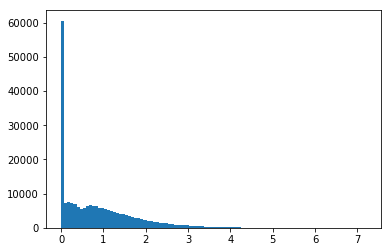

In [43]:
plt.hist(np.array(lst).mean(0).reshape([-1]),bins=100);

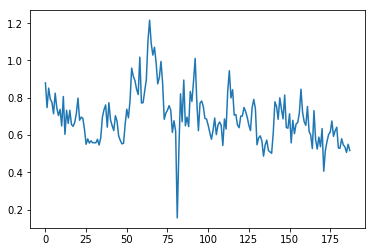

In [44]:
plt.plot(np.array(lst)[:,0,1200]);

In [45]:
for j in range(1680,1690):
    print j,np.nanmean(rawy[:,:,j],dtype=np.float),np.nanmean(y[:,:,j],dtype=np.float)

1680 1.68076379258 0.767920783369
1681 1.6817010969 0.767110917695
1682 1.62592518996 0.723749680765
1683 1.73977632686 0.821946088589
1684 1.71138398698 0.813116099178
1685 1.76363572066 0.845206885747
1686 1.69733310583 0.787718954939
1687 1.70009994492 0.789479112634
1688 nan 0.0
1689 nan 0.0


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [46]:
for j in range(1680,1693):
    u=train_test[:,:,j]
    print j,np.nanmean(np.isnan(u),dtype=np.float),np.nanmean(u,dtype=np.float)

1680

 0.214012847536

 1.48276360414
1681

 0.213840710629

 1.49496632547
1682

 0.215010664458

 1.48338573474
1683

 0.216377095252

 1.47682543299
1684

 0.216954857975

 1.45857451822
1685

 0.21771805681

 1.44824151213
1686

 0.218048655024

 1.45762073594
1687

 0.219275820536

 1.41082743023
1688

 0.219670280036

 1.42158947618
1689

 0.220347284954

 1.39704434298
1690

 0.219468784503

 1.4131225264
1691

 0.456596406705

 1.3487474599
1692

 0.481998017665

 1.33964608028


In [47]:
np.mean(y[:,0,1688],dtype=np.float),np.mean(y[:,0,1686],dtype=np.float),np.mean(y[:,0,1687],dtype=np.float)

(0.0, 0.13274016203703703, 0.14341001157407407)

(54, 4100) 0.848063


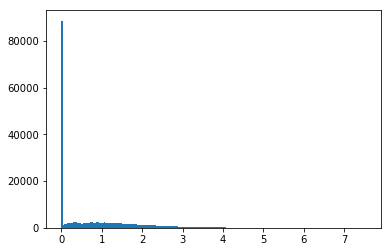

In [48]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1187]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.808472


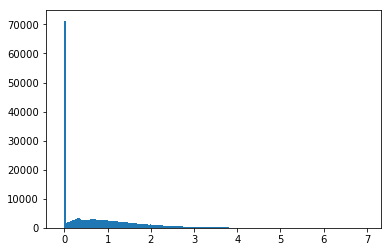

In [49]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1687]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.843463


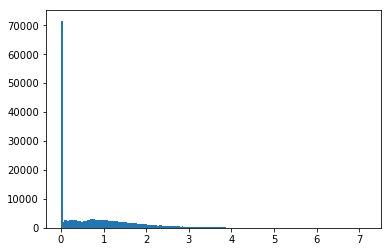

In [50]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

(54, 4100) 0.816938


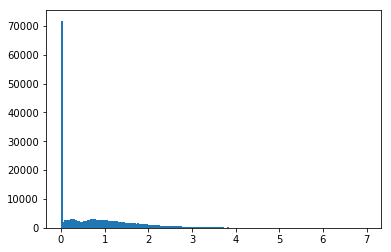

In [51]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1689]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);

In [52]:
np.mean(isnan(train_test[:,:,1688]),dtype=np.float)

0.2196702800361337

In [53]:
np.mean(isnan(train_test[:,:,1687]),dtype=np.float)

0.21927582053598313

In [54]:
np.mean(isnan(train_test[:,:,1689]),dtype=np.float)

0.22034728495433104

(54, 4100) 0.843463


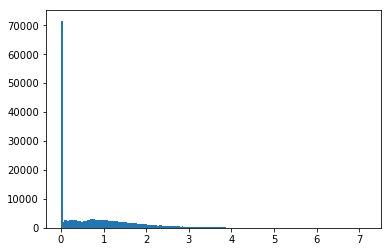

In [55]:
import cPickle as pickle
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer, 'RMSE':RMSE})
for i in [1688]:
    ax=train_test[:,:,i].reshape([-1,train_test.shape[-1]])
    yy_pred3=amodel.predict(ax,4096)[:,0].reshape(train_test.shape[:2])
print yy_pred3.shape, np.nanmean(yy_pred3)
plt.hist(yy_pred3.reshape(-1),bins=200);
pickle.dump(yy_pred3,open(a.name+".alt.pred",'wb'))

In [56]:
c=np.arange(60).reshape([3,4,5])

In [57]:
(c.reshape([-1,5]).reshape([3,4,5])==c).all()

True